In [24]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Chewie_CO_20150630.mat'
ephys_file = h5py.File(file_path, 'r')

In [19]:
print(ephys_file['trial_data'].keys())

<KeysViewHDF5 ['M1_lfp', 'M1_lfp_guide', 'M1_spikes', 'M1_unit_guide', 'bin_size', 'date_time', 'idx_endTime', 'idx_goCueTime', 'idx_movement_on', 'idx_startTime', 'idx_tgtOnTime', 'idx_trial_end', 'idx_trial_start', 'monkey', 'result', 'tgtDir', 'vel']>


In [35]:
spike_data = ephys_file['trial_data']['M1_spikes'][:]

print("Shape of spike data:", spike_data.shape)
print("First few entries of spike data:\n", spike_data[:5])  # Print the first few trials for inspection


Shape of spike data: (178, 1)
First few entries of spike data:
 [[<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]]


In [46]:
dereferenced_spike_data = []

for i in range(spike_data.shape[0]):
    ref = spike_data[i, 0]  # Each entry in spike_data is a reference
    if isinstance(ref, h5py.Reference):  # Check if it's a reference
        actual_data = ephys_file[ref][()]  # Dereference and get actual data (spike train)
        dereferenced_spike_data.append(actual_data)

print("First few dereferenced spike data entries:", dereferenced_spike_data[:5])


First few dereferenced spike data entries: [array([[2., 2., 1., ..., 1., 0., 1.],
       [1., 1., 2., ..., 1., 2., 2.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 2.]]), array([[1., 2., 0., ..., 1., 1., 2.],
       [1., 1., 1., ..., 1., 1., 2.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.]]), array([[1., 2., 1., ..., 0., 1., 1.],
       [0., 1., 1., ..., 1., 1., 2.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[1., 3., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 1., 2.],
       [1., 1., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 1., 2., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0.,

In [77]:
for i, entry in enumerate(dereferenced_spike_data[:5]):  # Check first 5 entries
    print(f"Entry {i}: shape {entry.shape} | type {type(entry)}")

Entry 0: shape (44, 149) | type <class 'numpy.ndarray'>
Entry 1: shape (44, 175) | type <class 'numpy.ndarray'>
Entry 2: shape (44, 122) | type <class 'numpy.ndarray'>
Entry 3: shape (44, 141) | type <class 'numpy.ndarray'>
Entry 4: shape (44, 126) | type <class 'numpy.ndarray'>


In [79]:
trial_dict = {f"Trial_{i}": trial for i, trial in enumerate(dereferenced_spike_data)}

print("Shape of first trial:", trial_dict["Trial_0"].shape)

Shape of first trial: (44, 149)


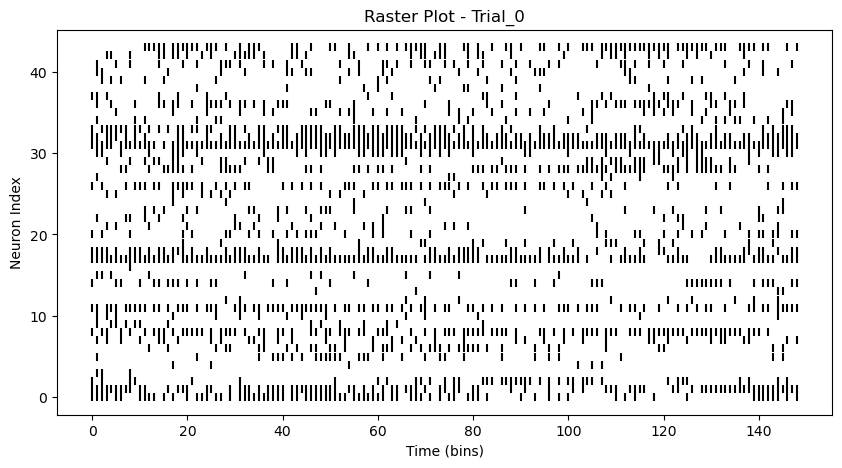

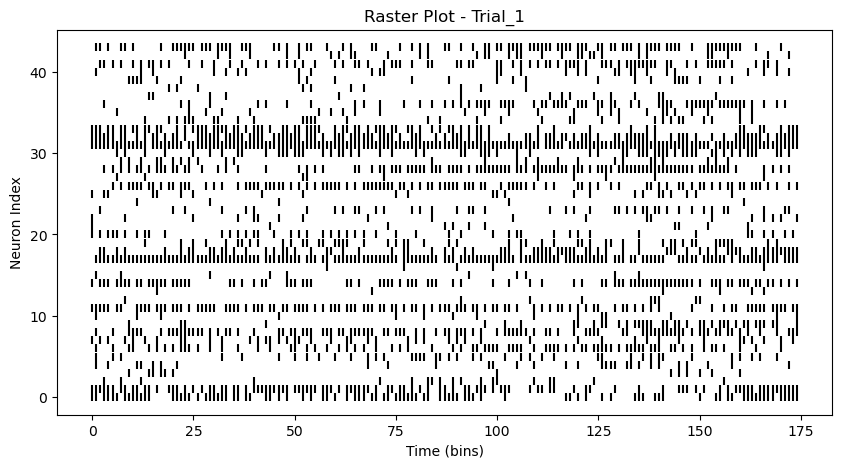

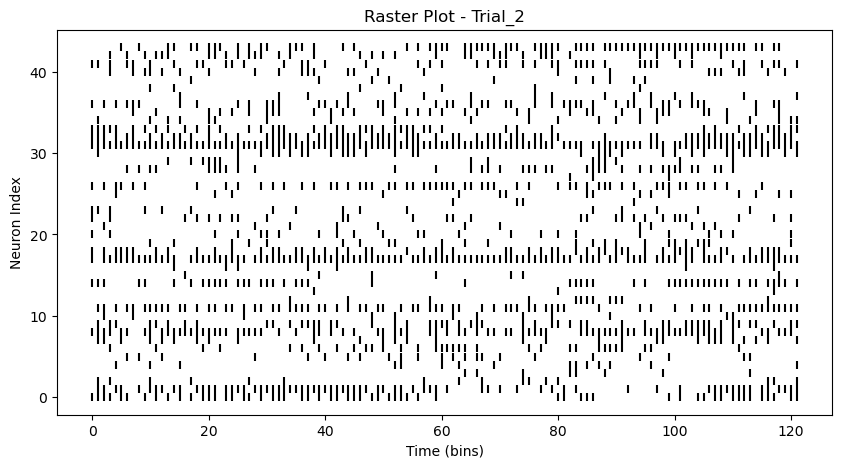

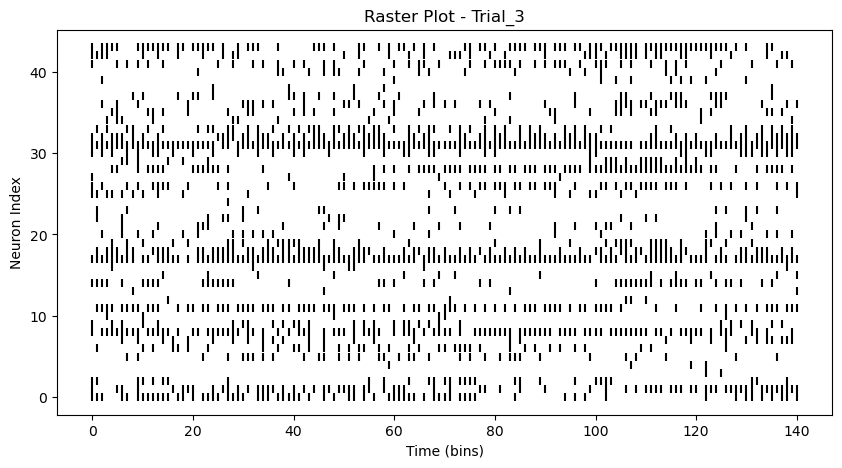

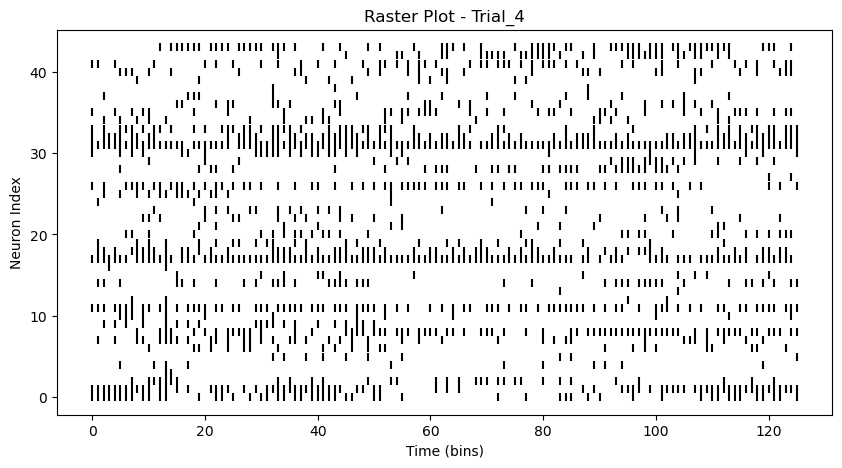

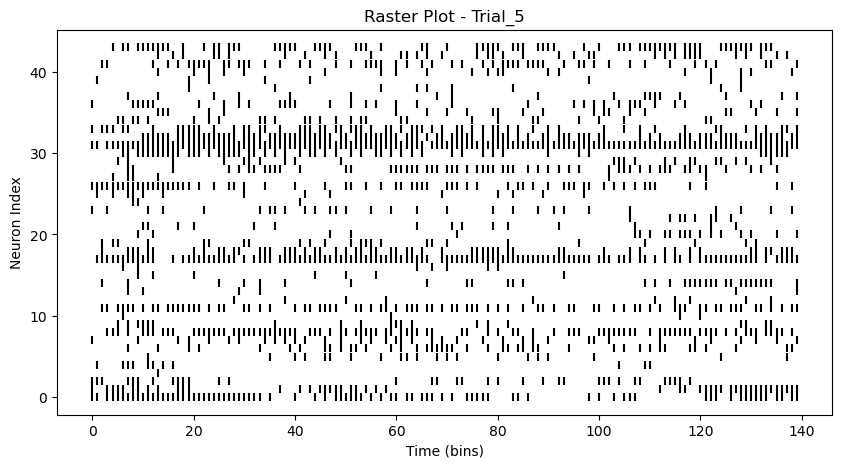

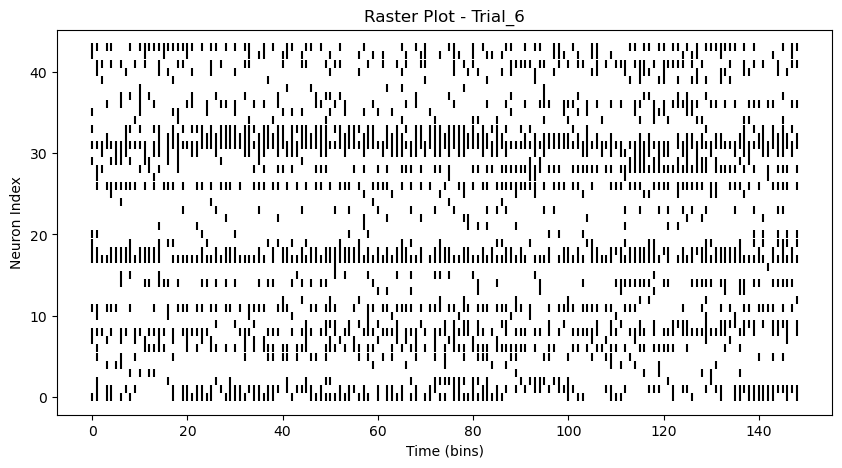

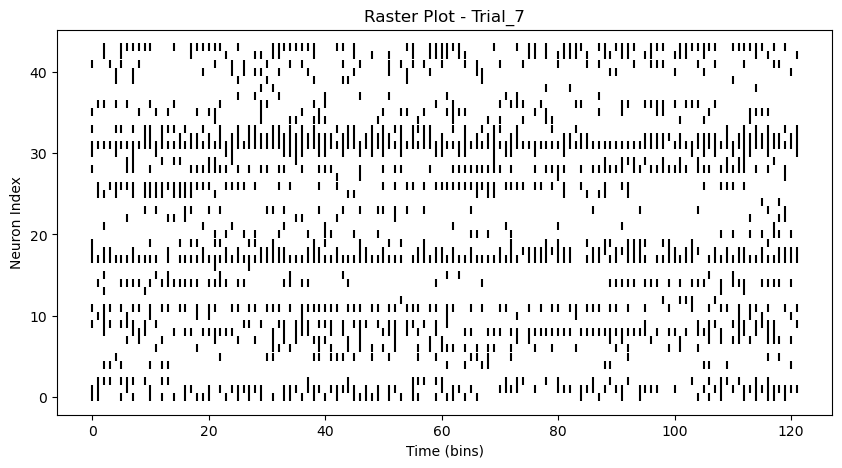

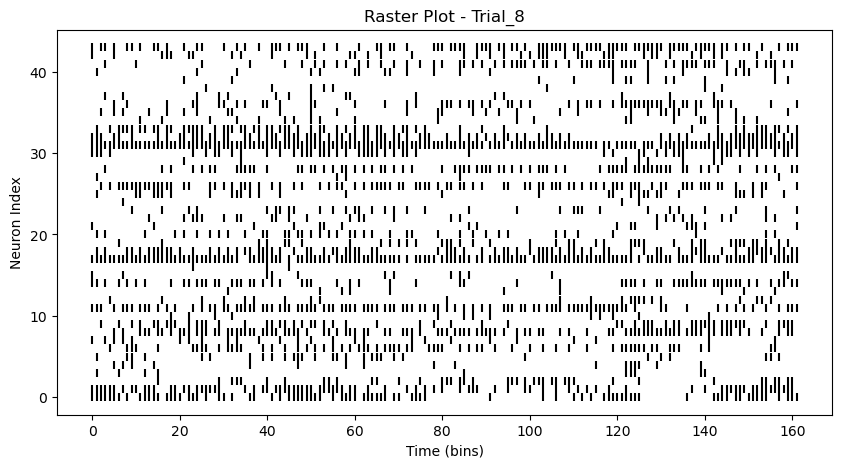

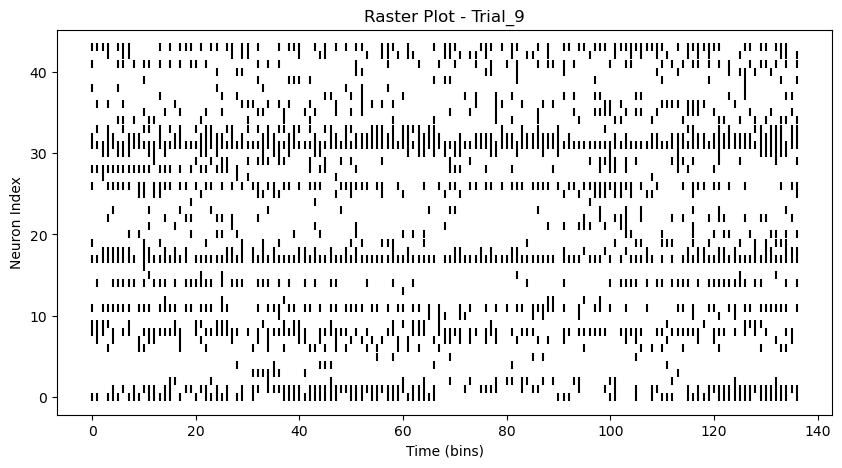

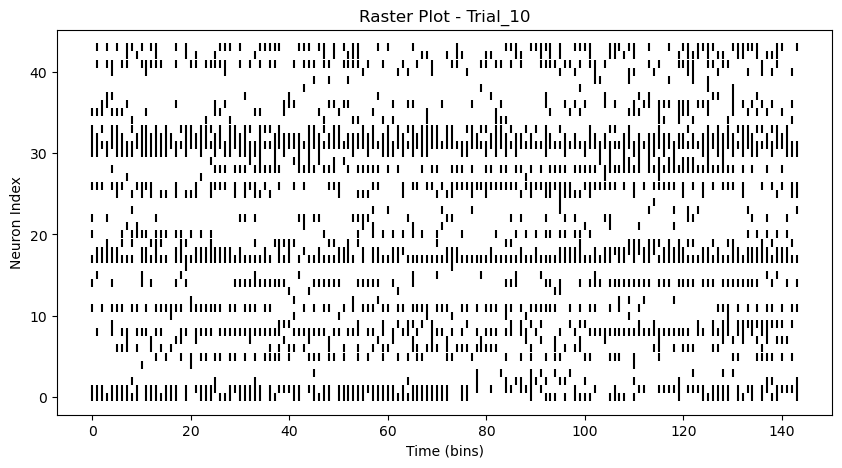

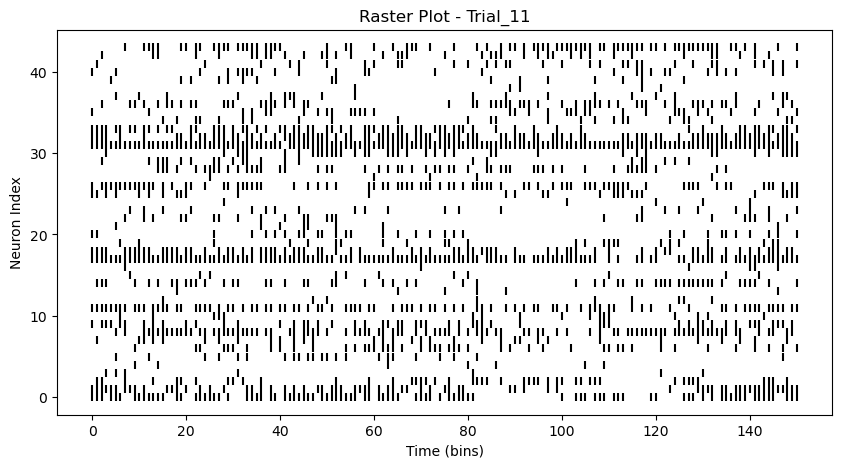

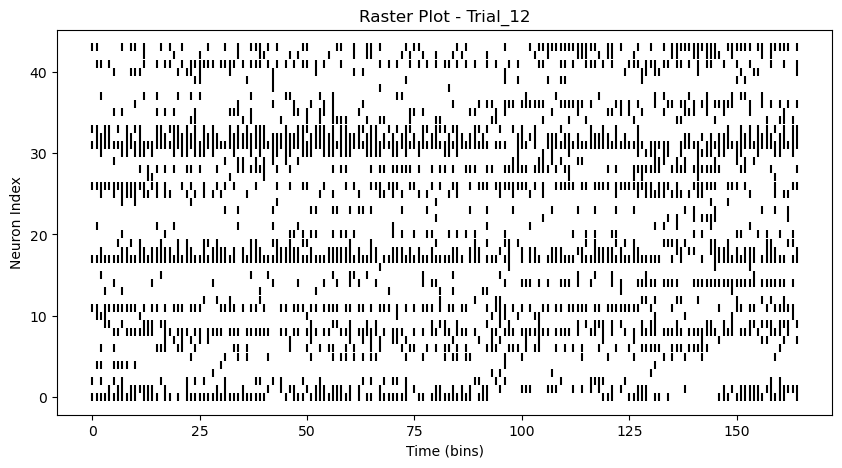

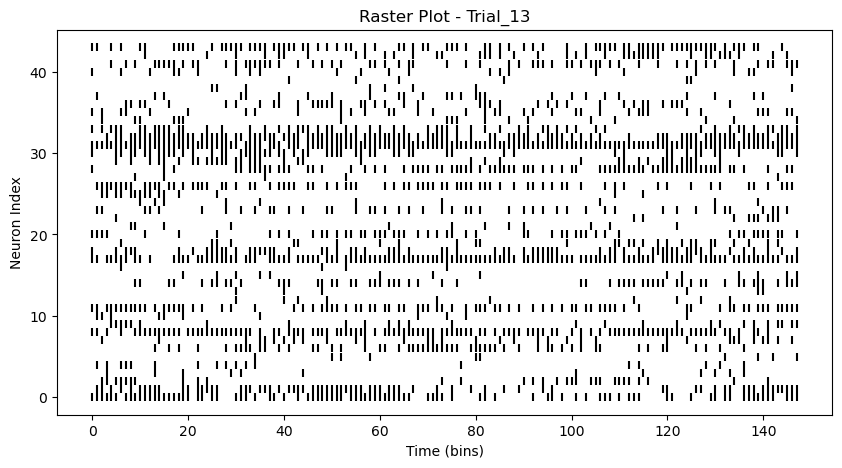

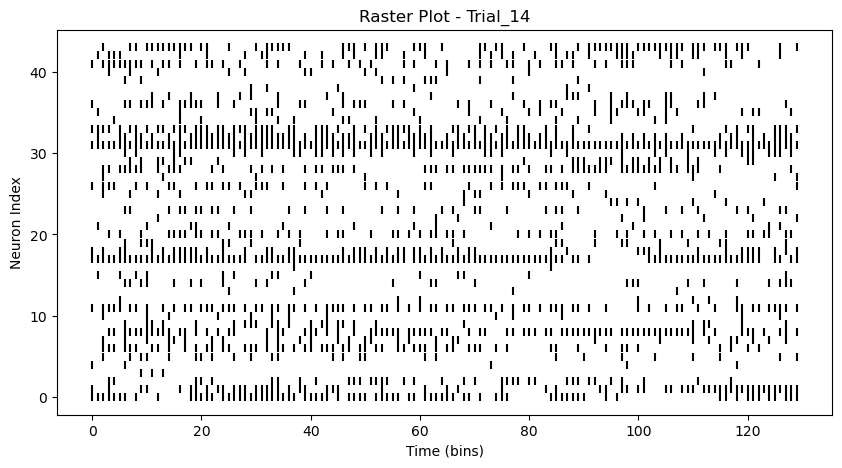

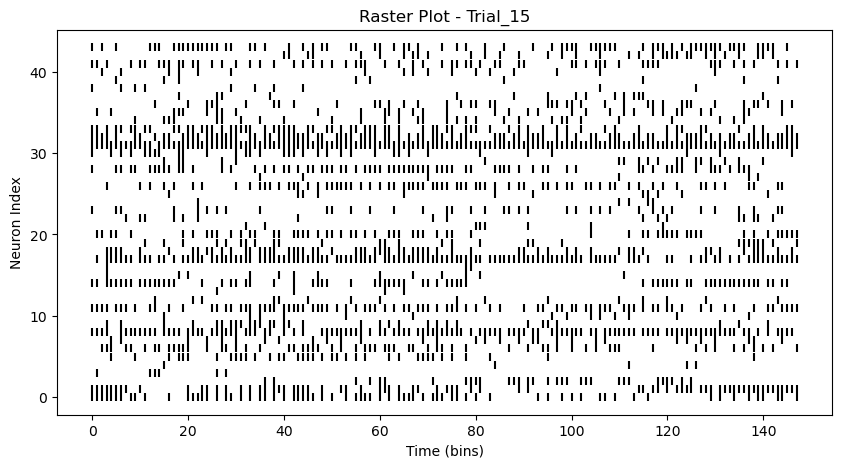

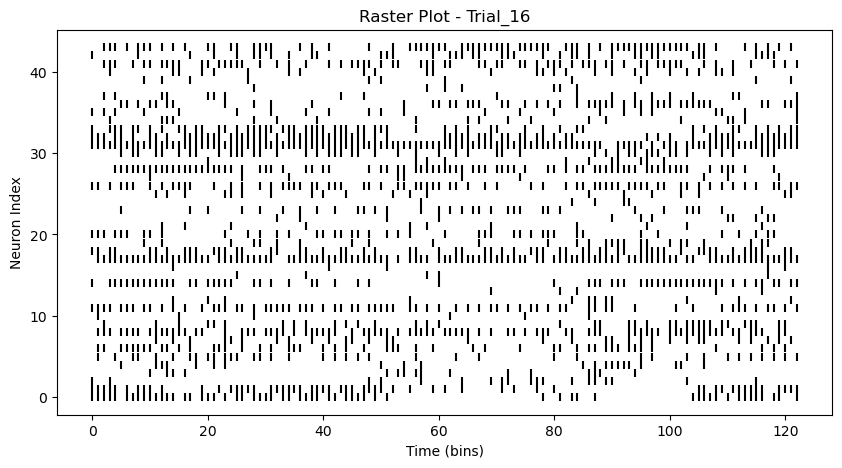

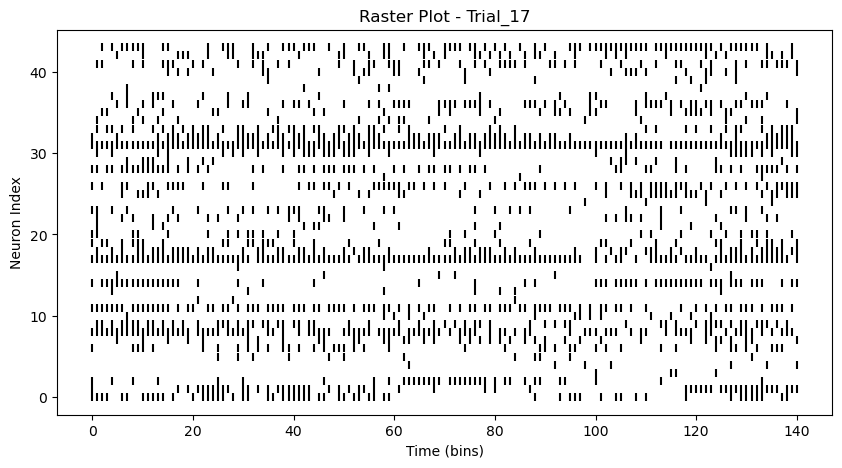

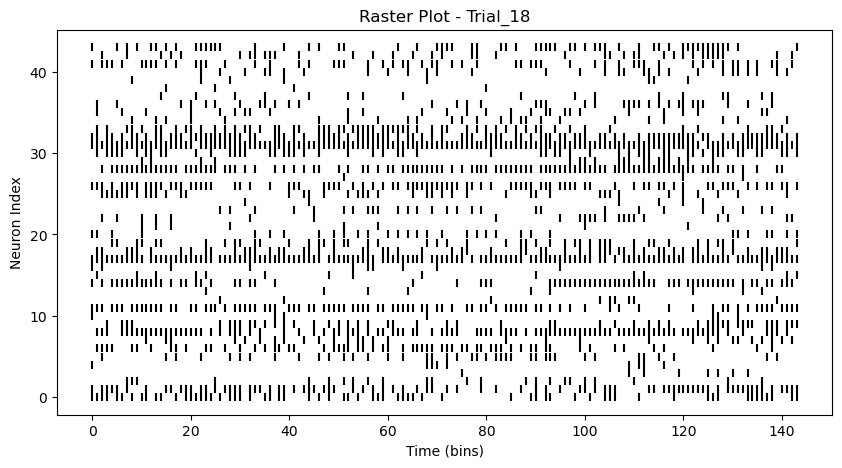

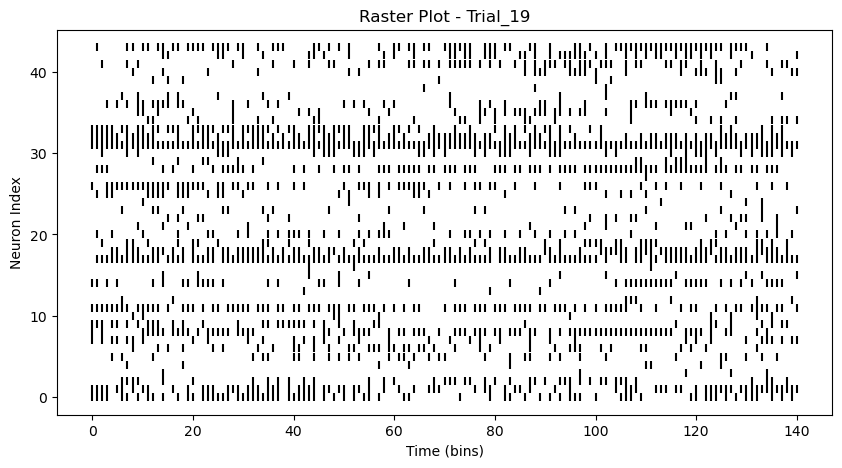

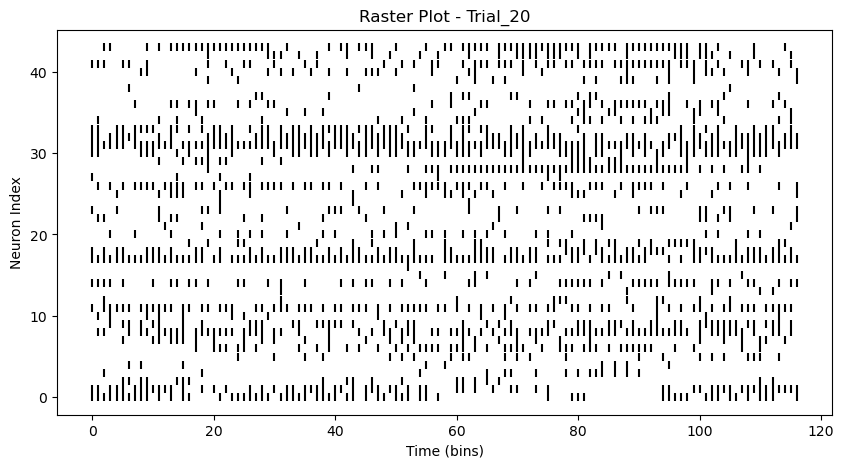

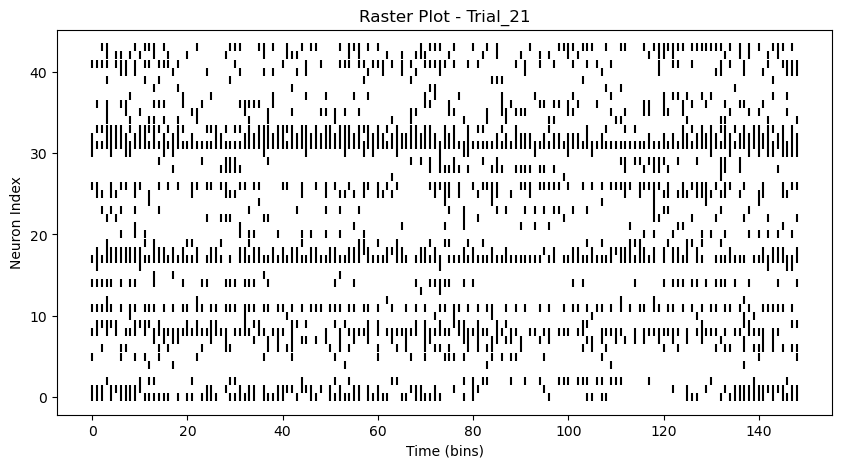

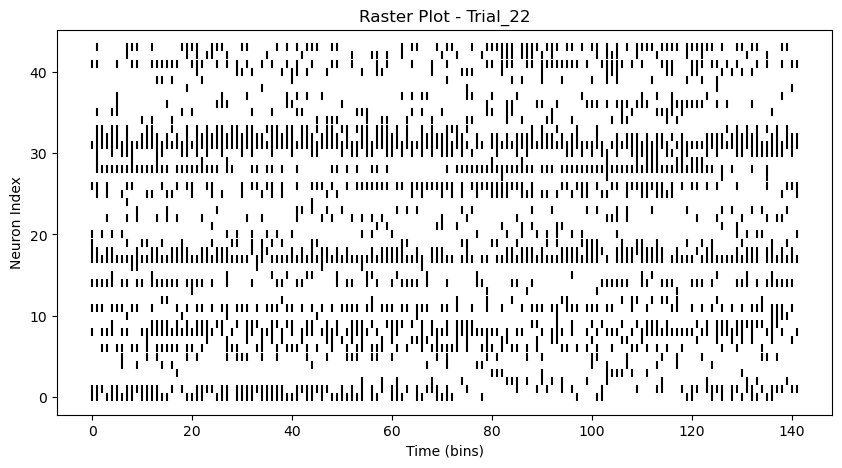

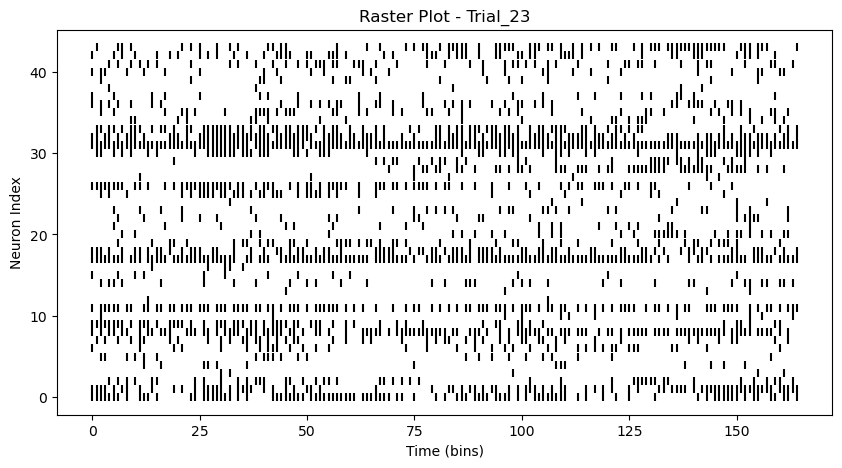

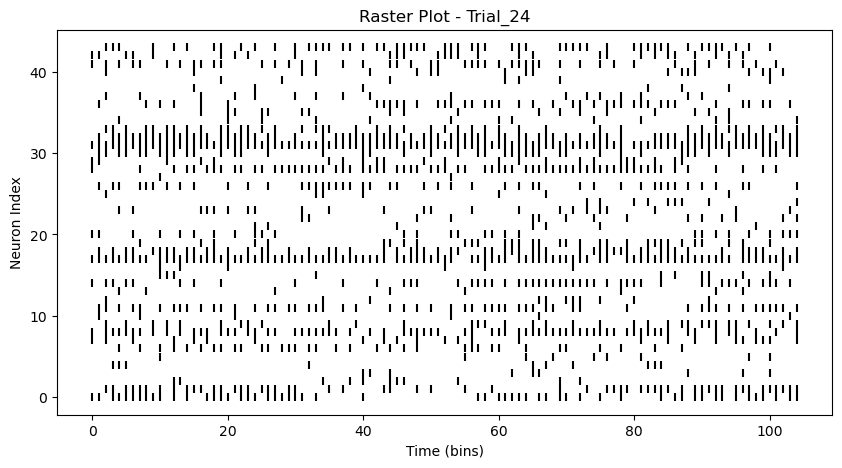

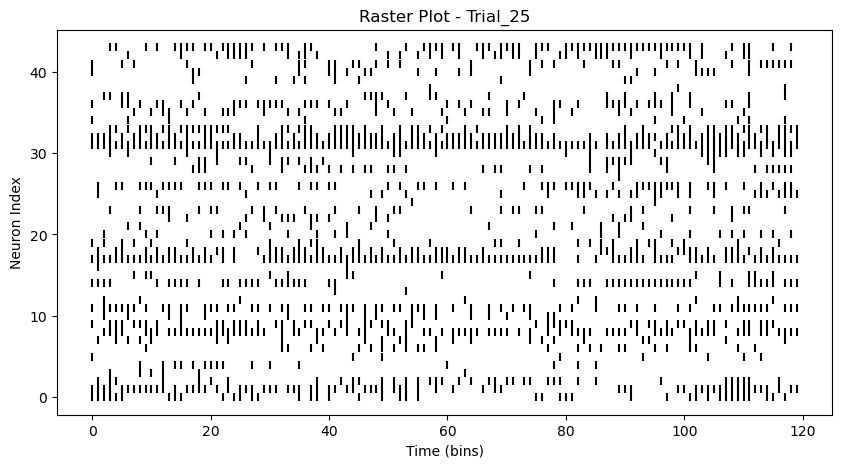

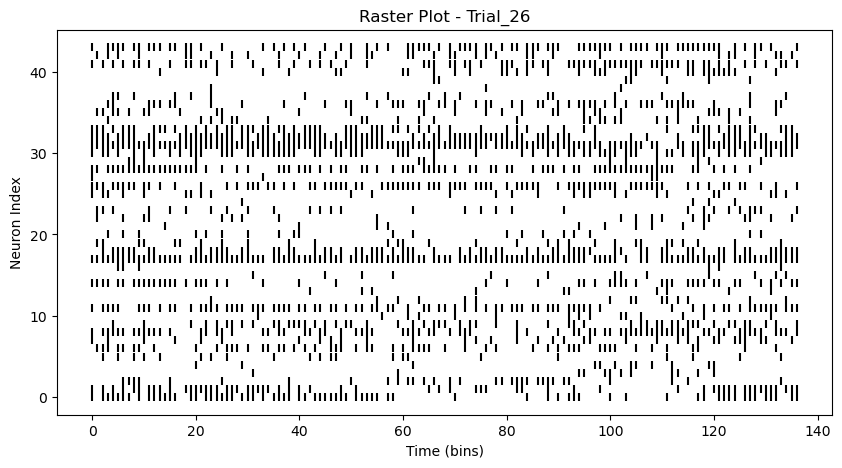

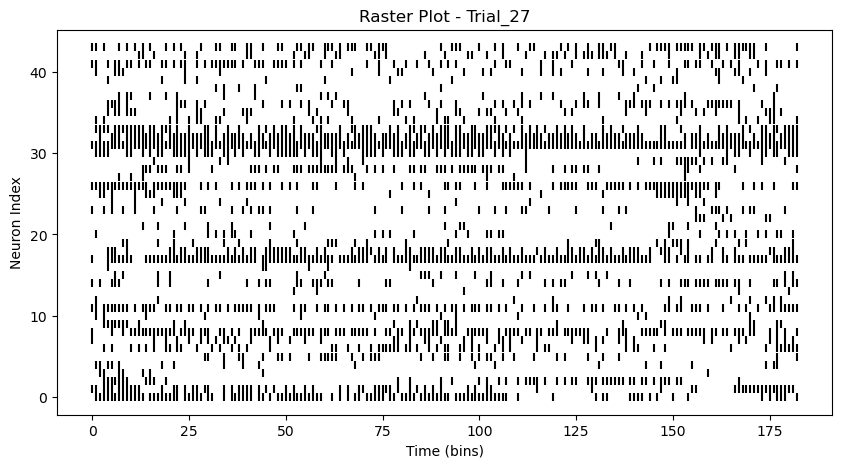

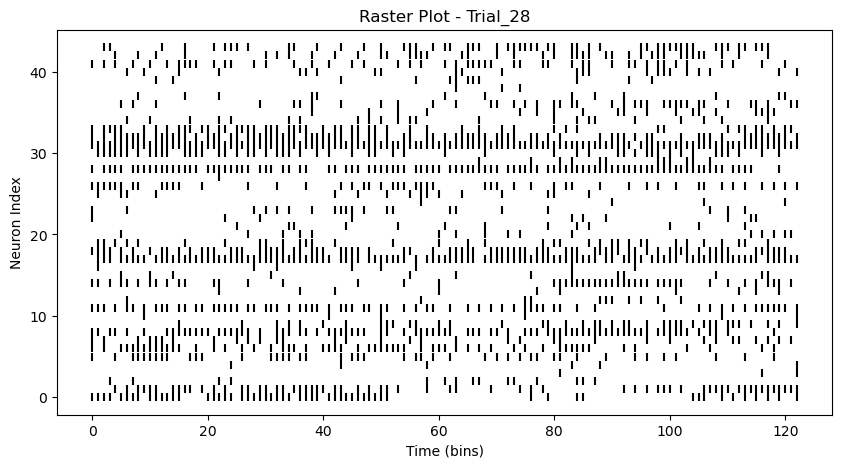

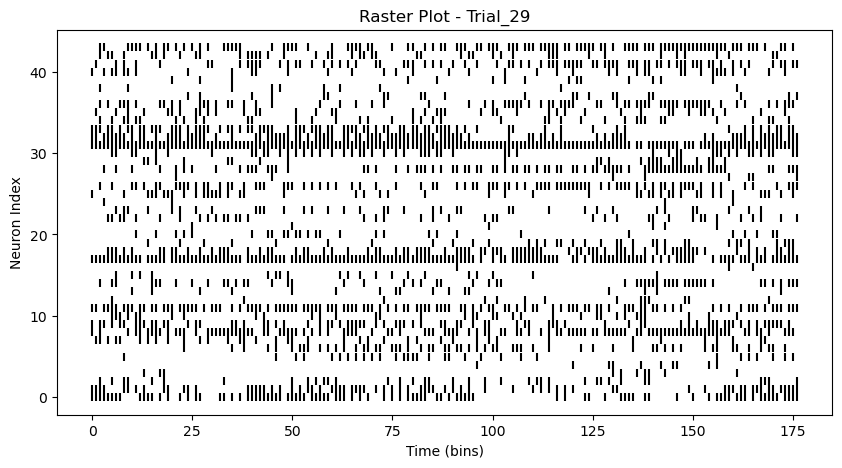

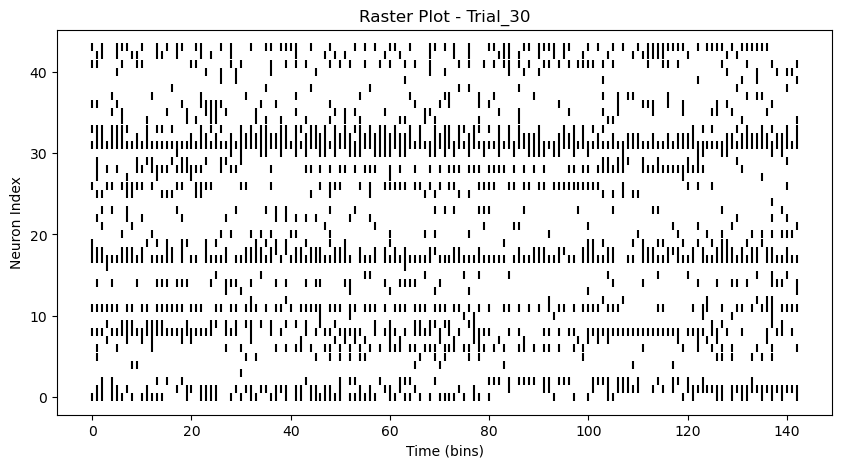

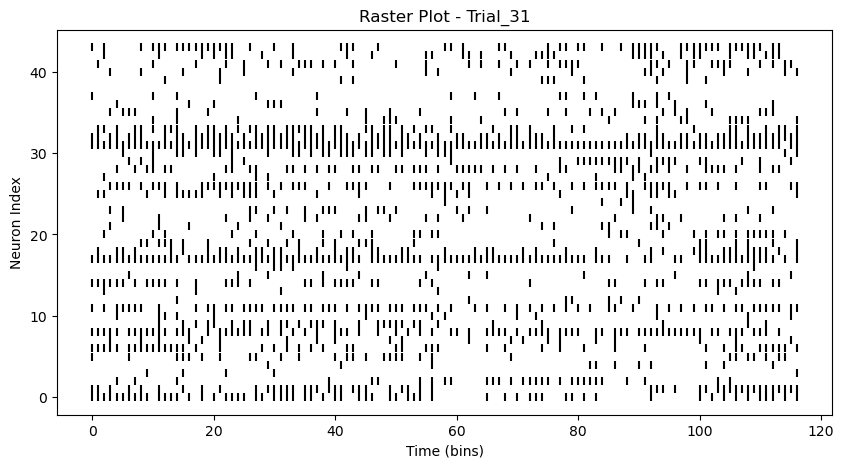

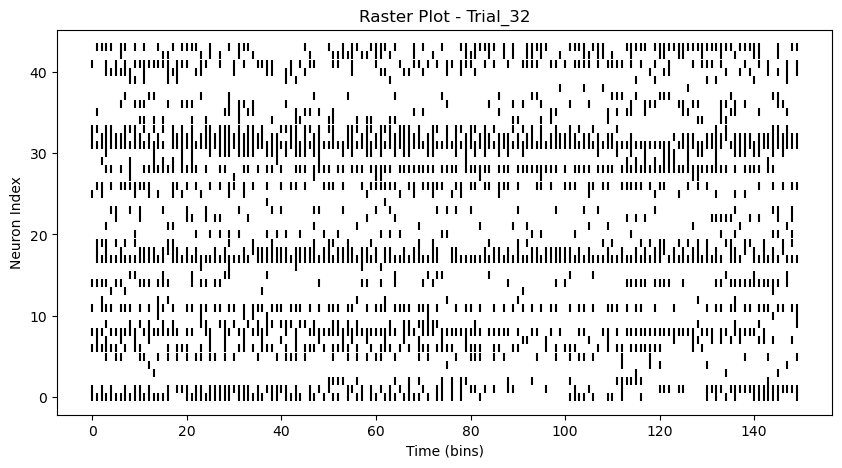

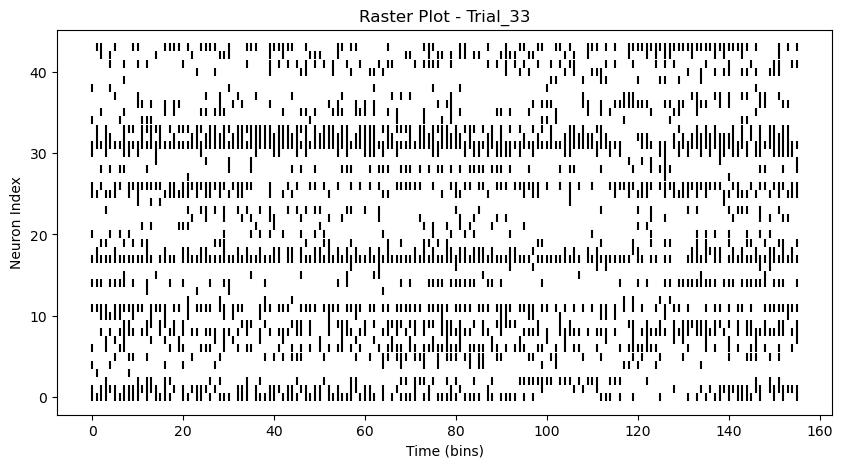

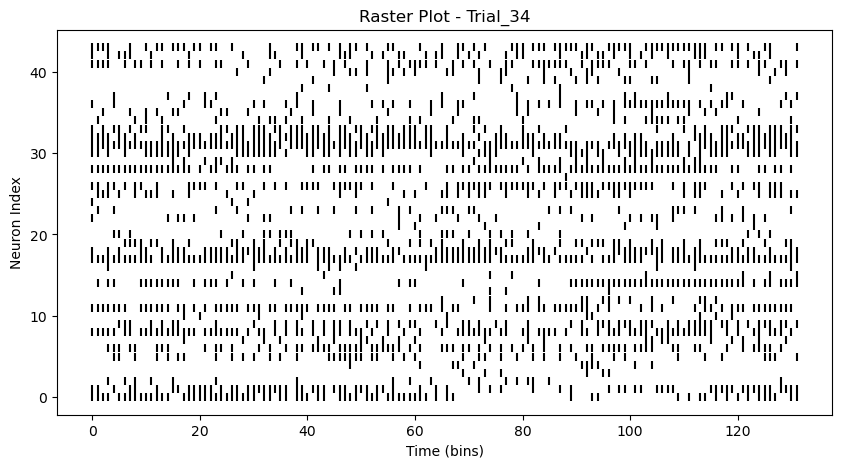

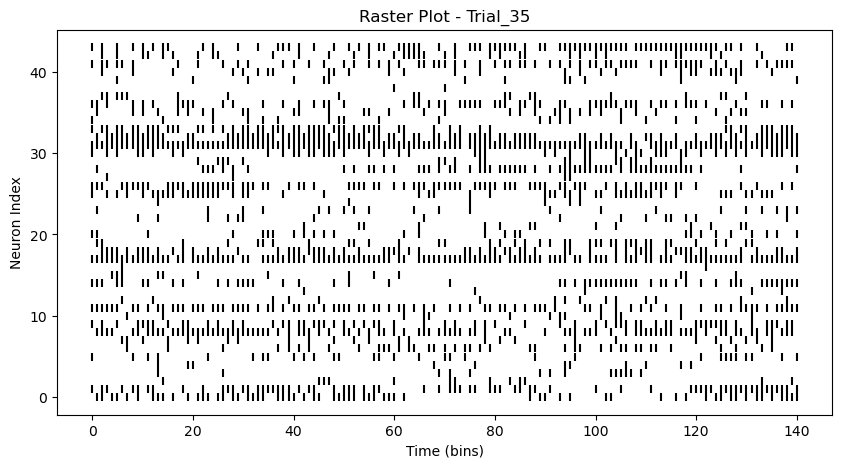

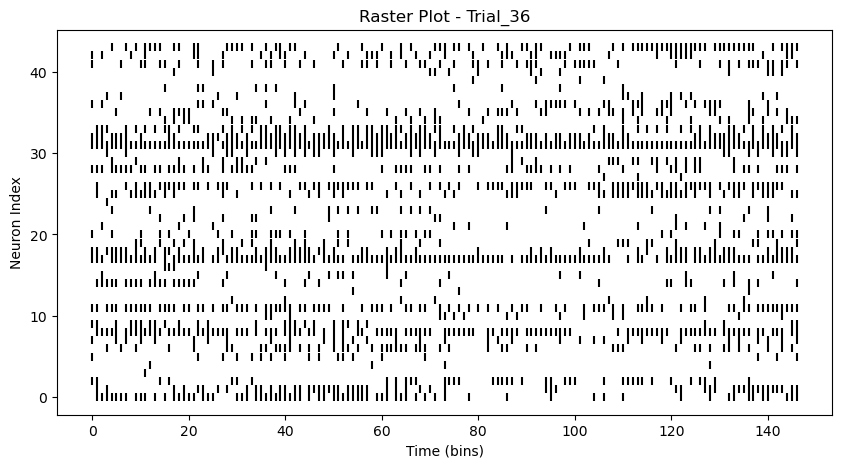

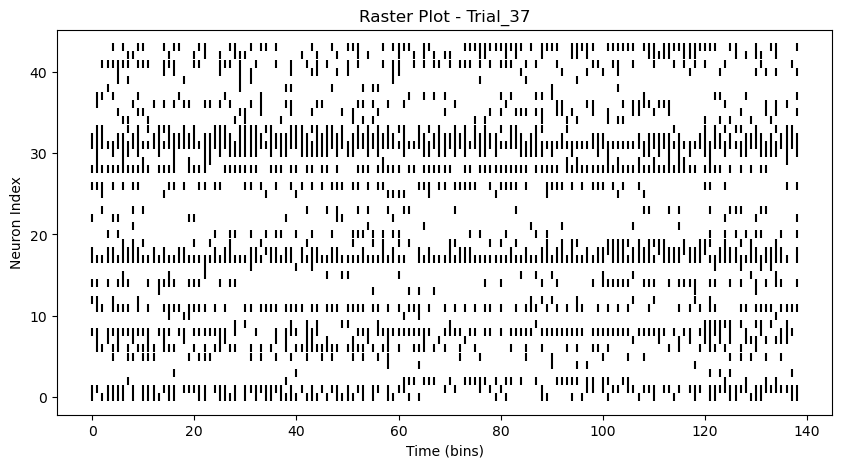

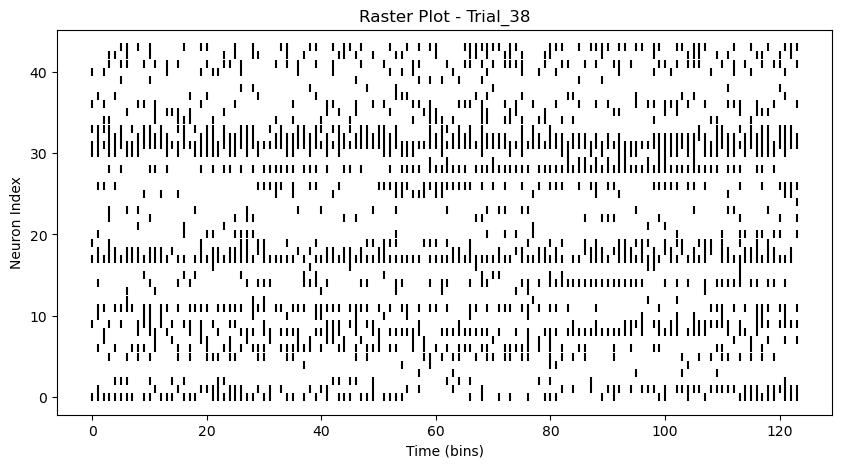

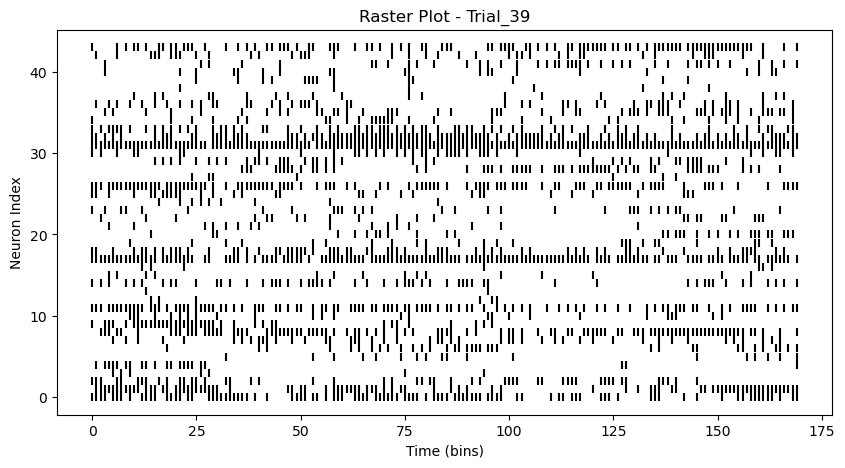

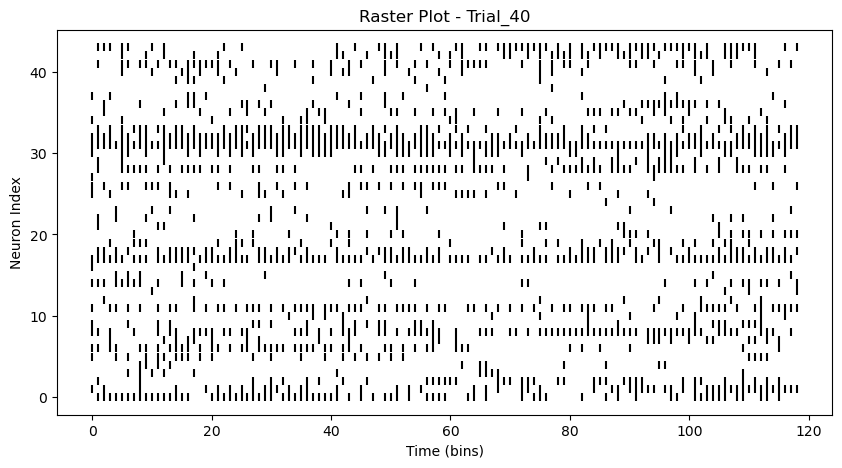

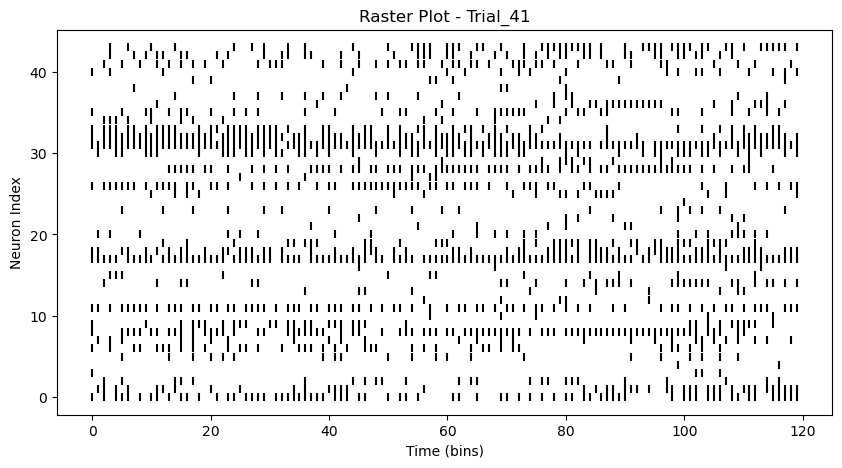

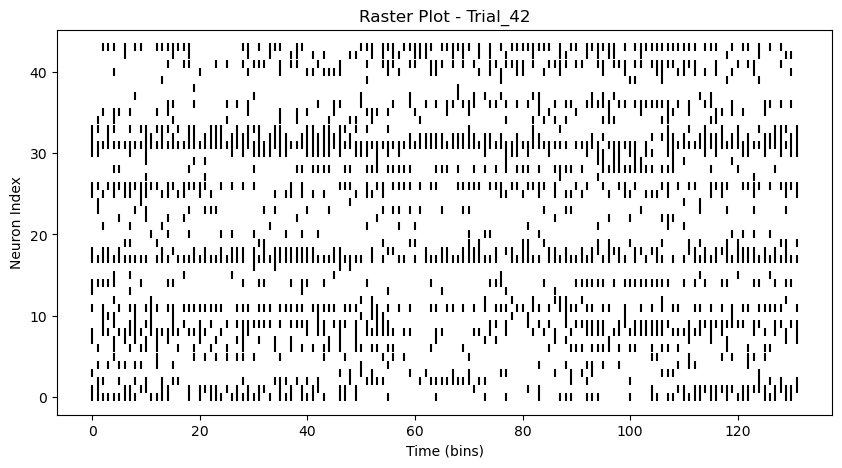

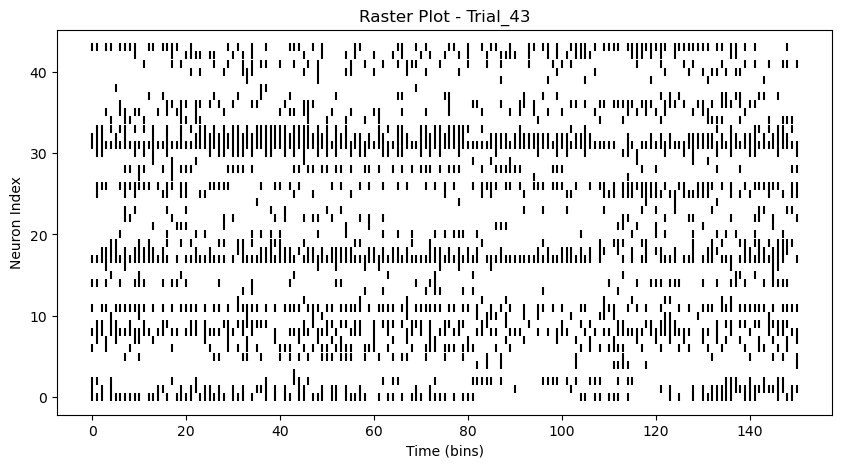

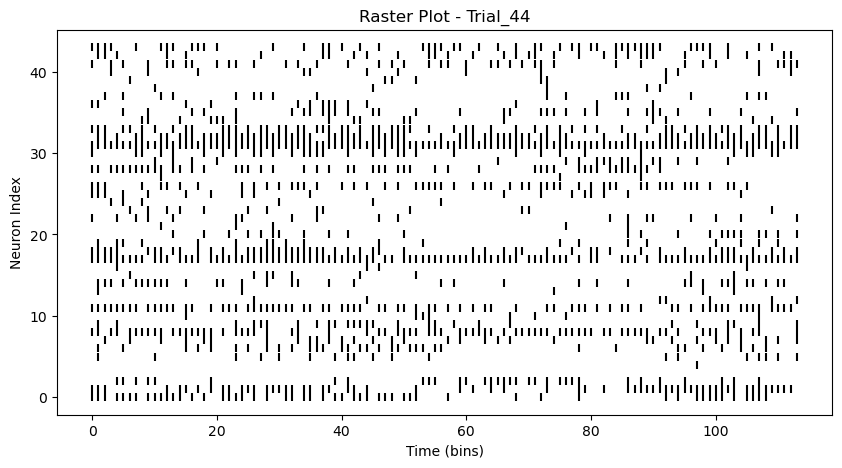

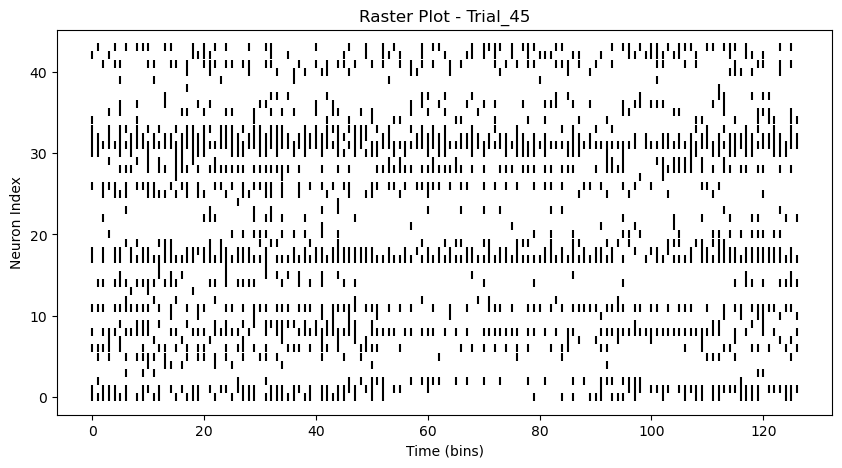

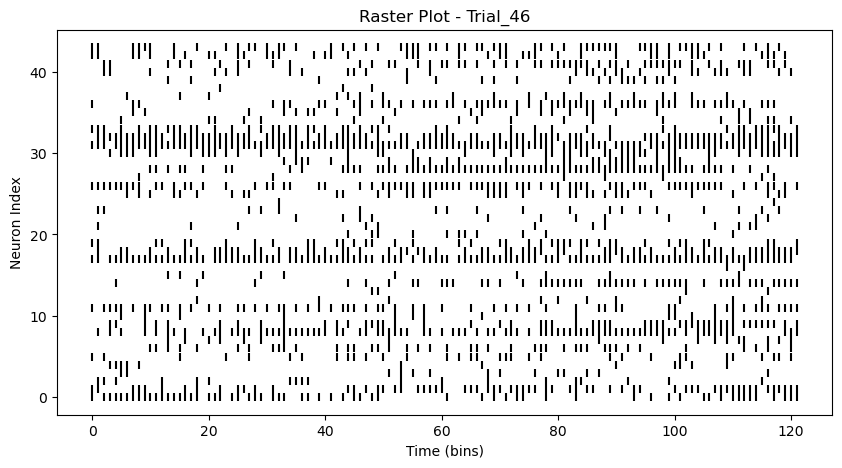

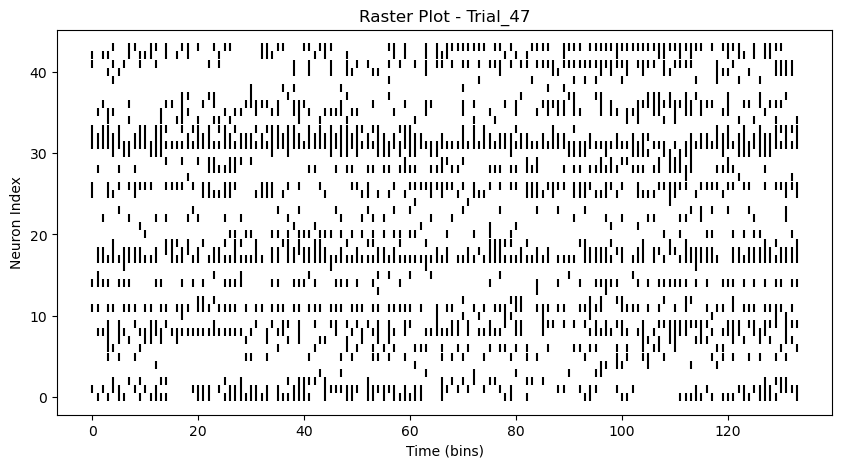

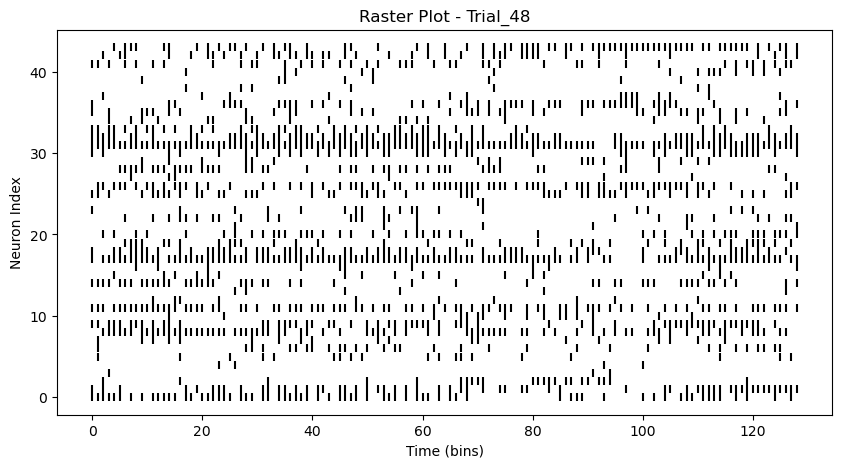

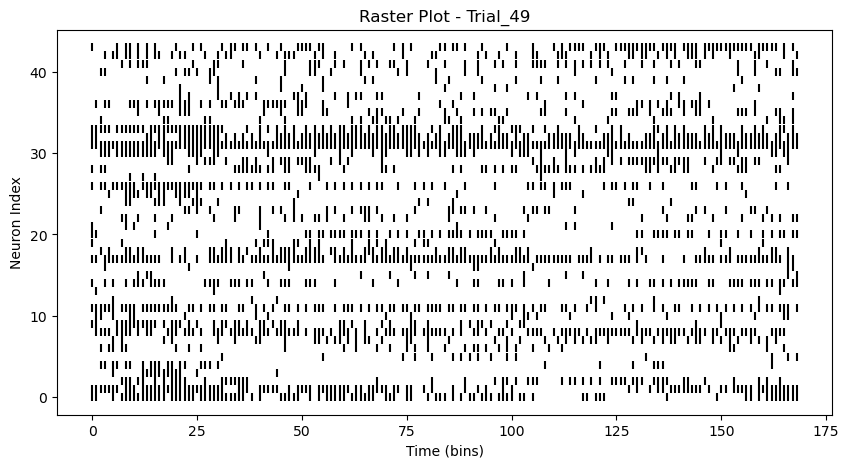

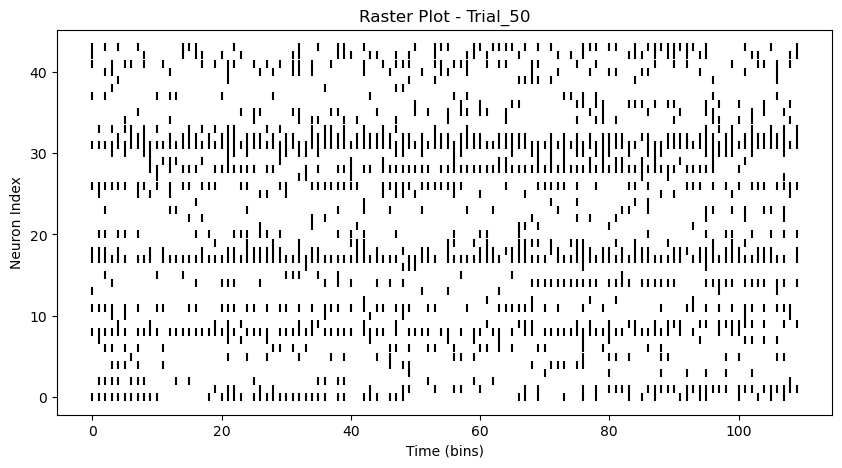

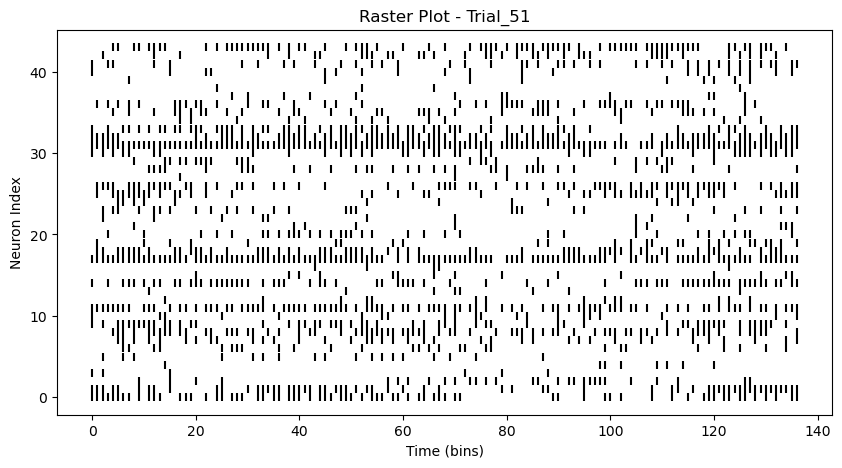

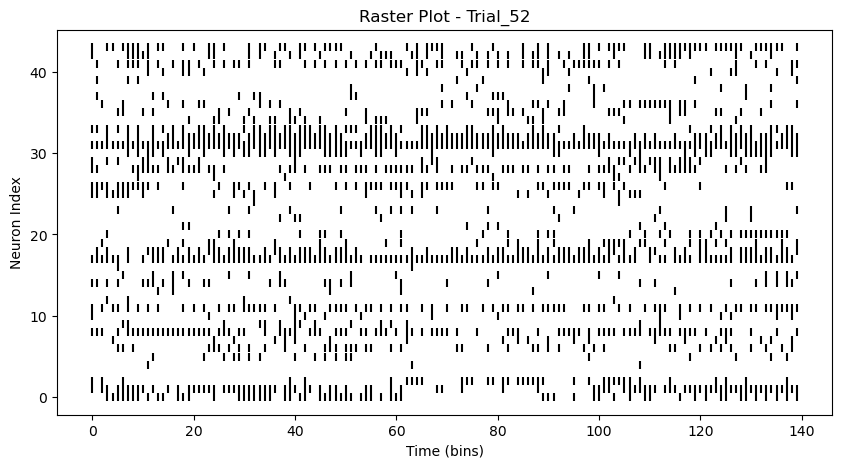

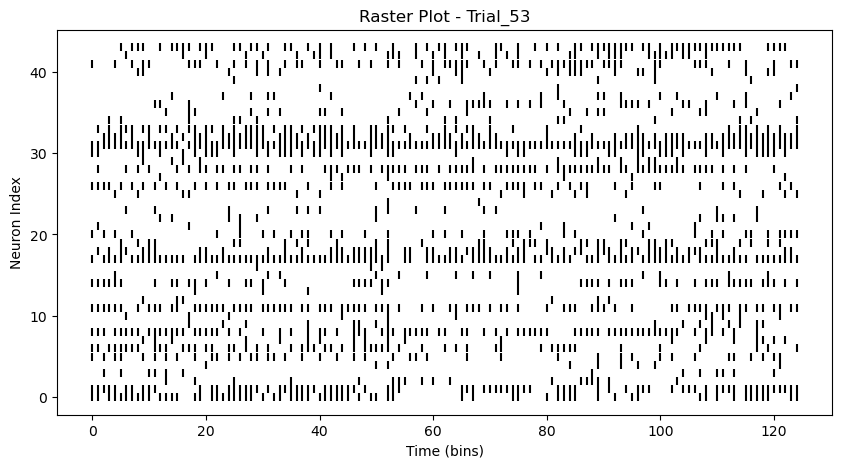

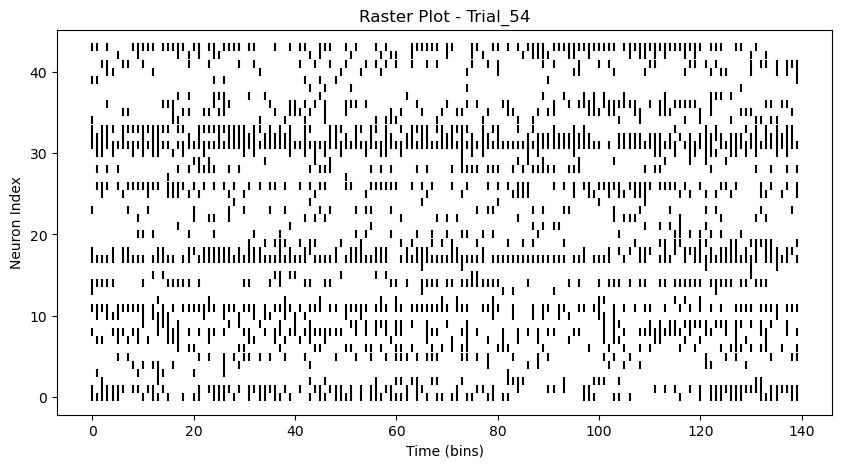

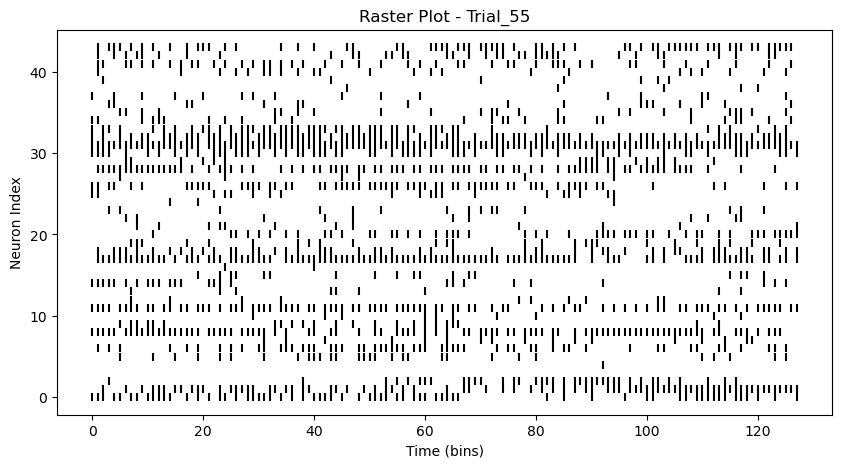

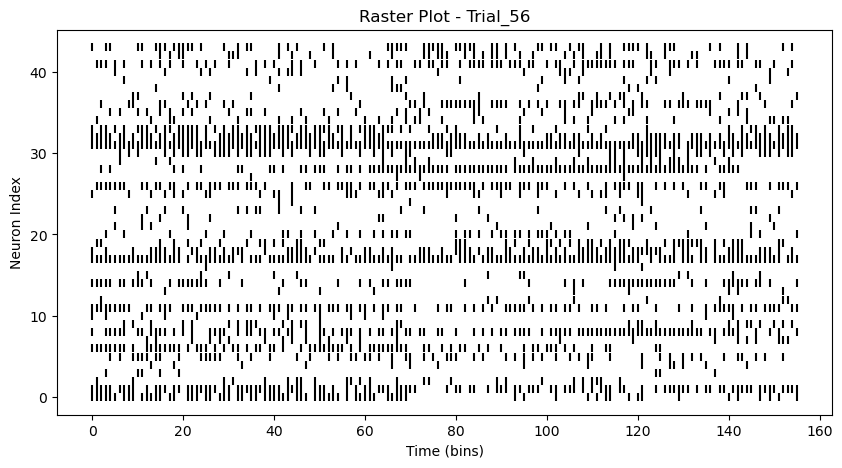

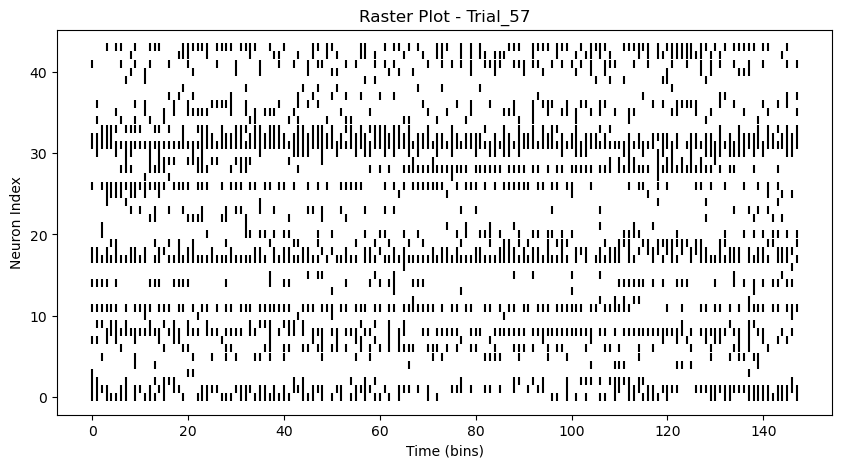

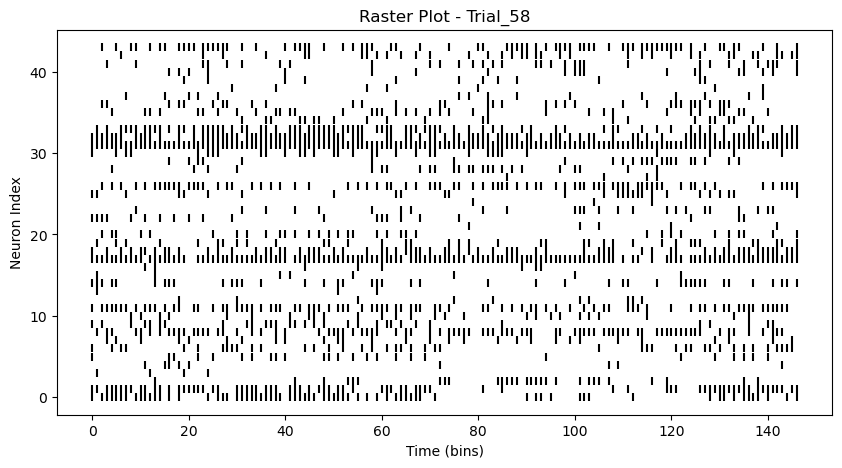

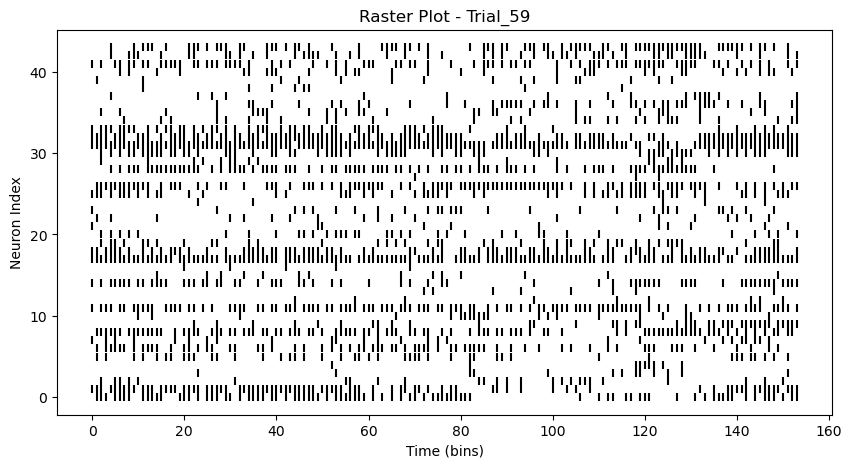

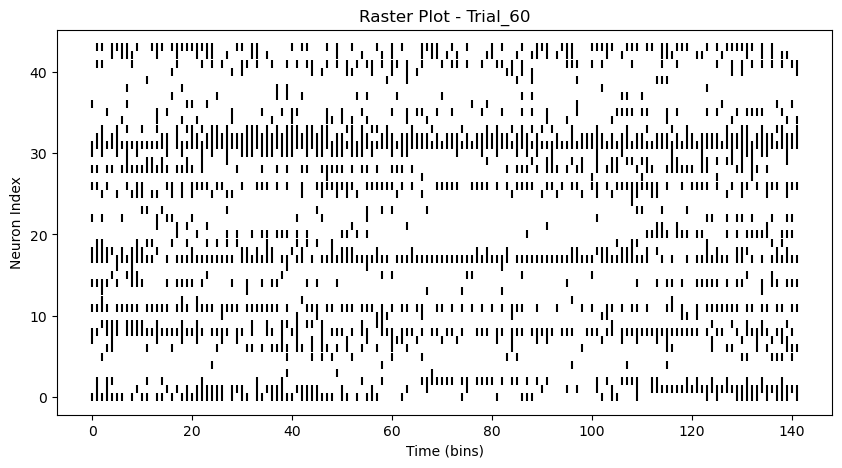

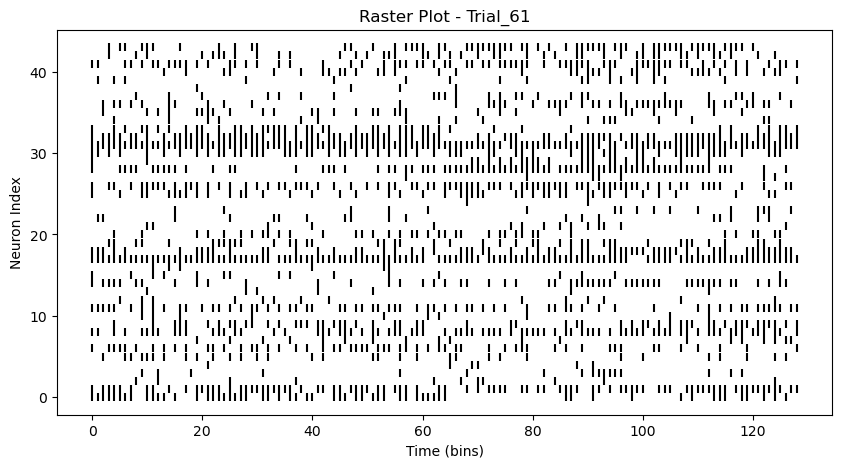

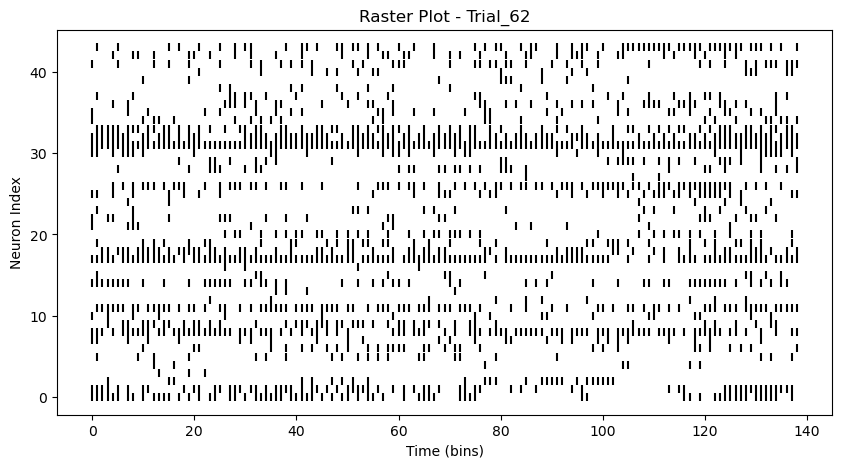

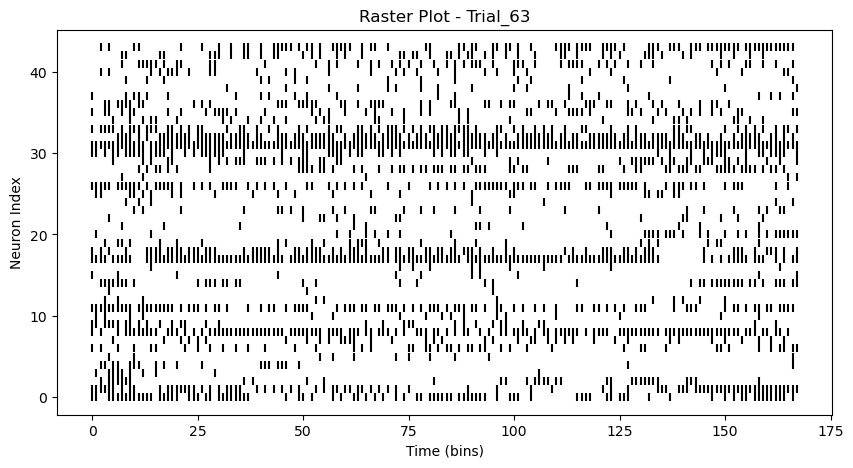

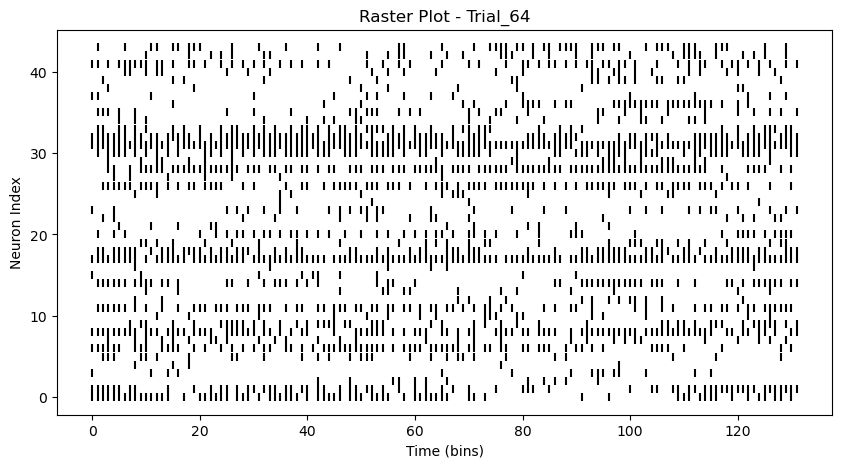

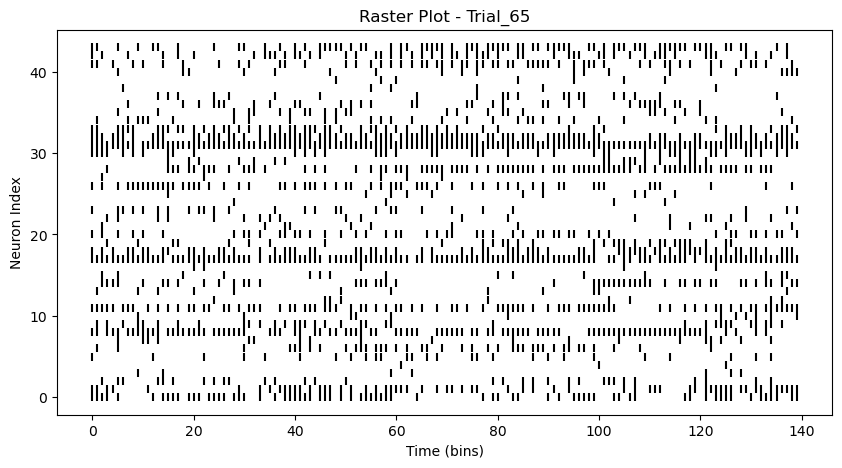

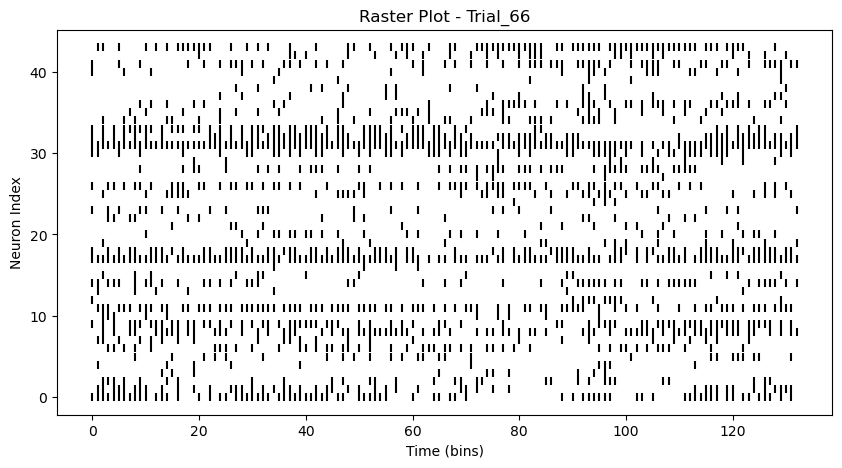

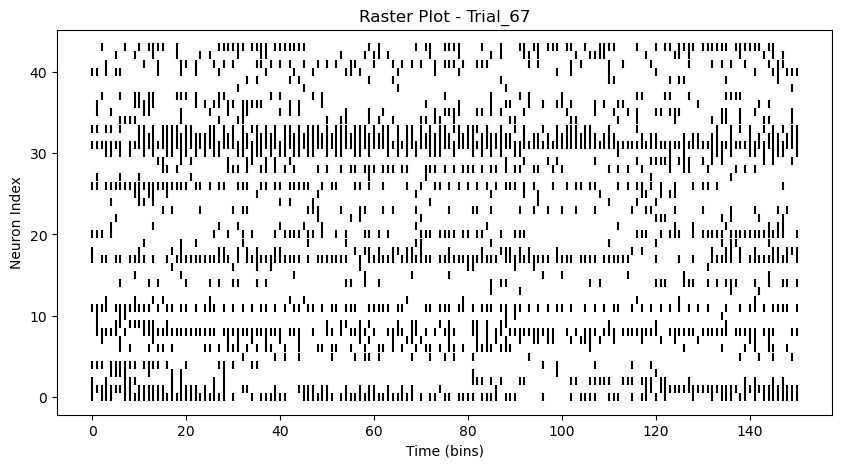

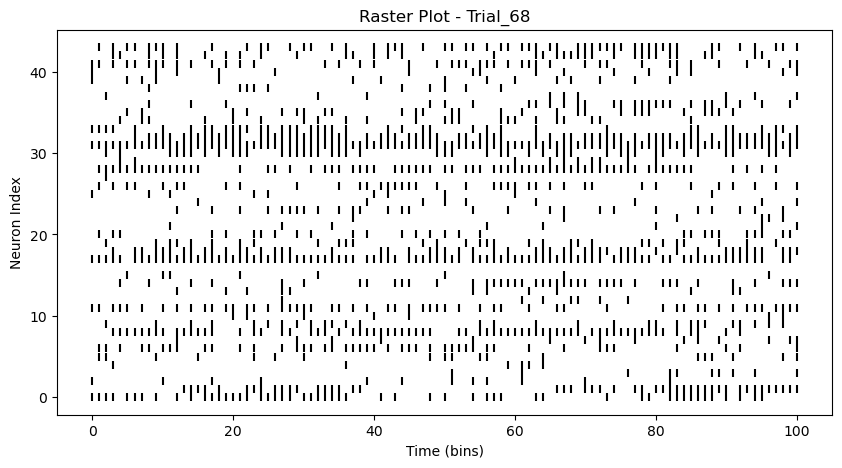

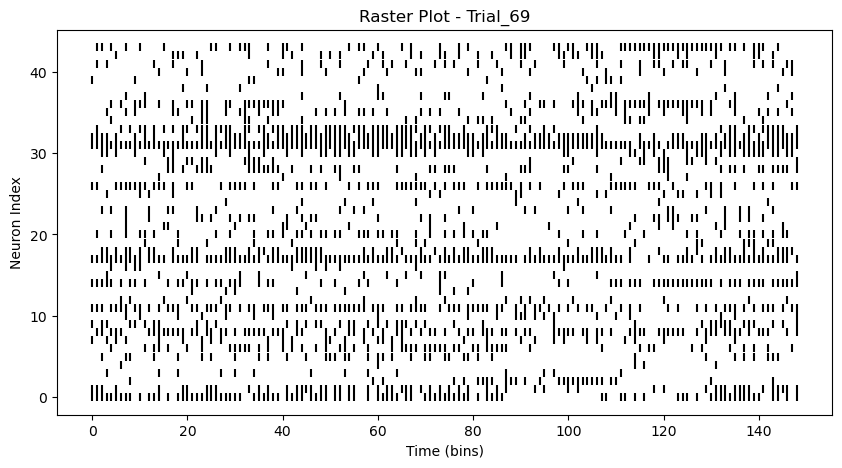

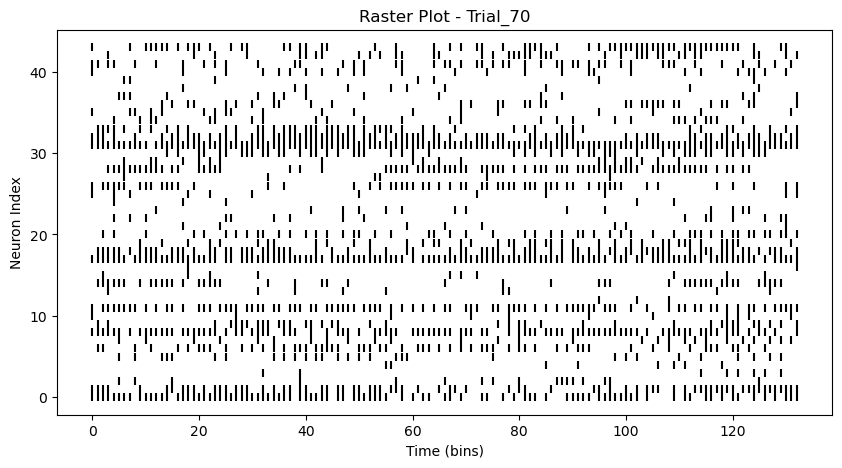

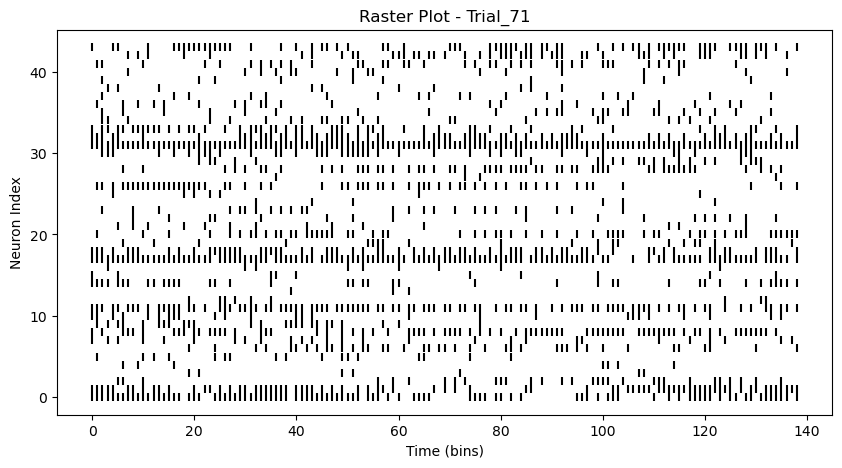

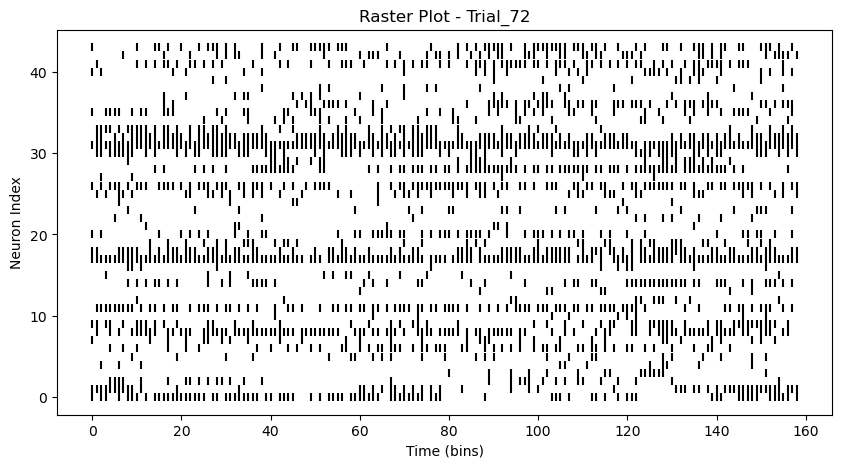

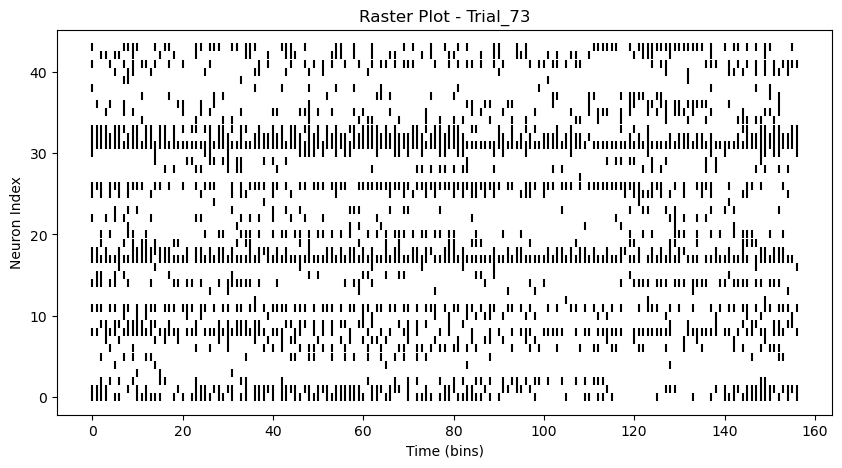

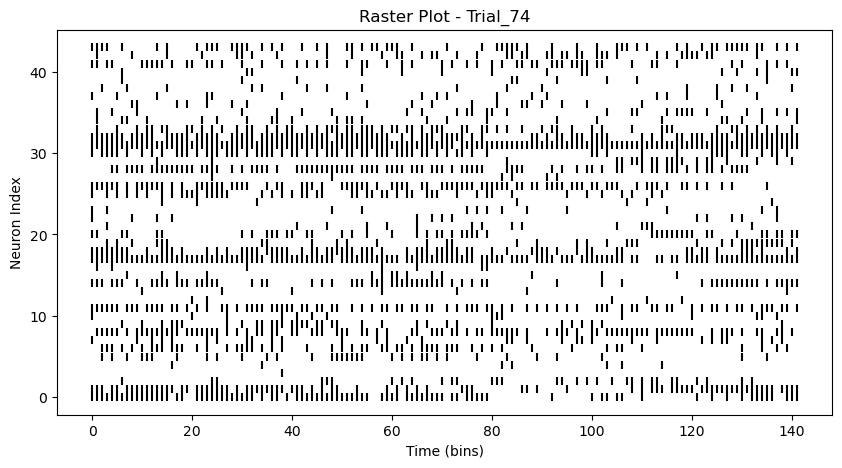

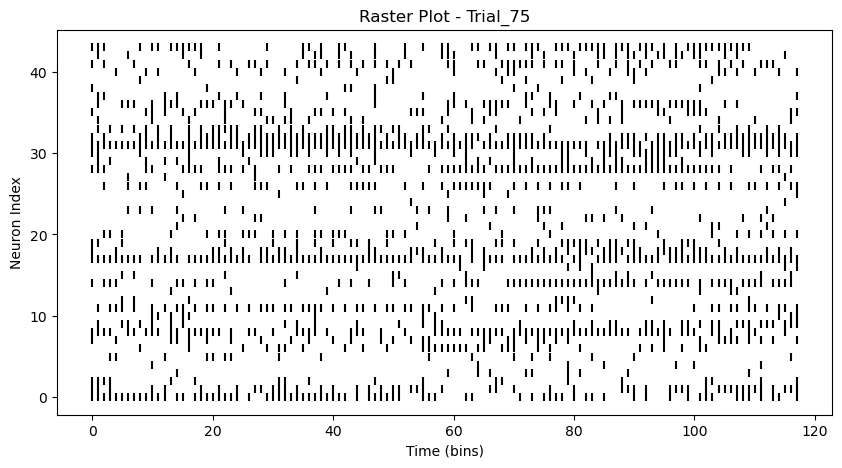

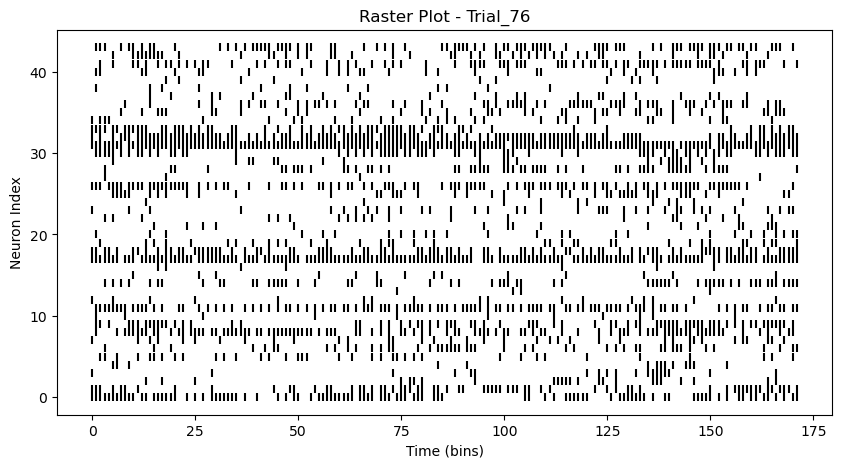

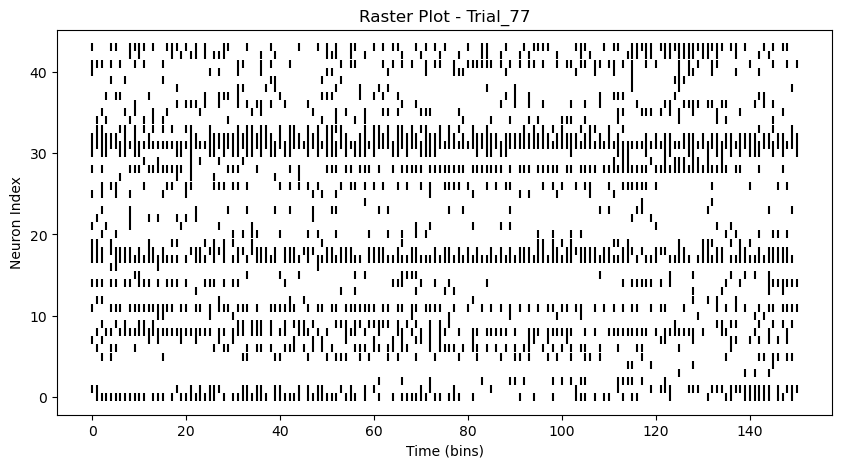

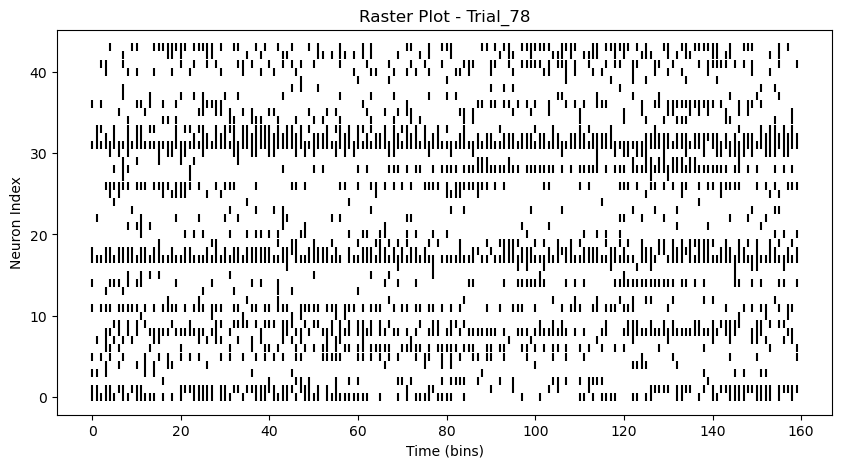

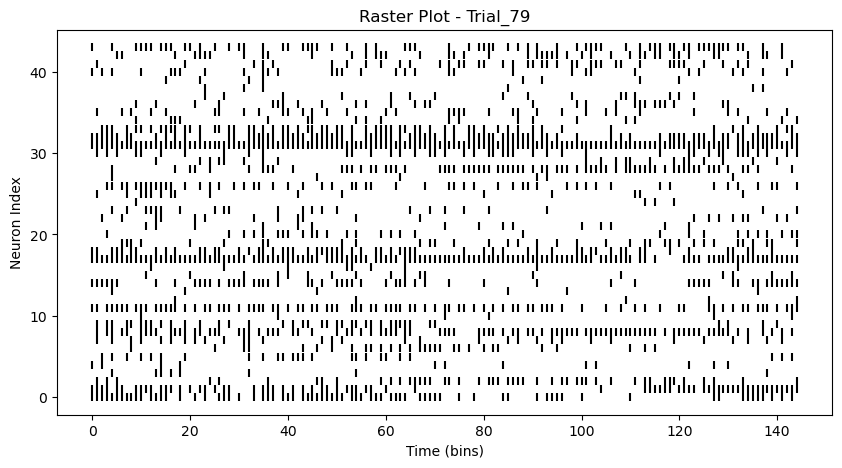

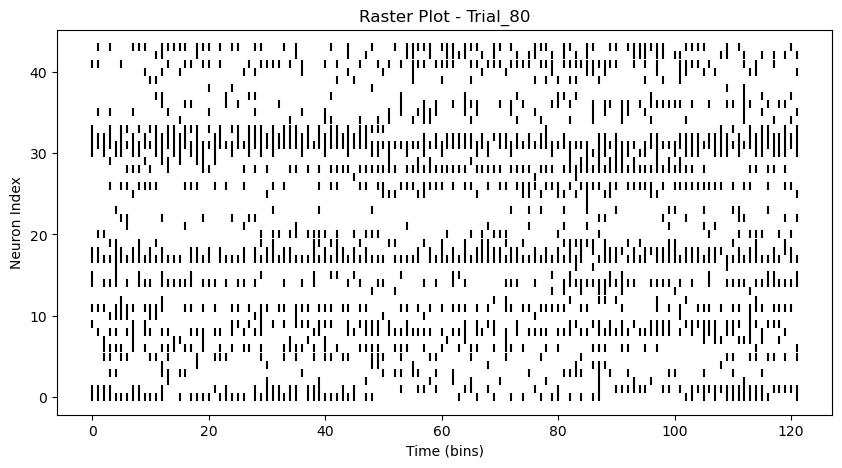

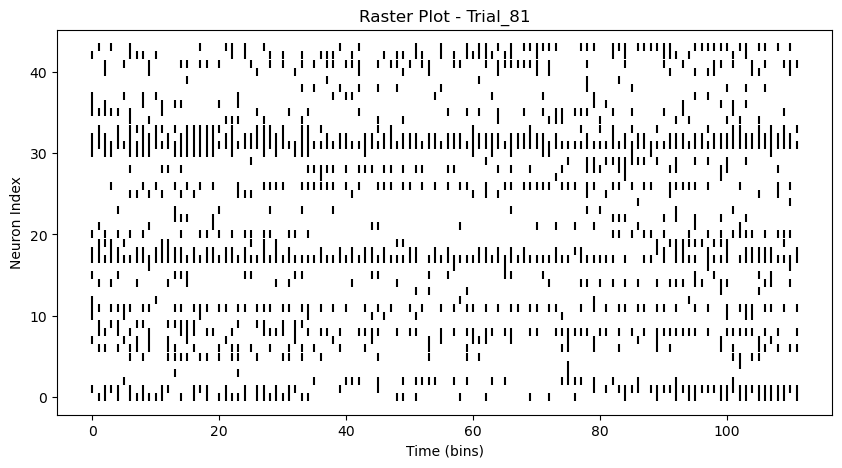

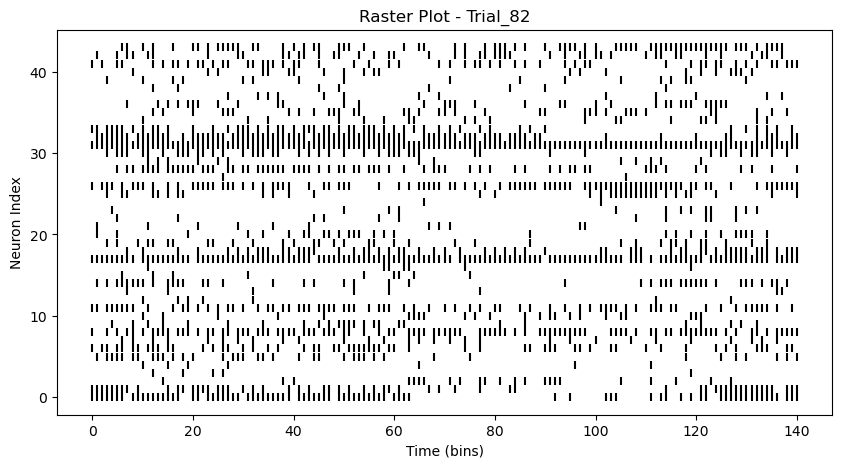

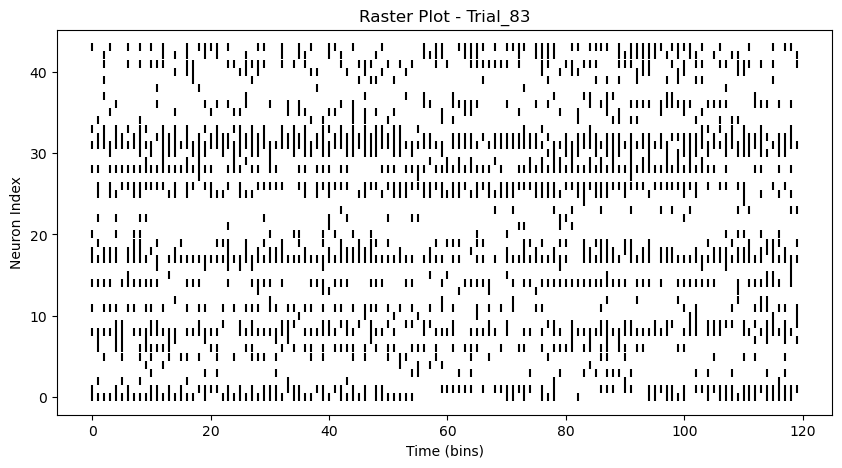

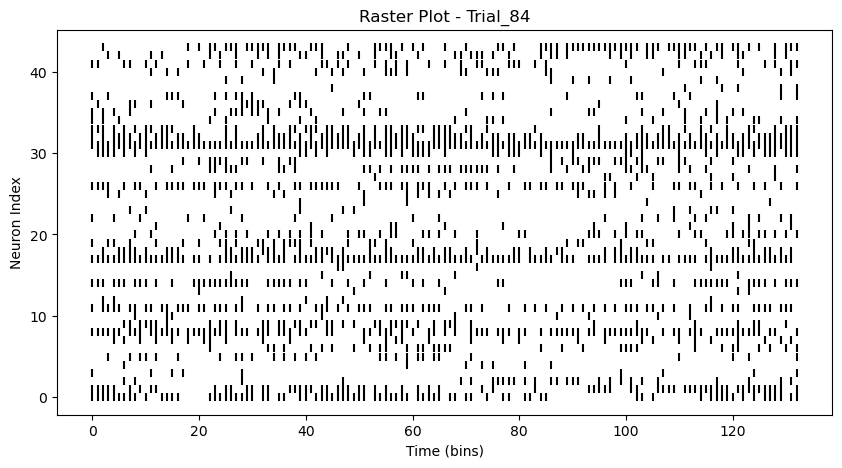

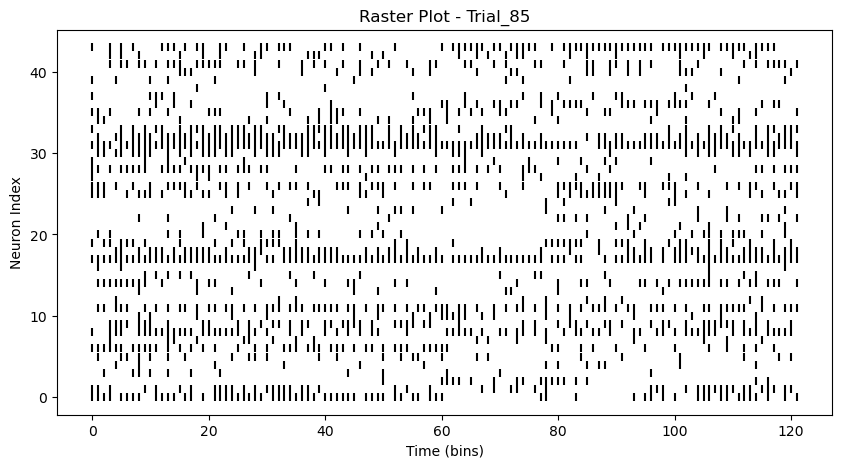

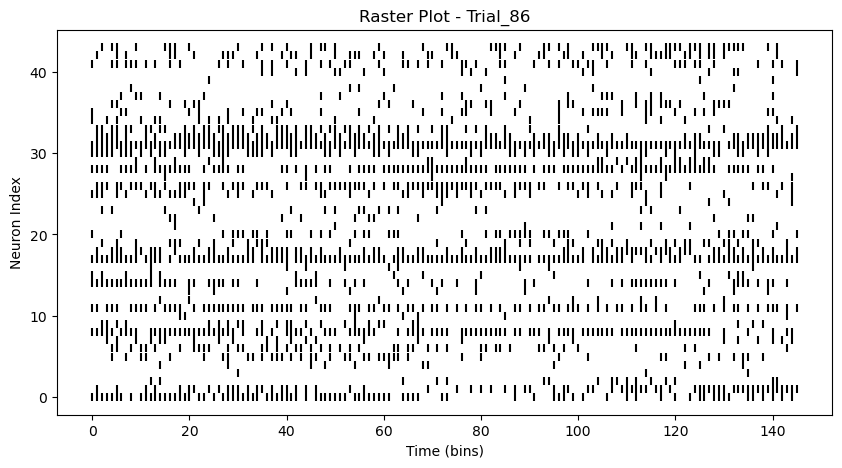

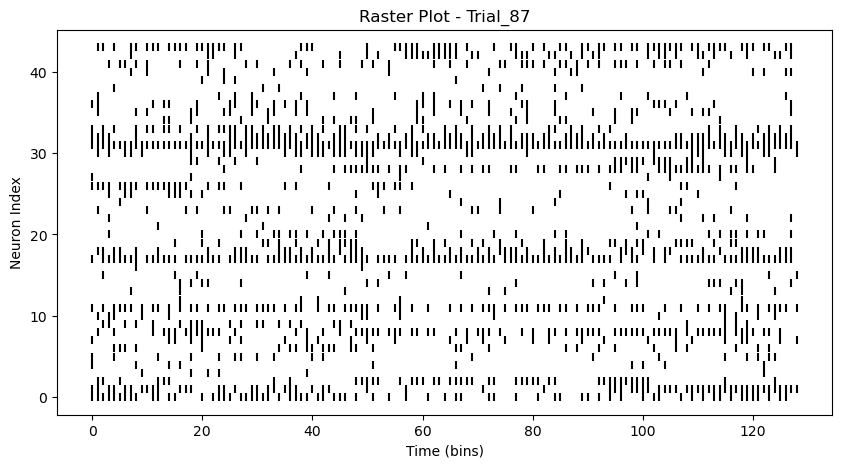

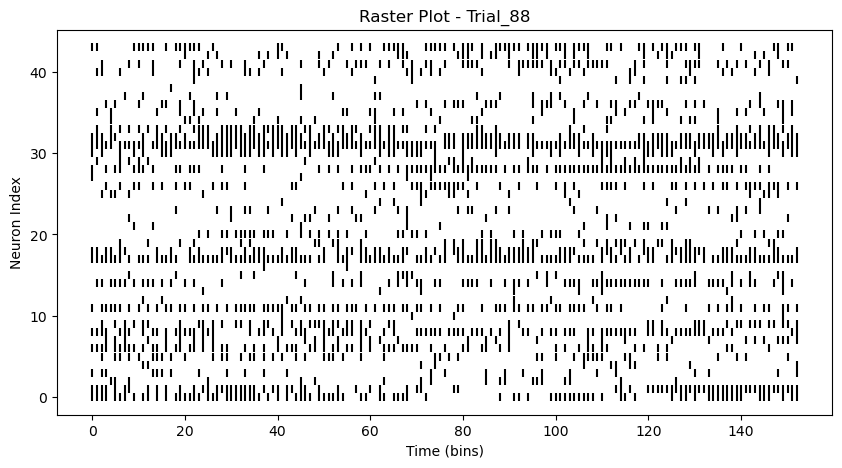

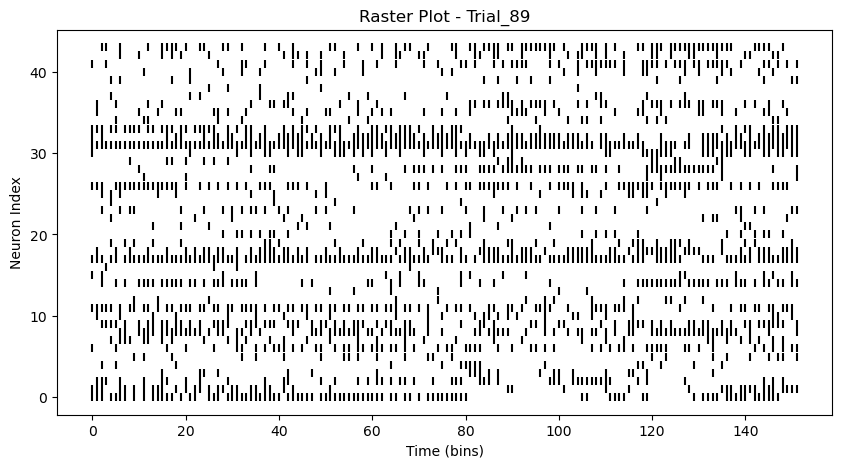

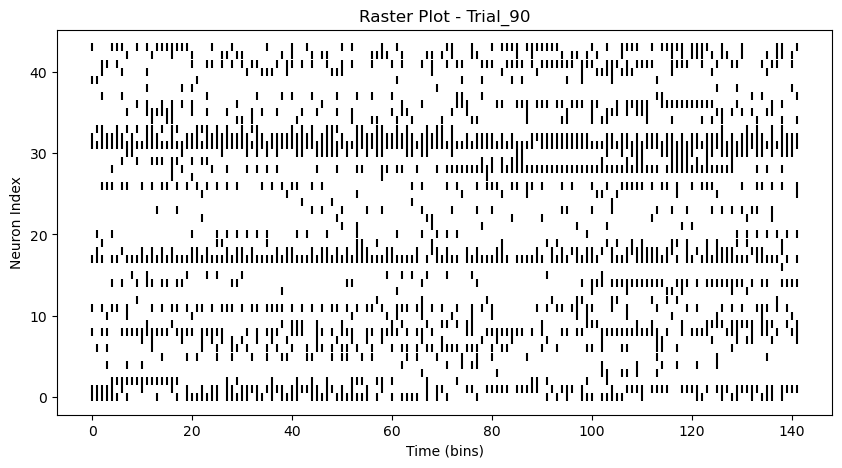

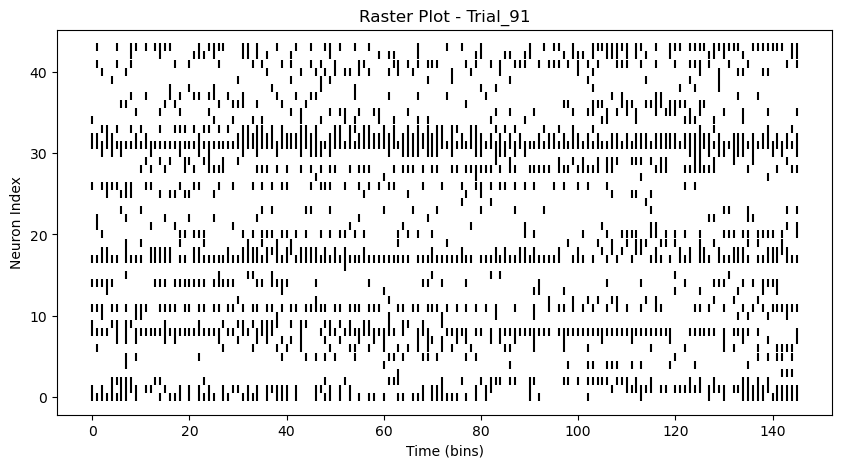

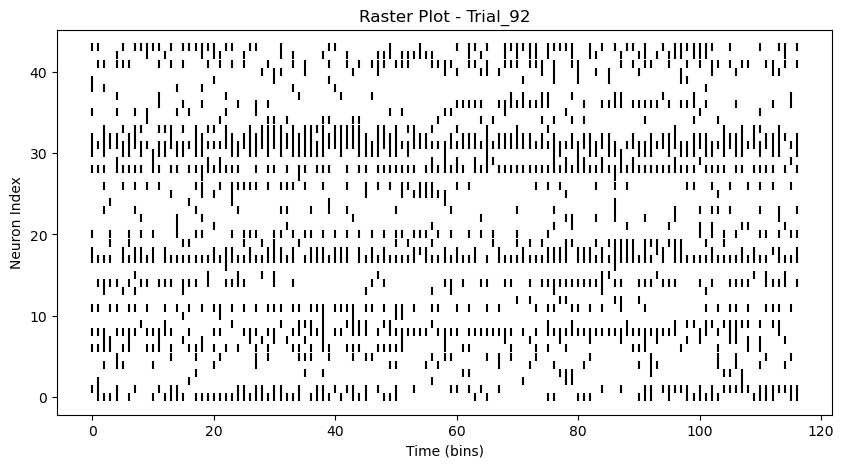

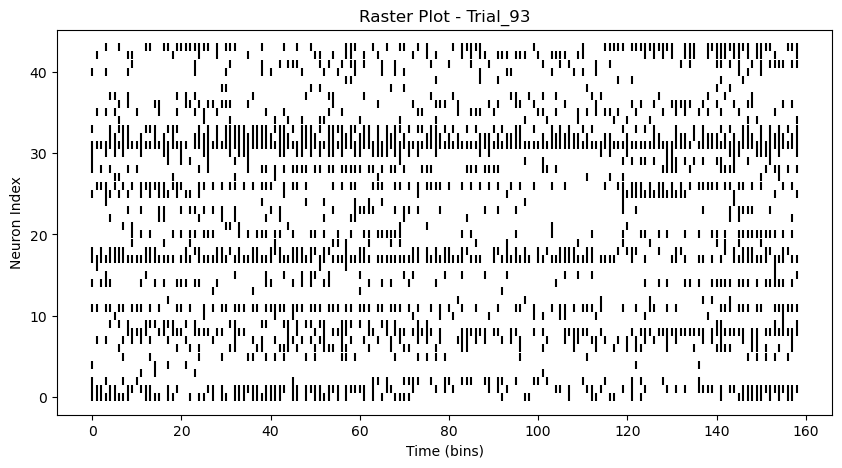

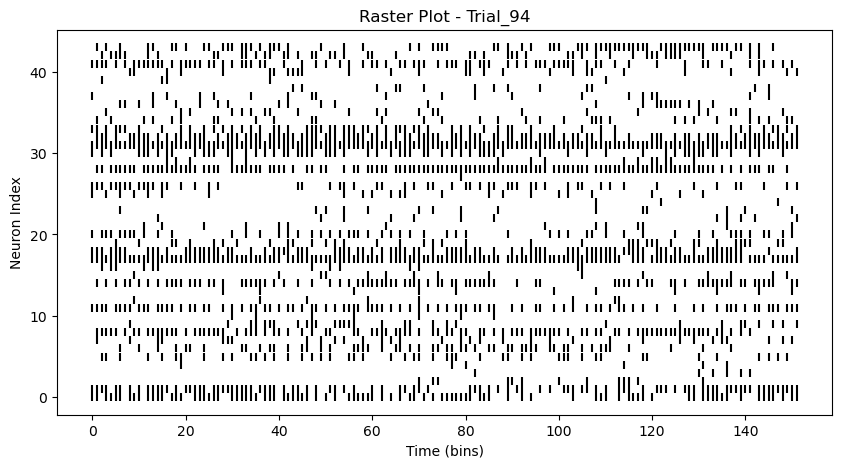

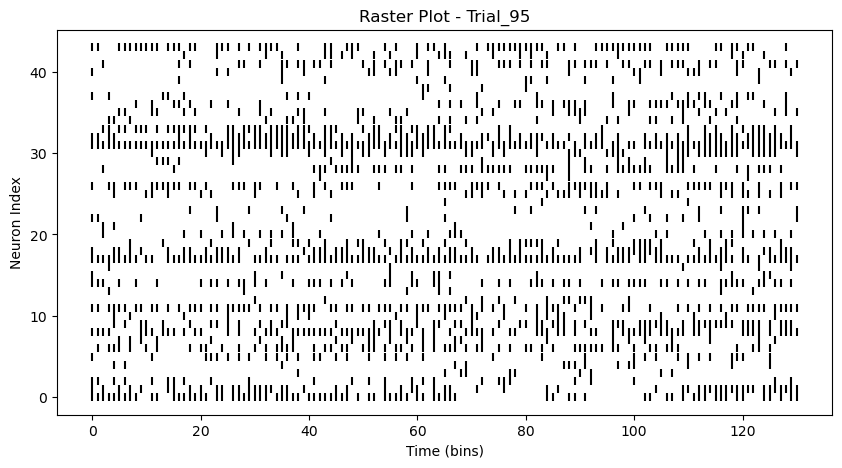

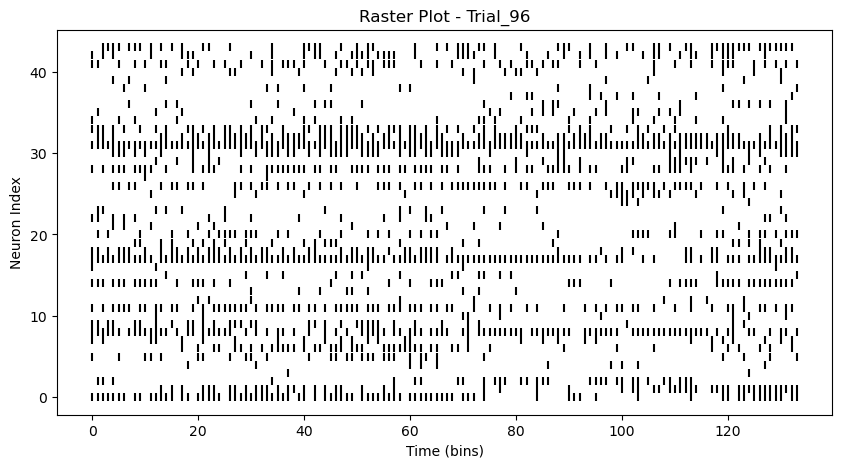

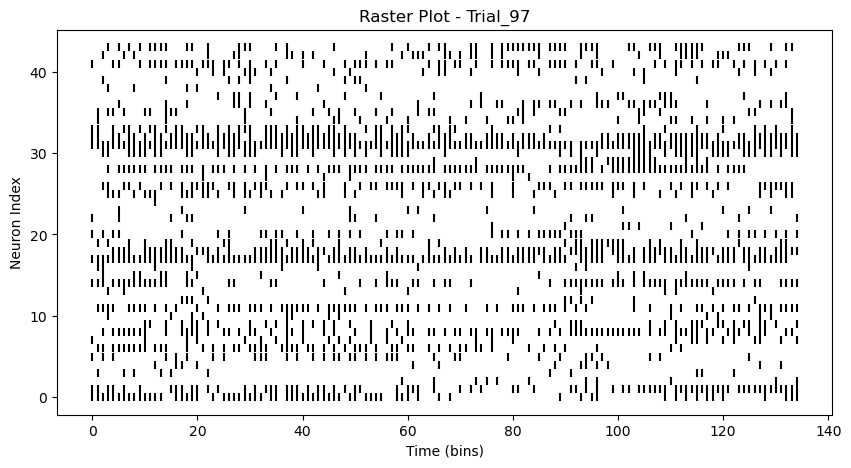

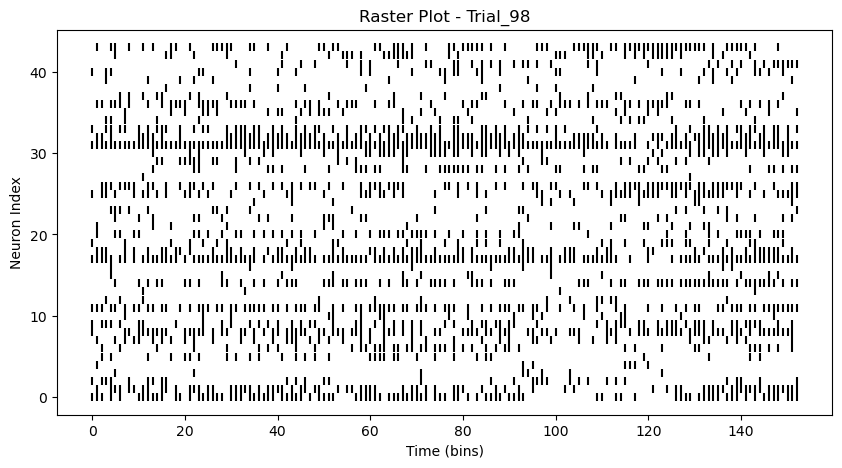

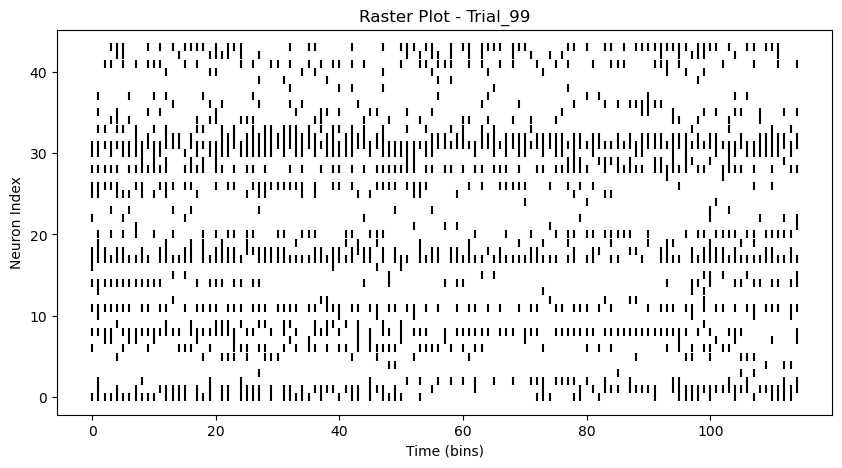

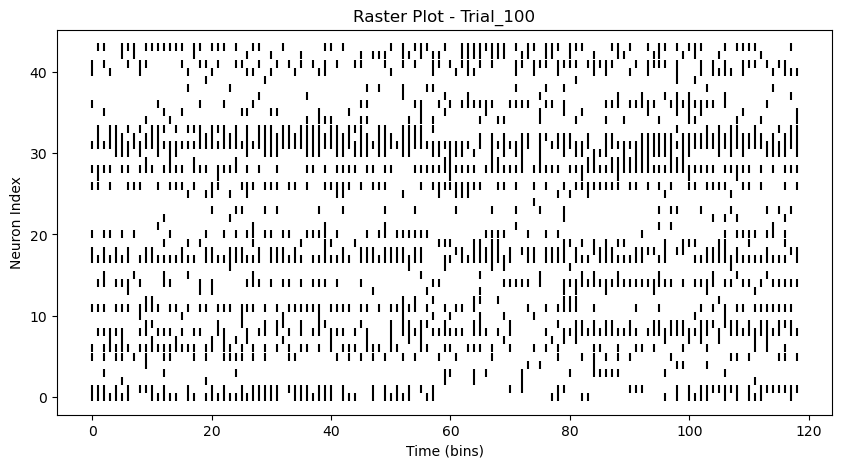

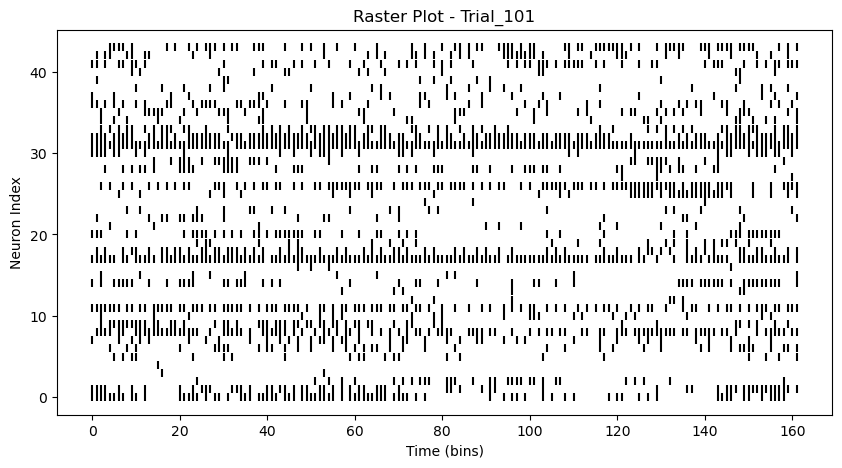

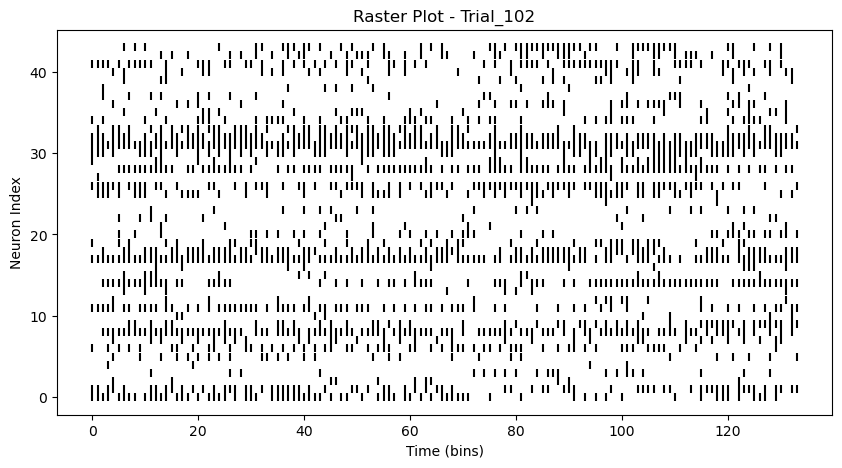

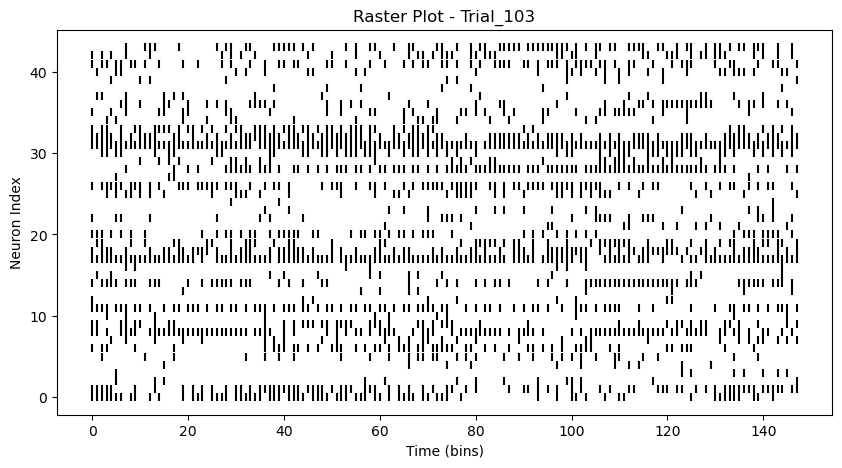

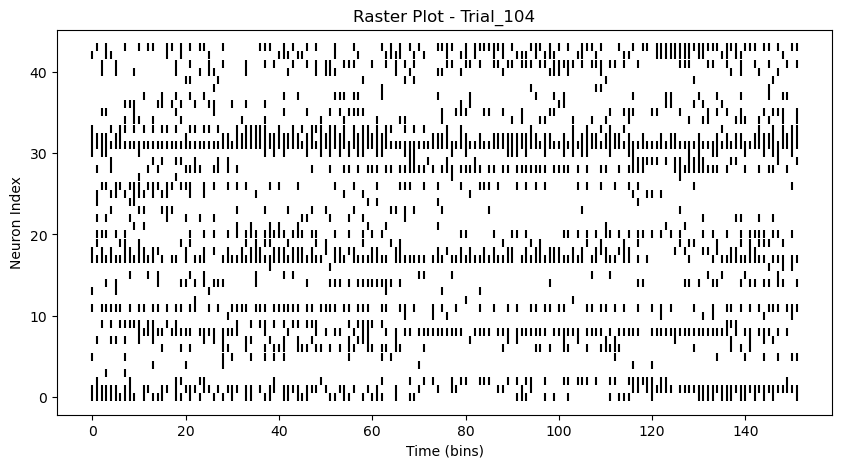

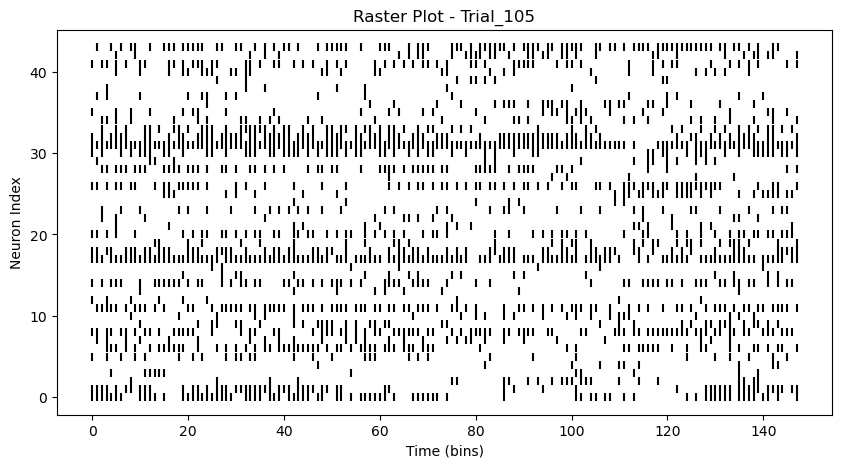

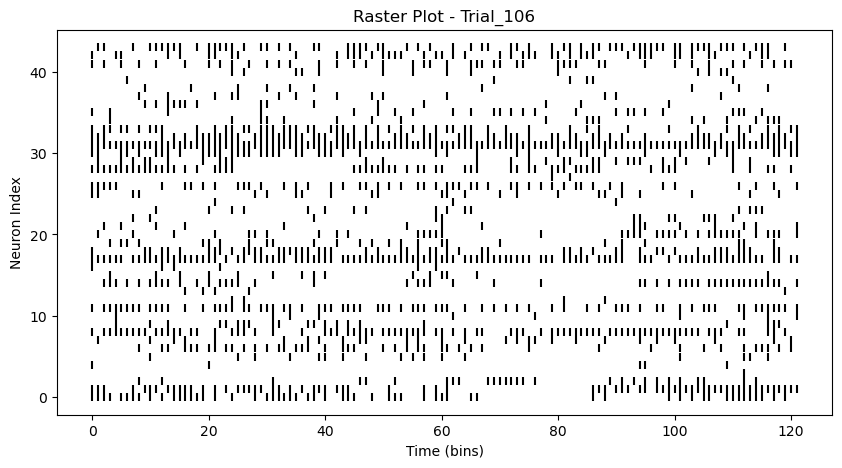

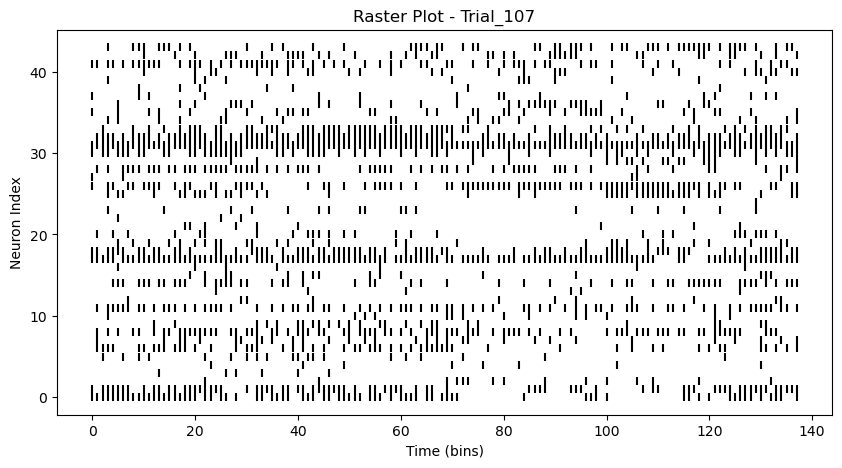

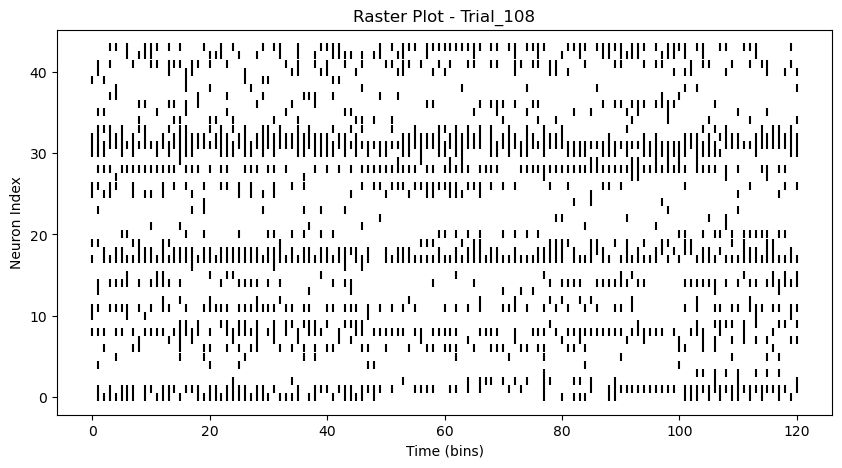

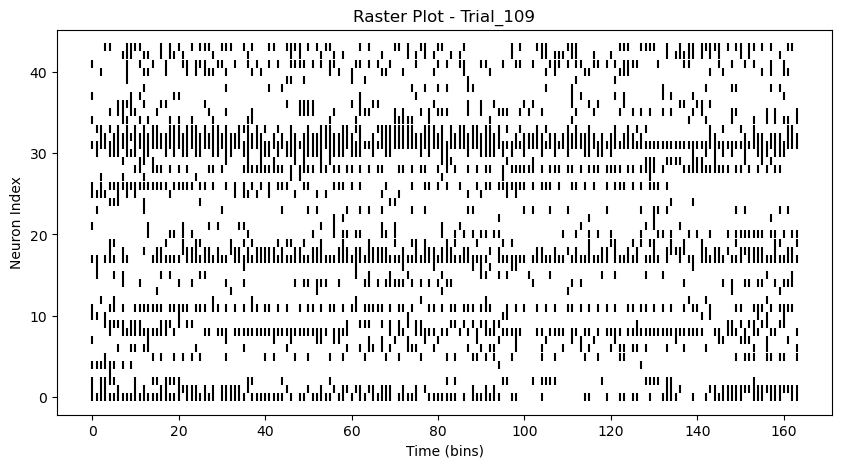

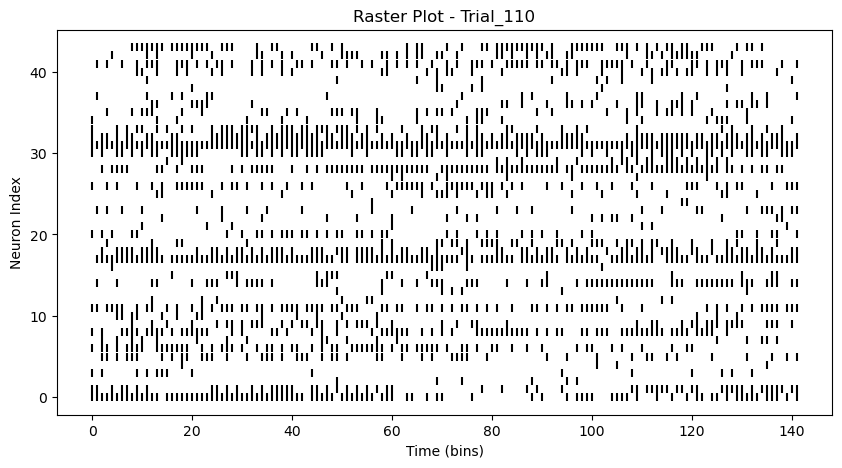

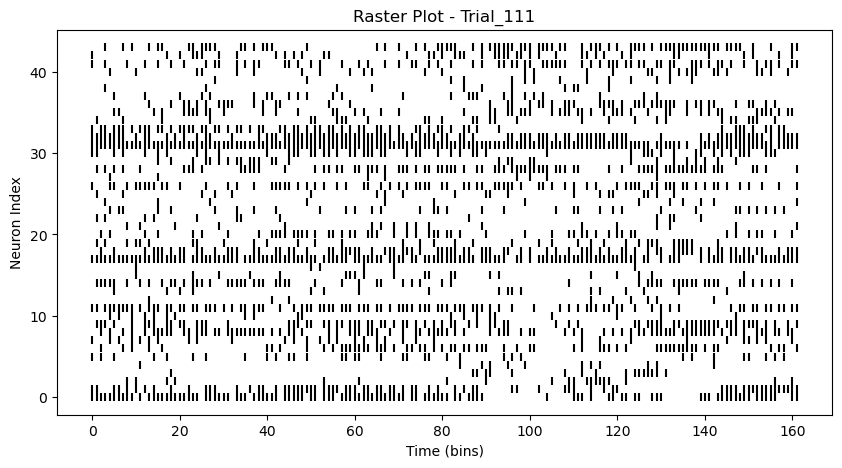

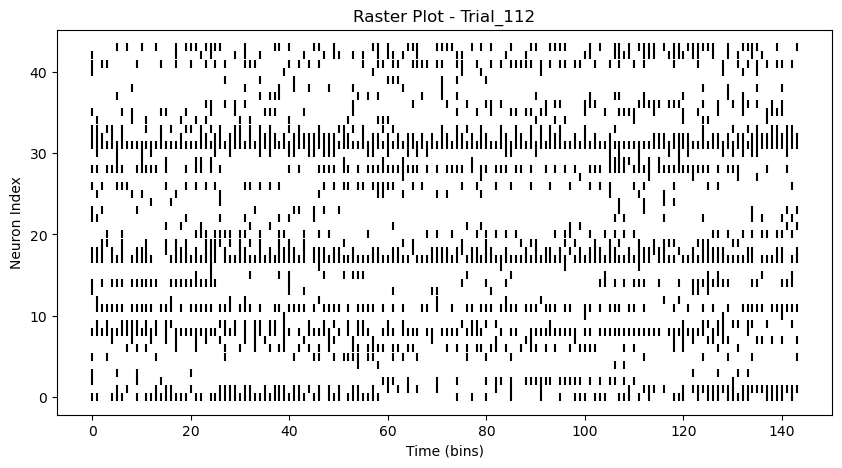

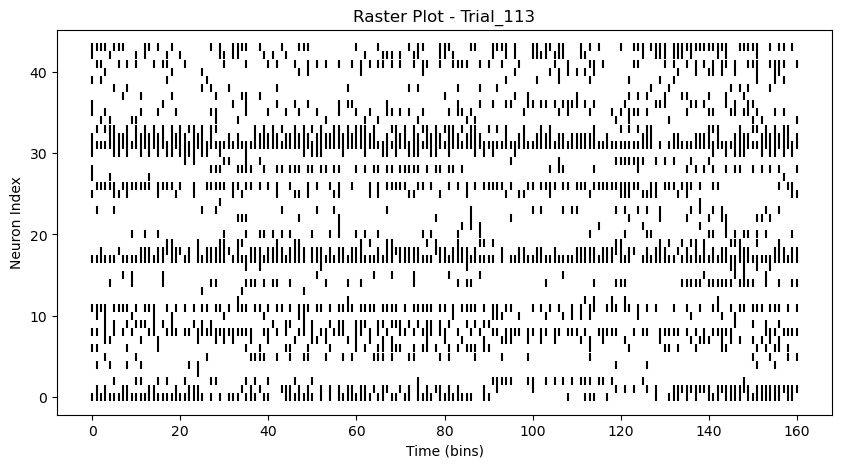

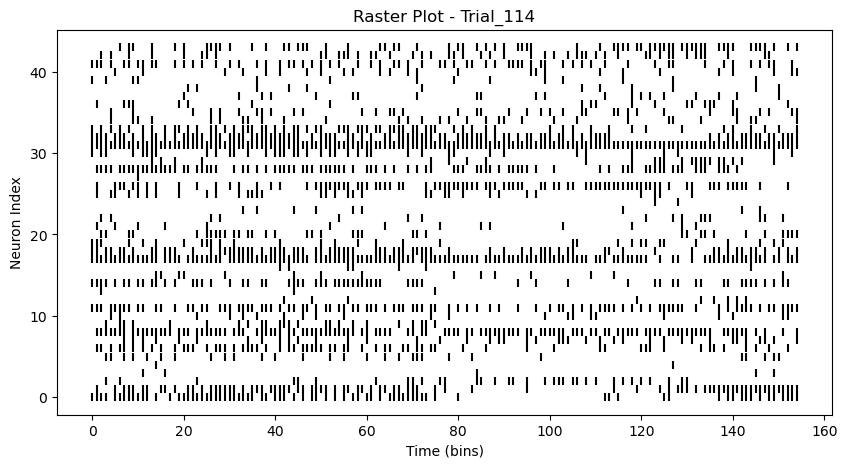

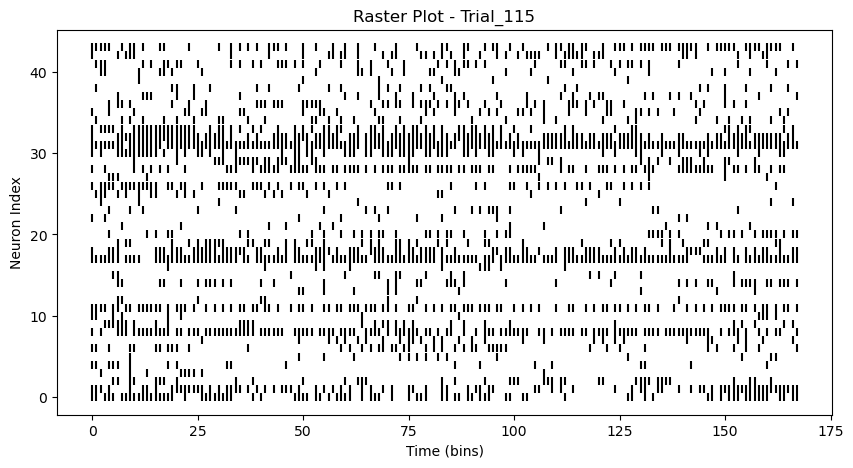

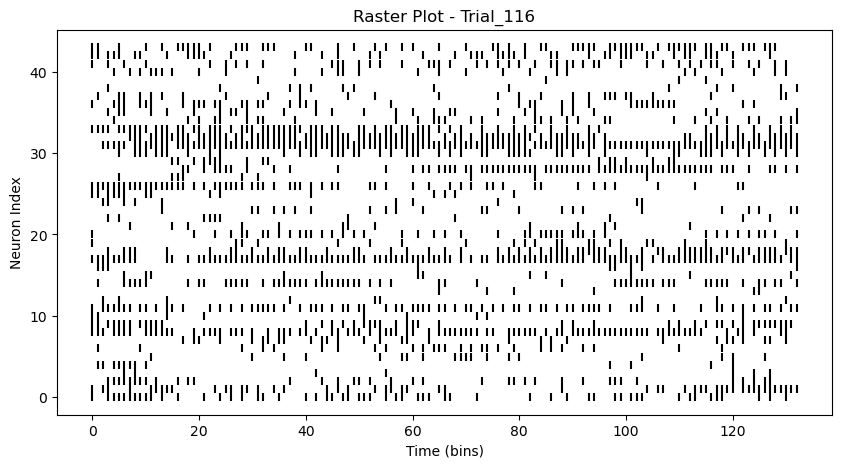

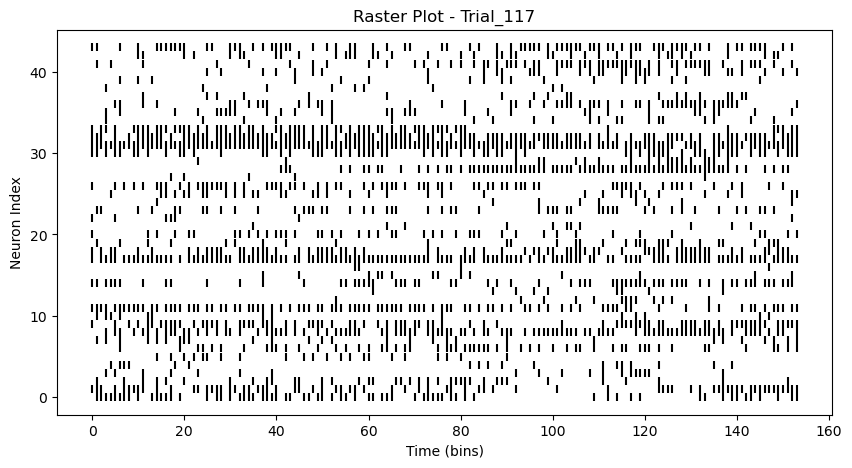

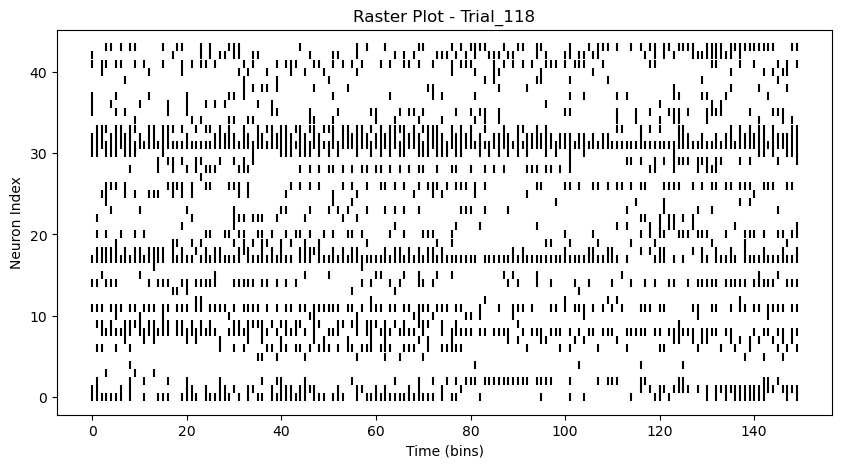

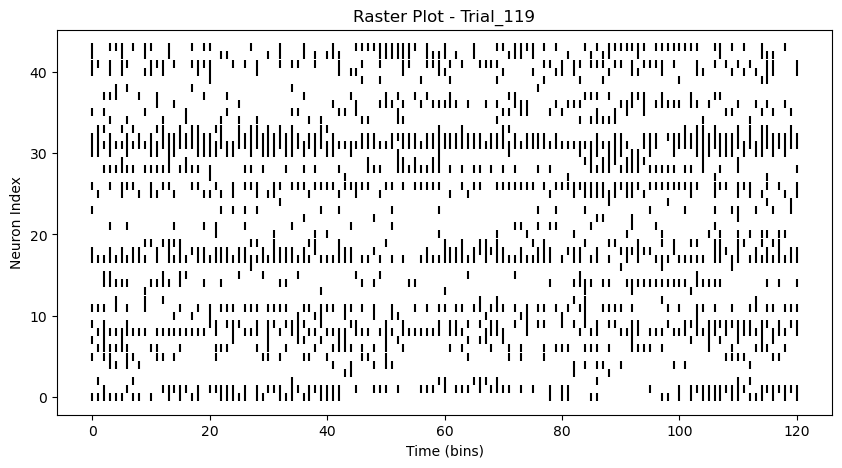

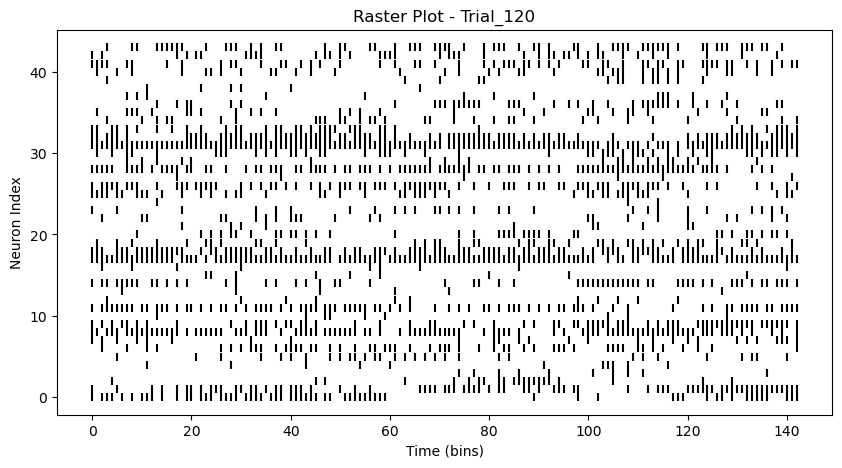

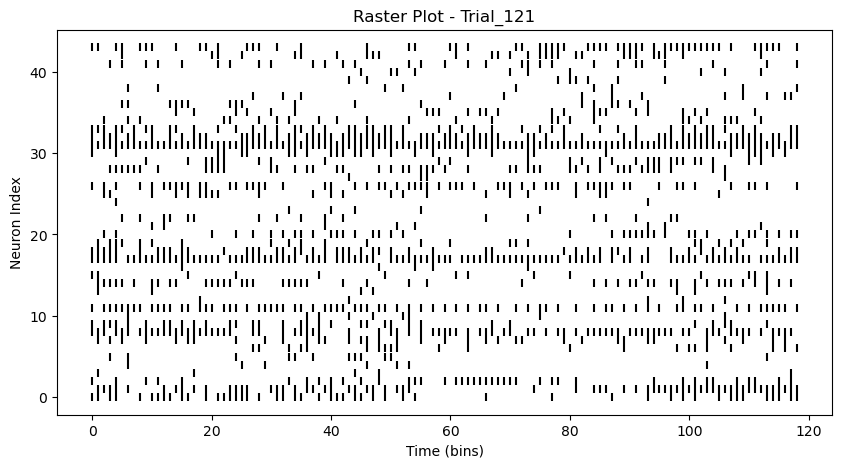

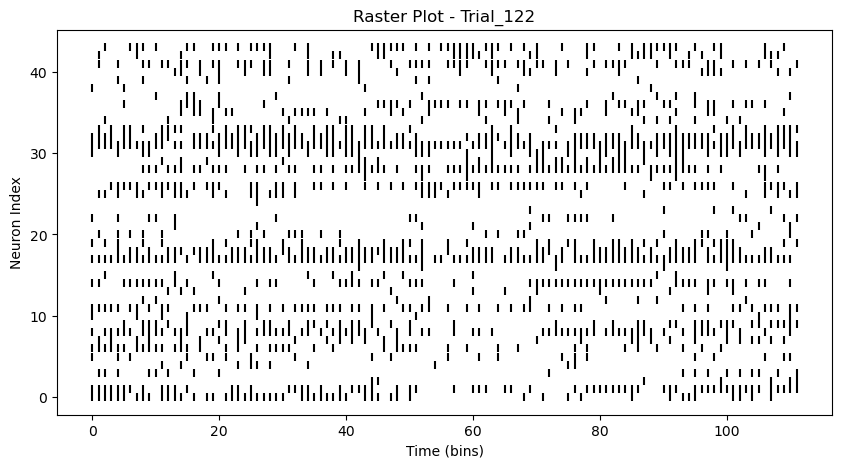

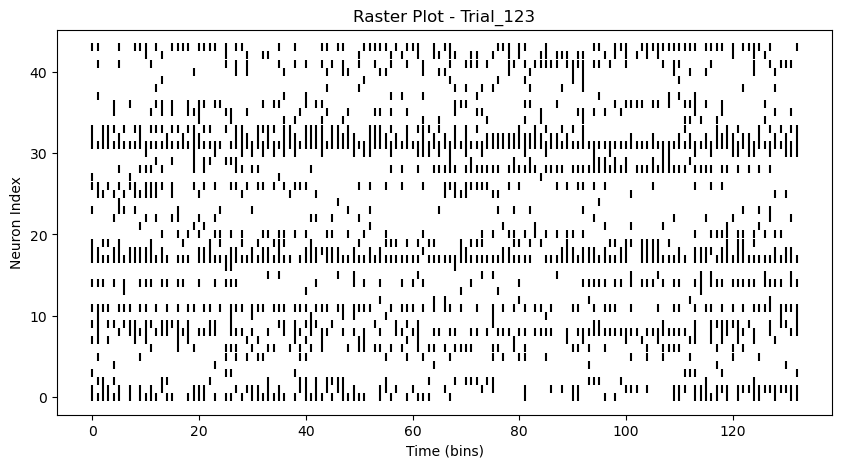

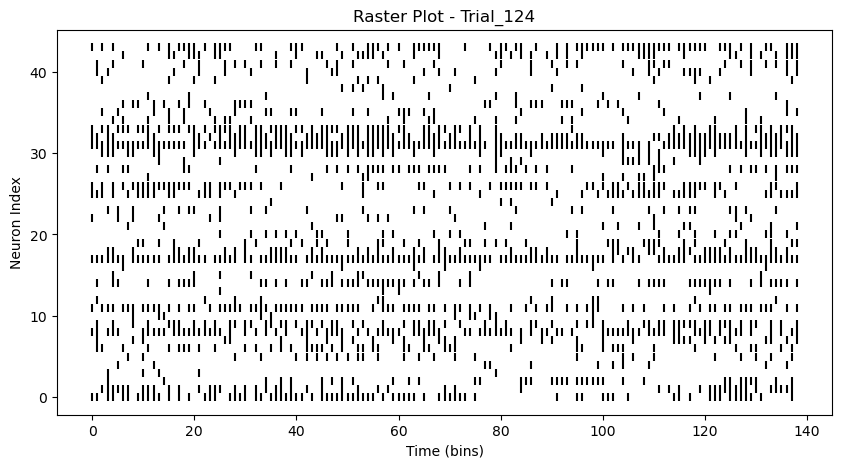

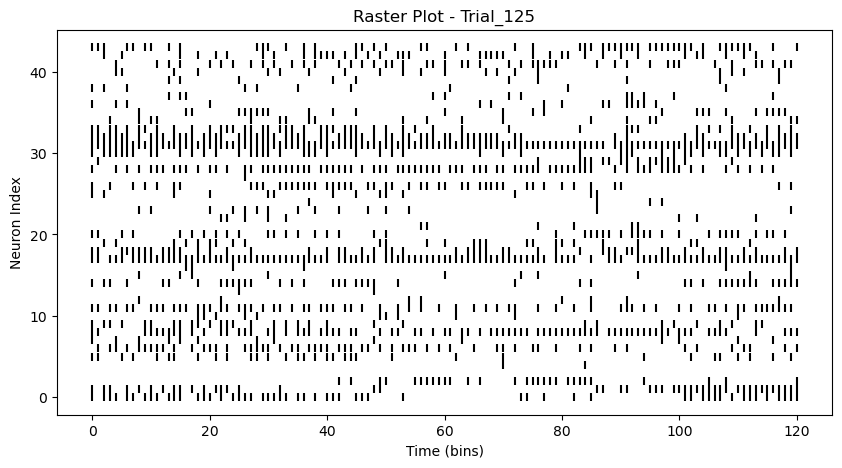

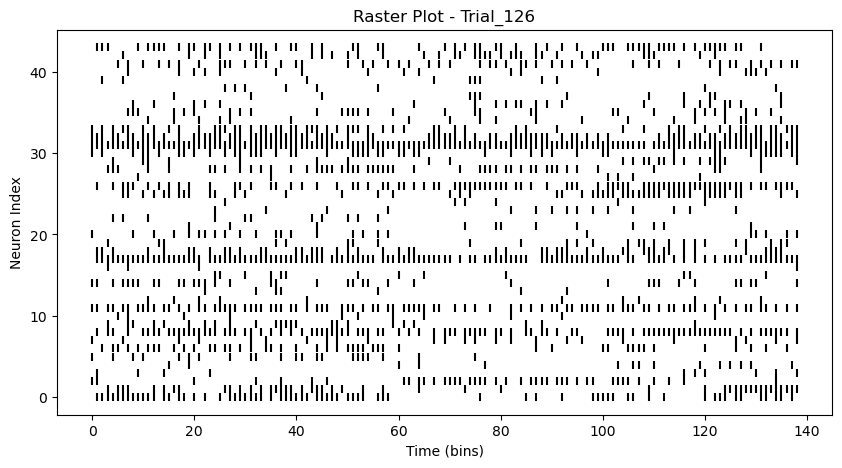

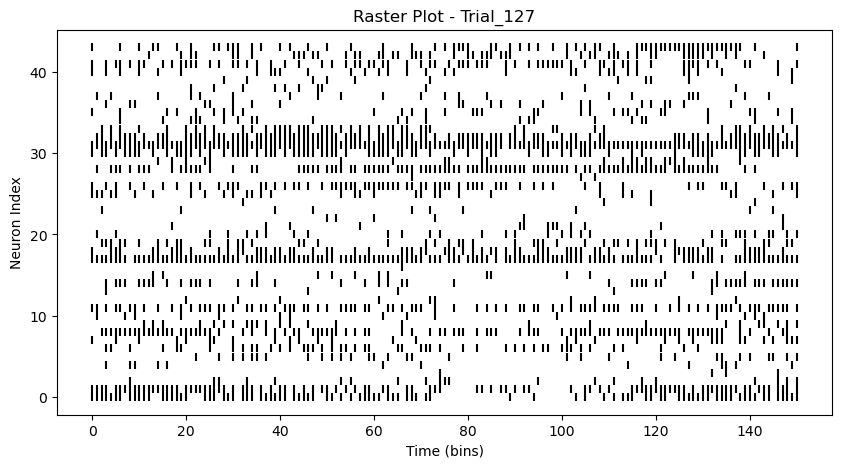

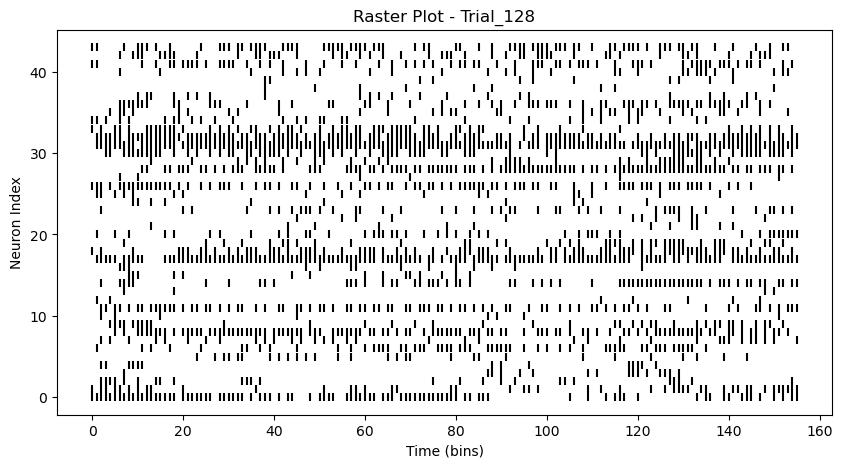

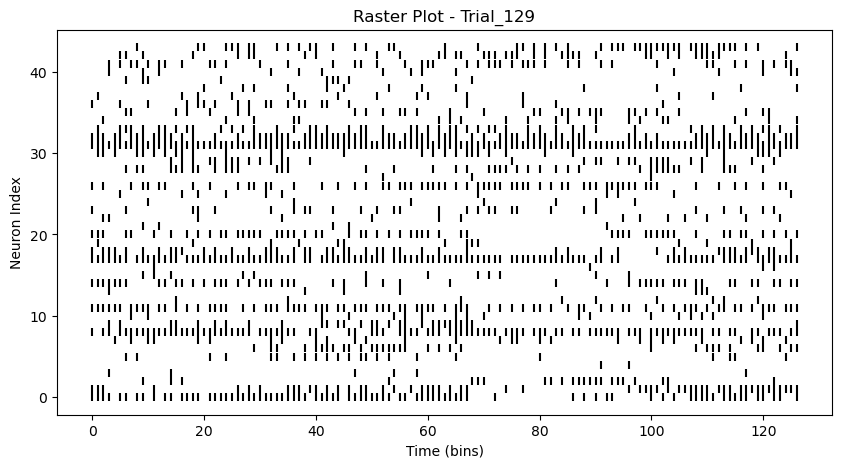

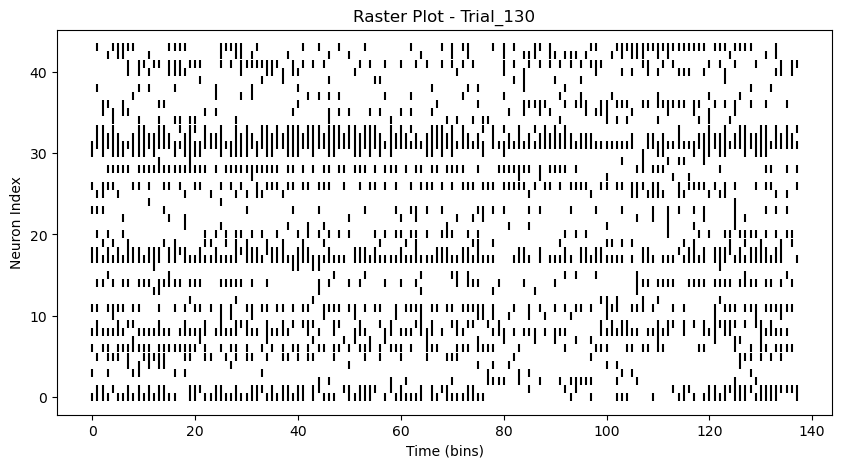

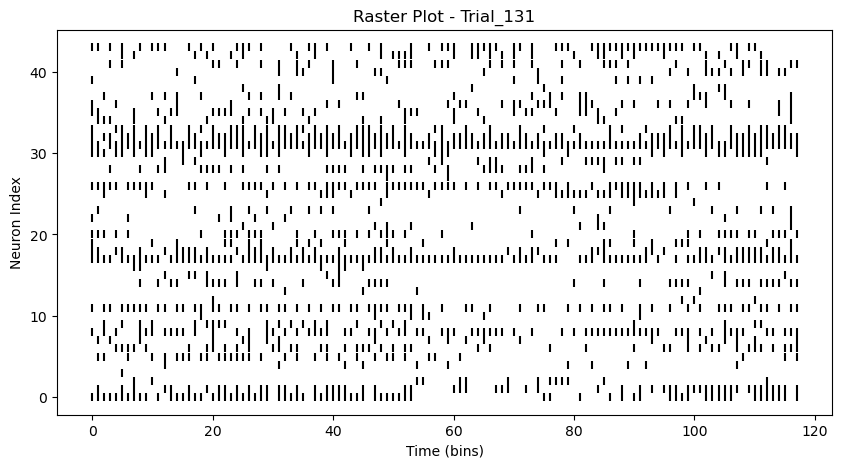

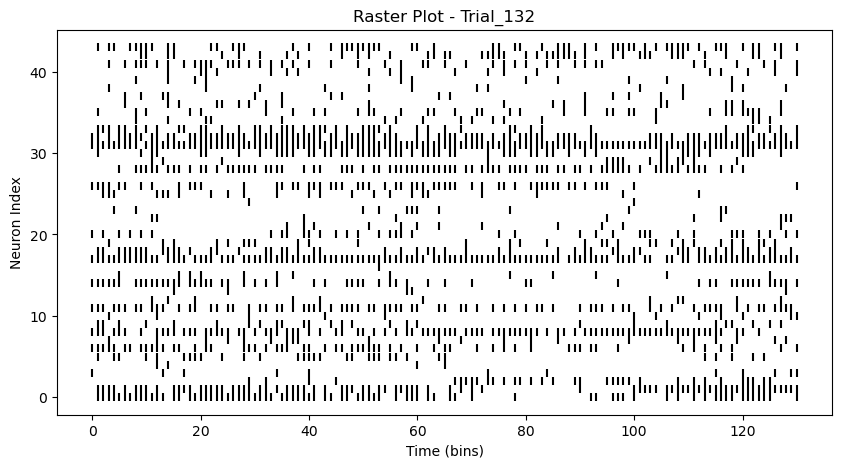

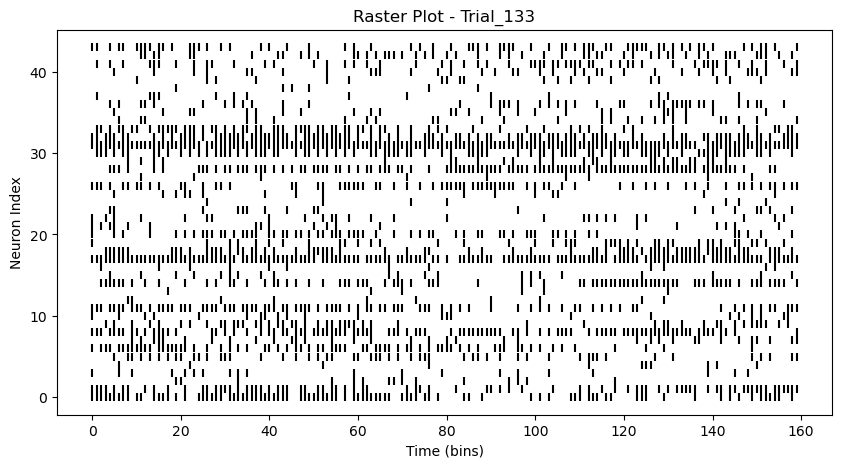

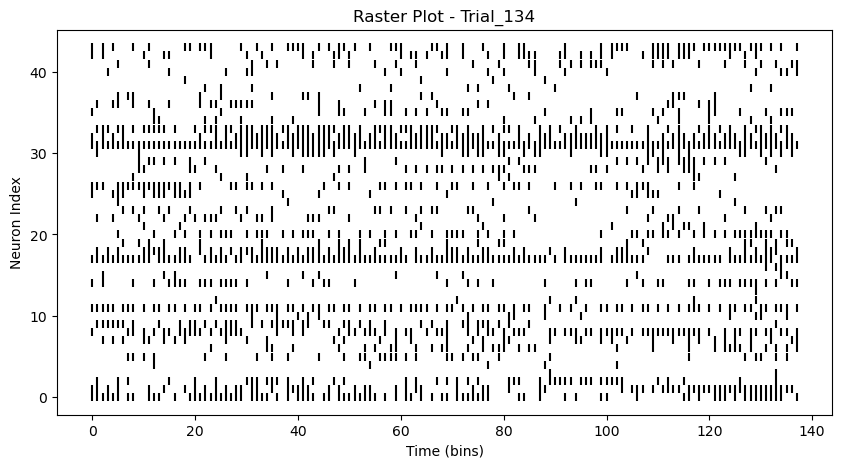

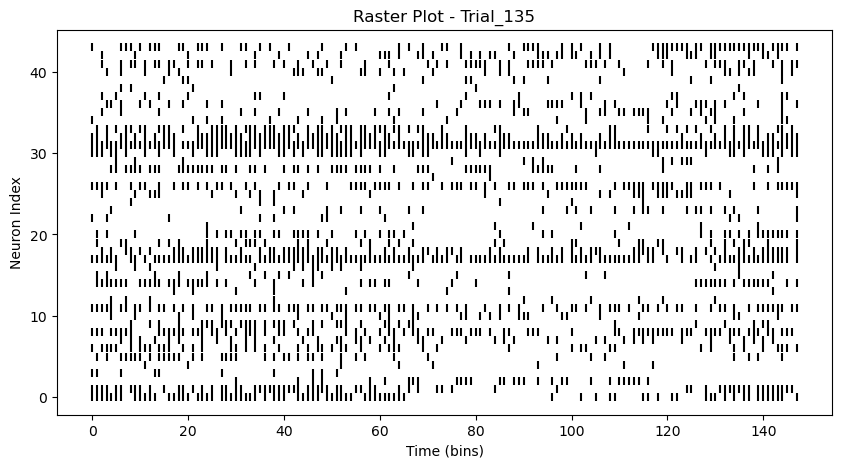

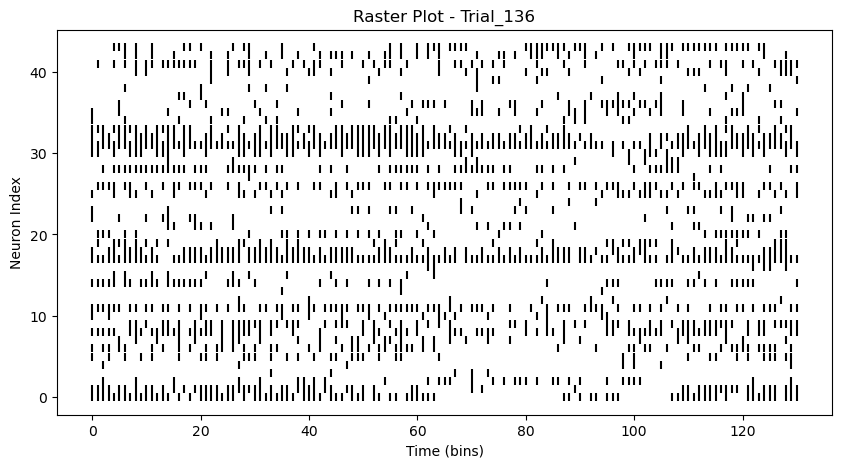

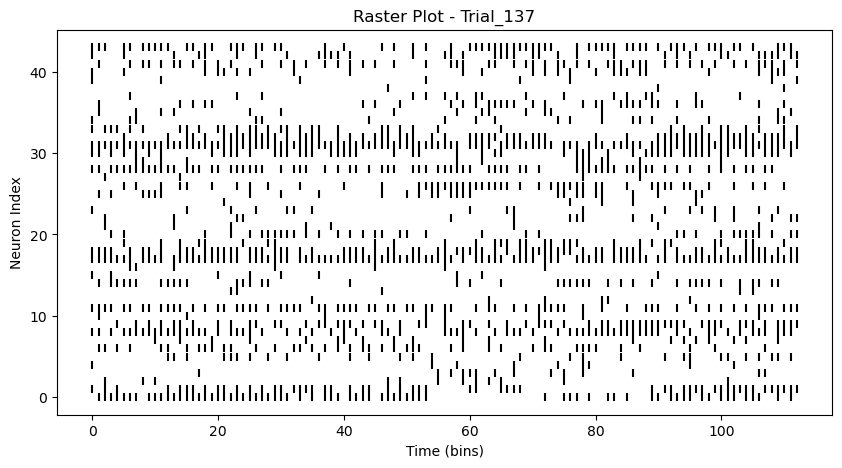

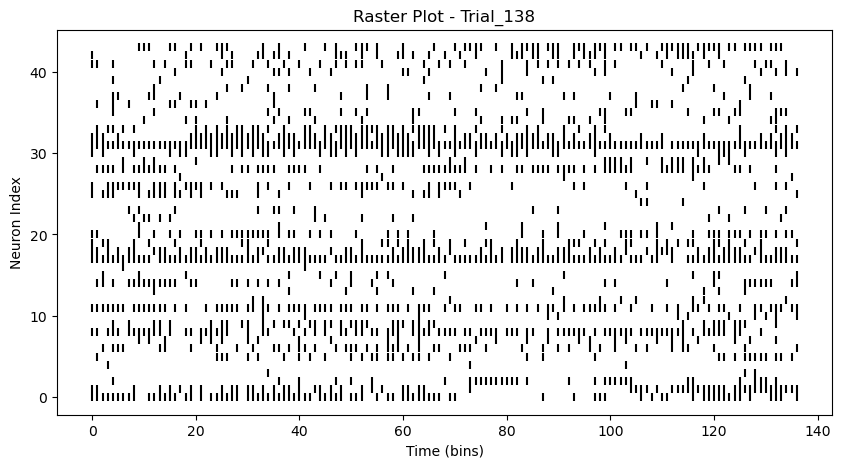

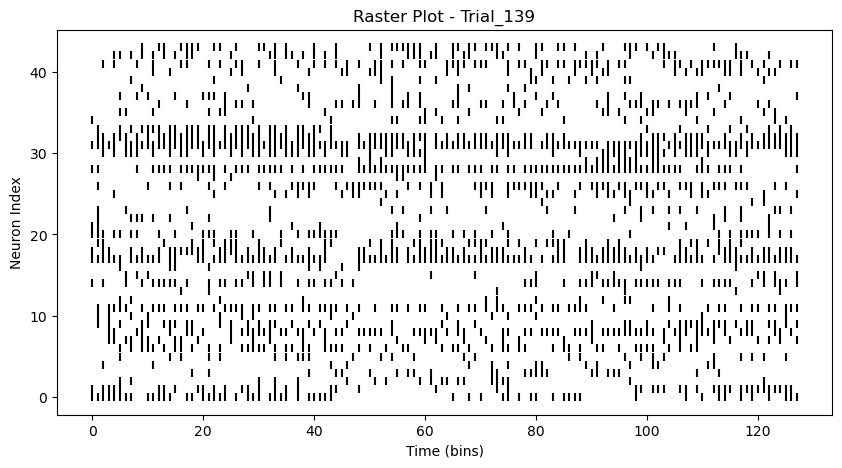

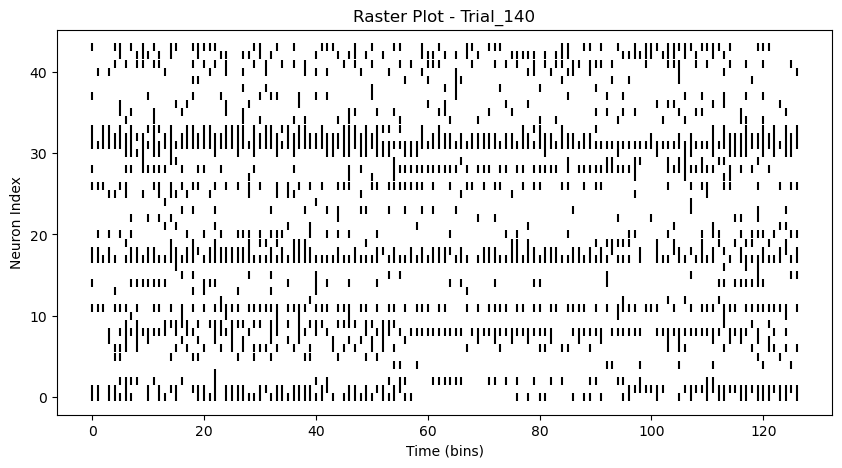

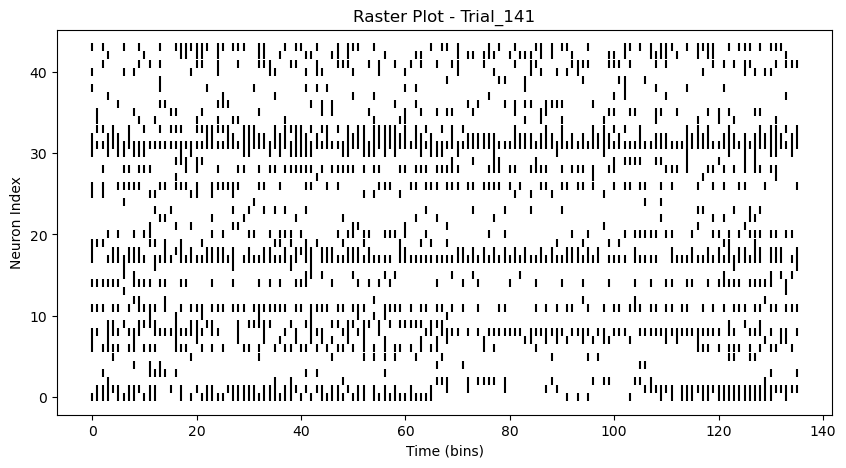

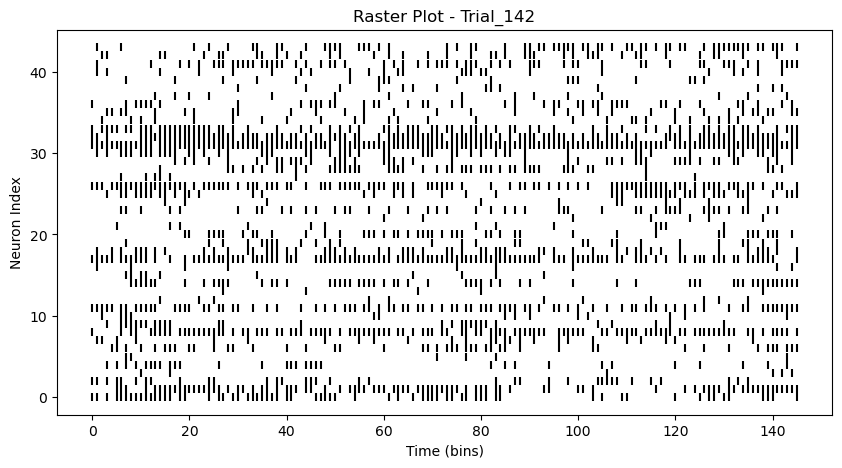

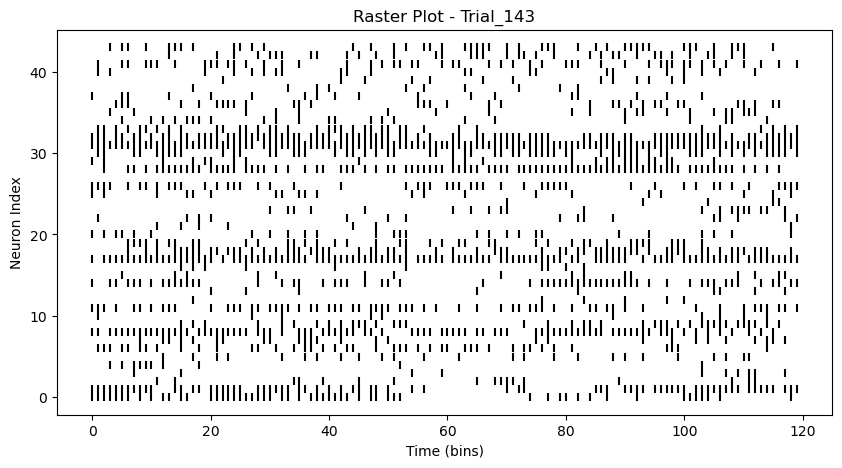

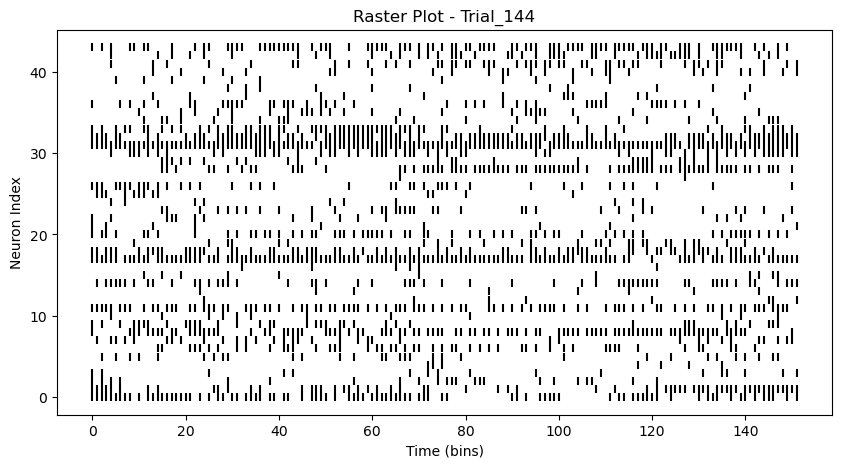

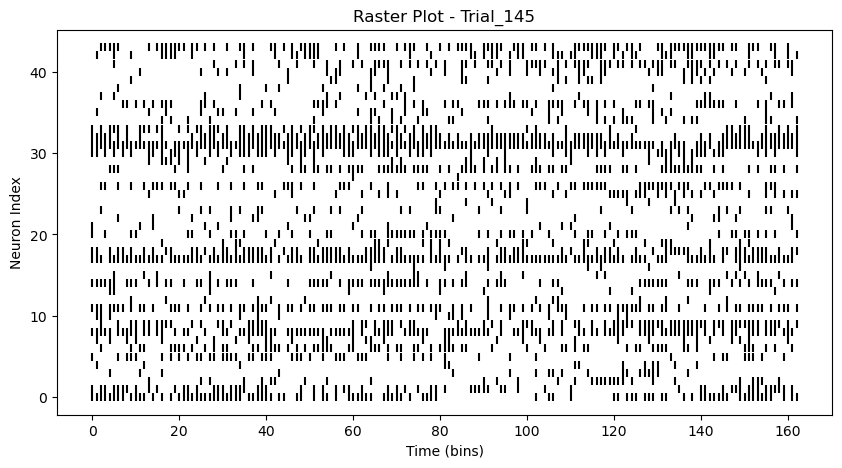

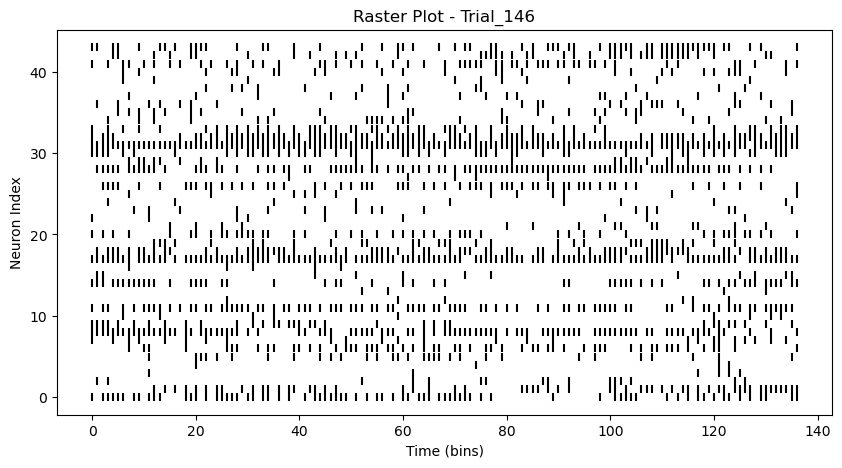

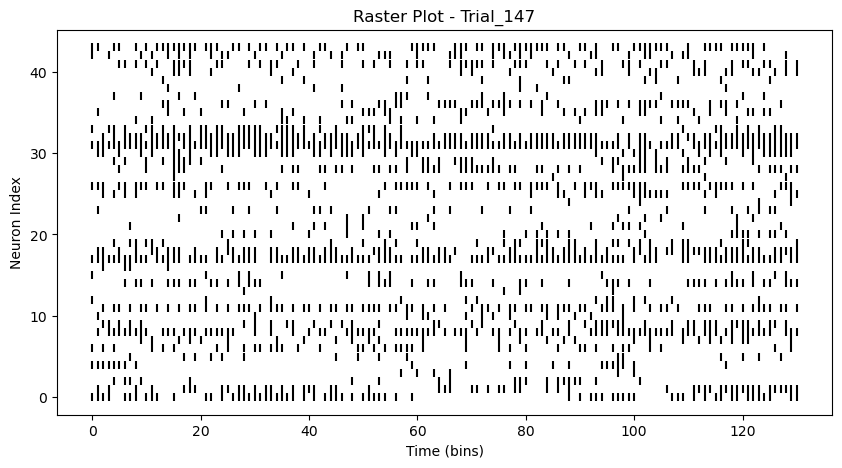

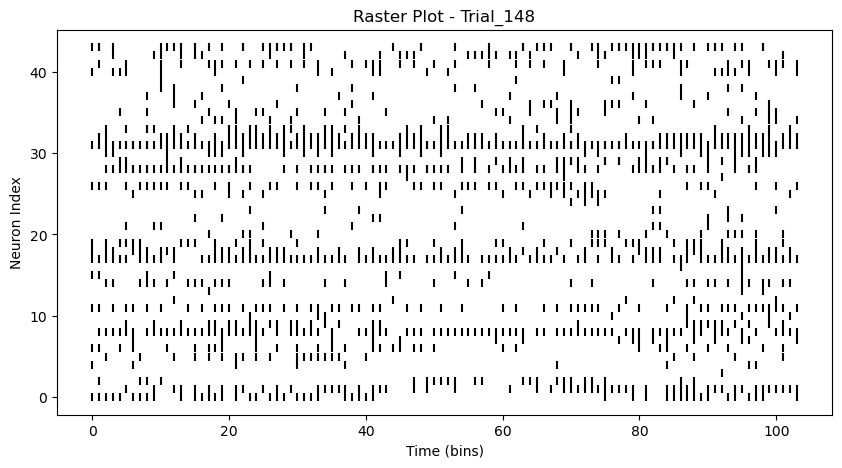

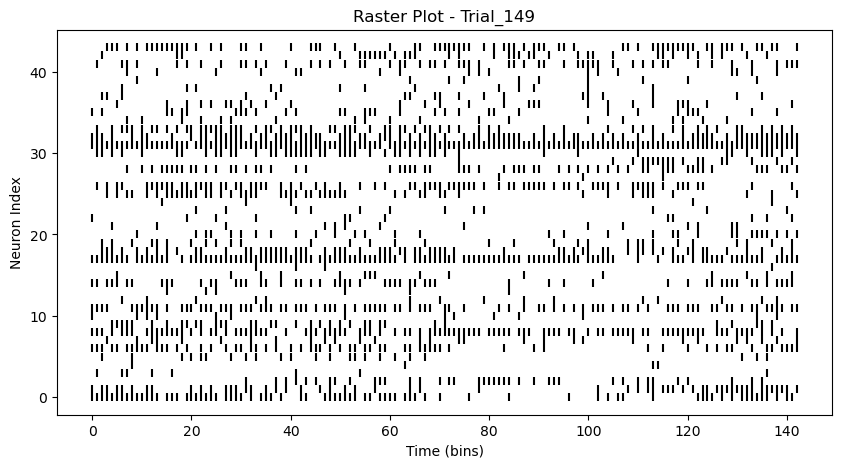

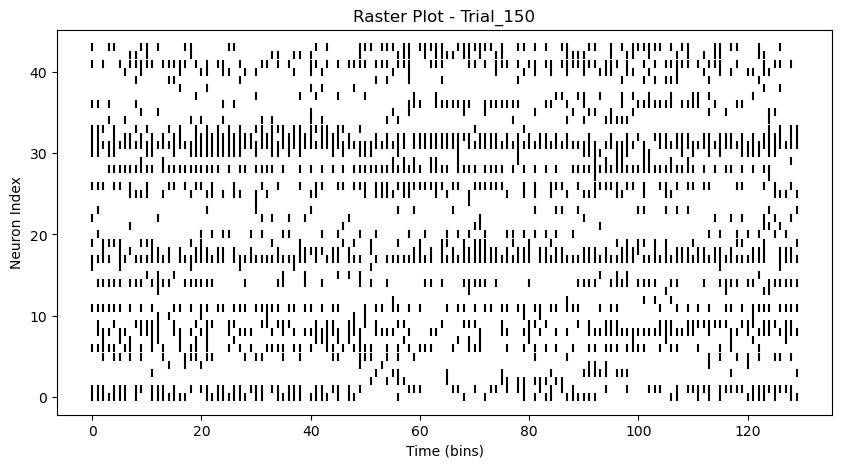

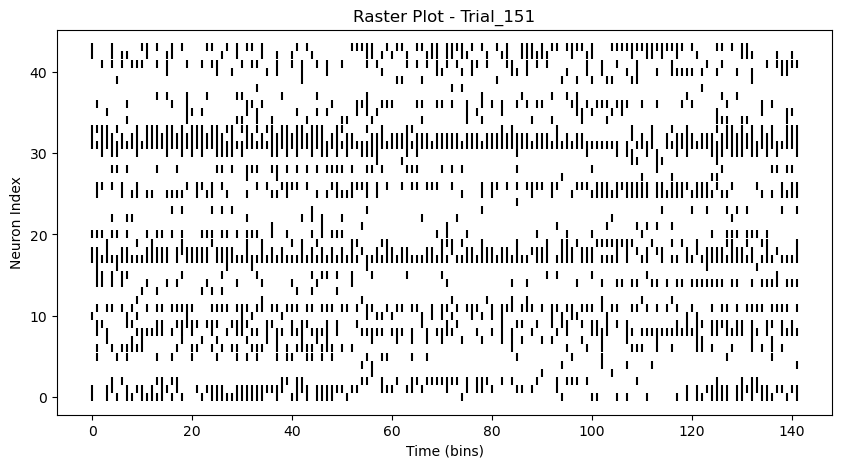

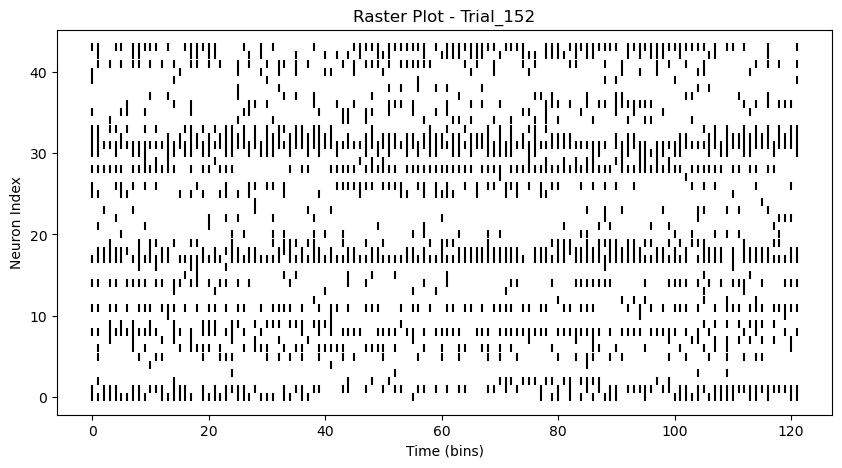

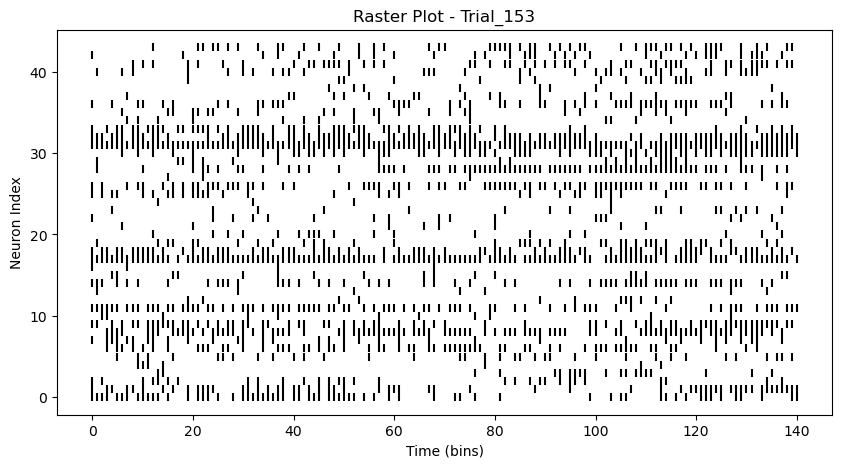

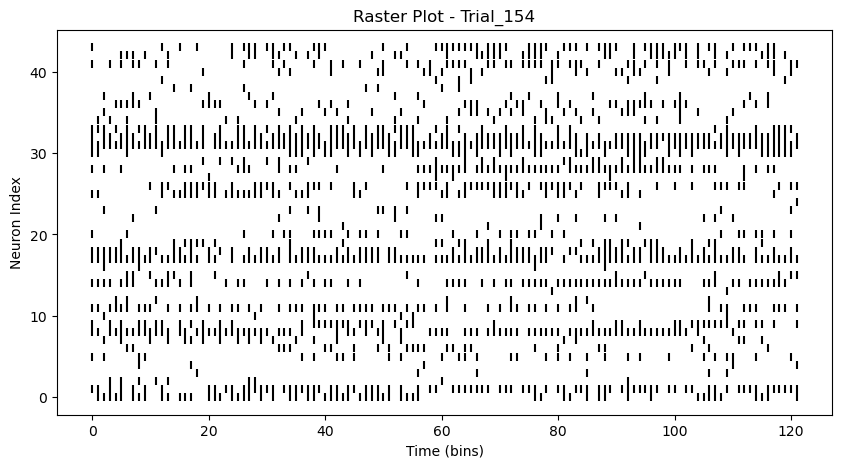

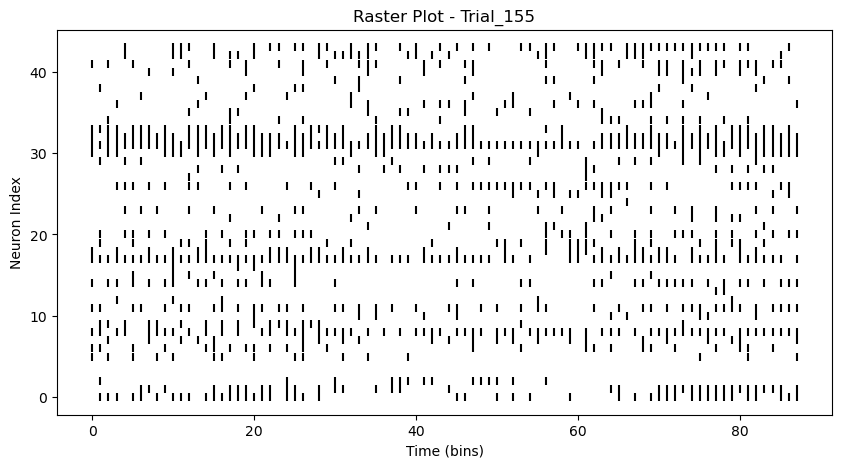

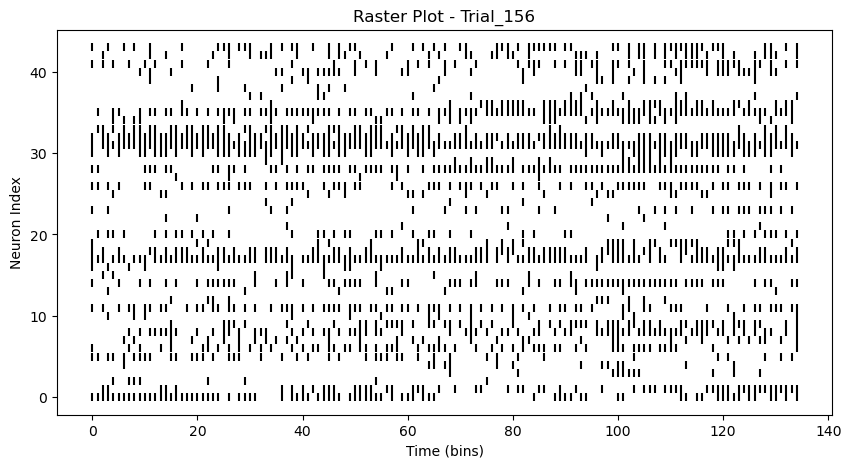

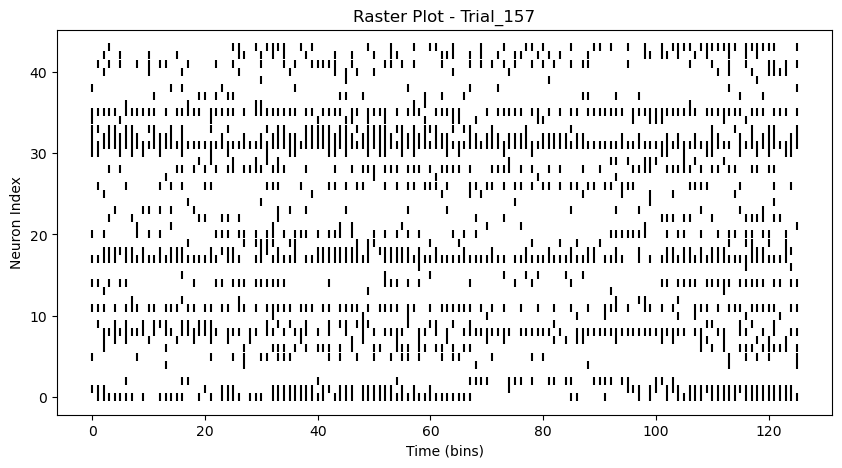

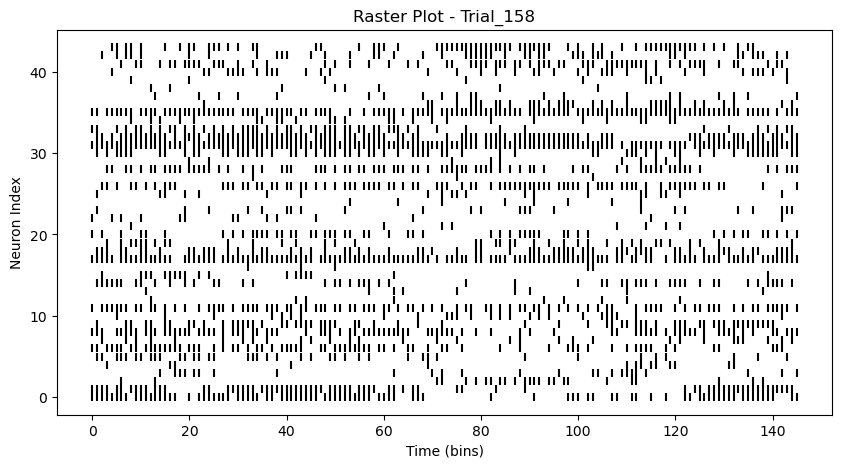

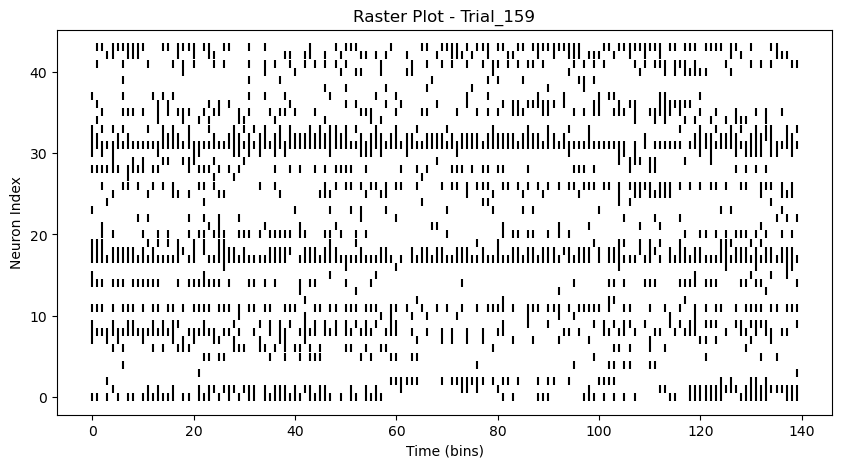

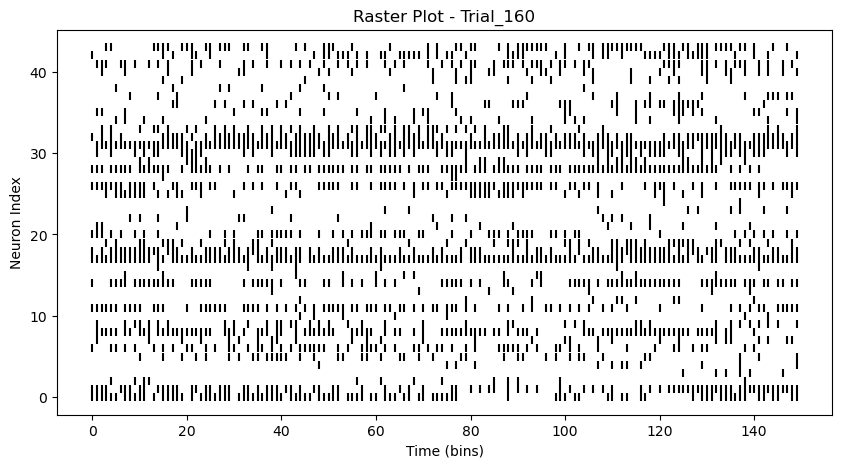

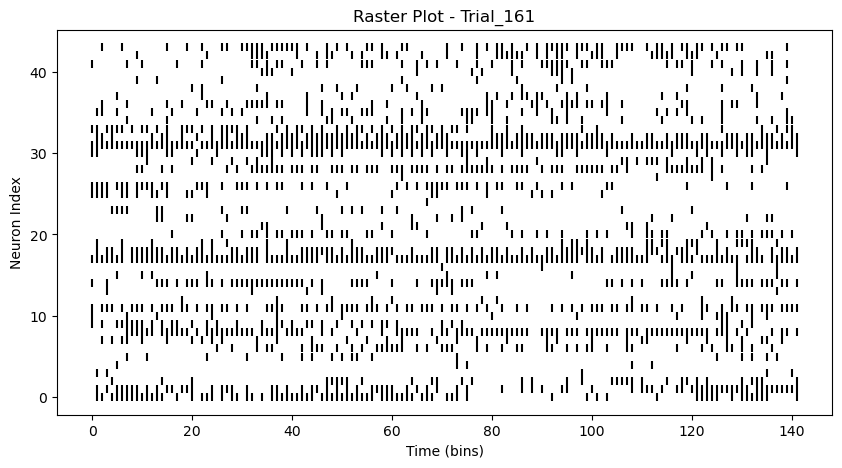

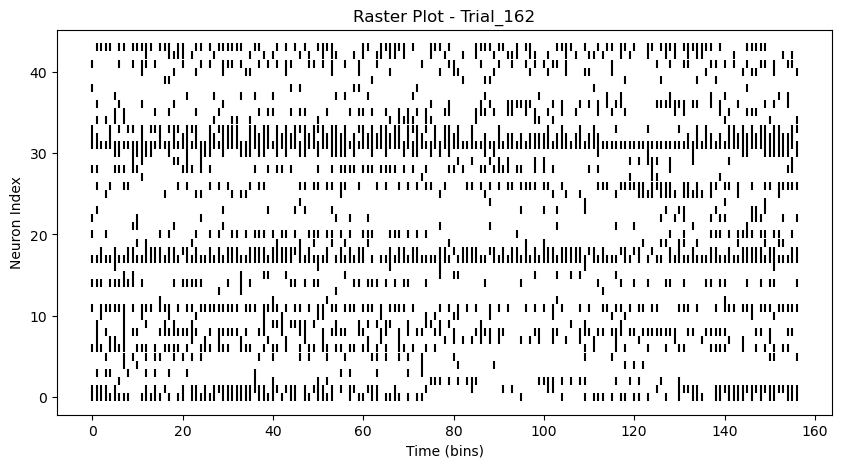

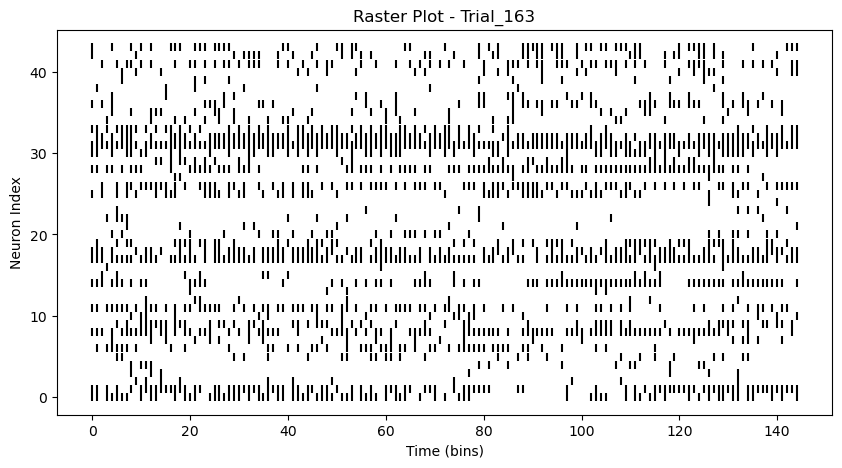

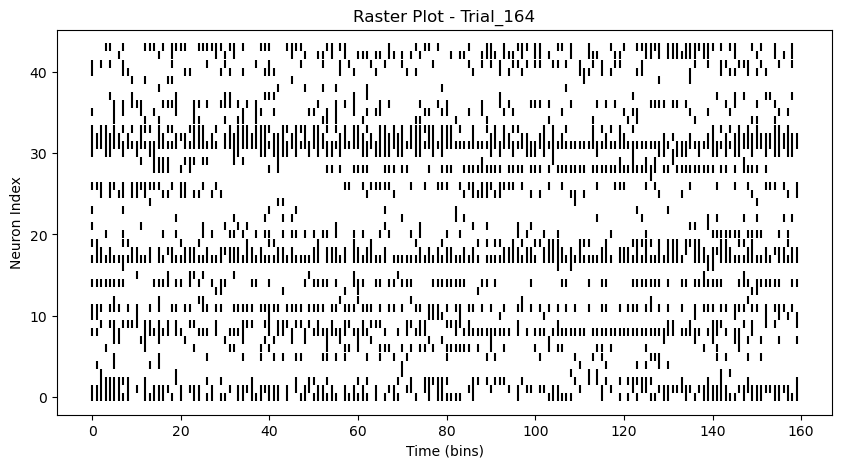

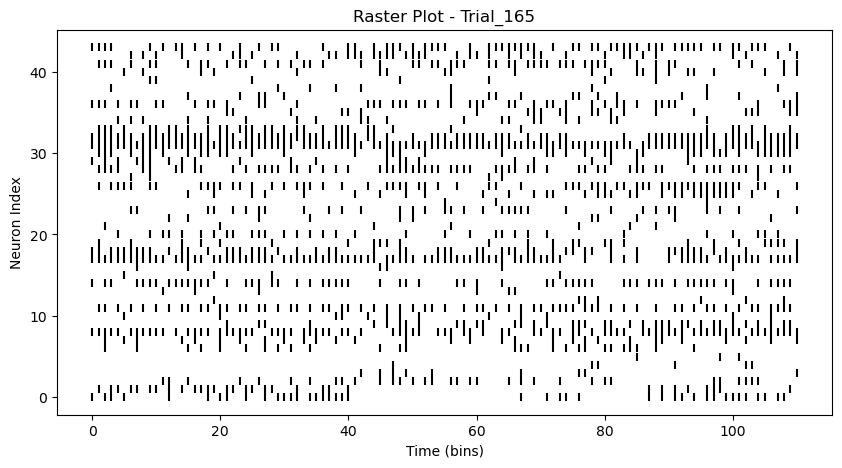

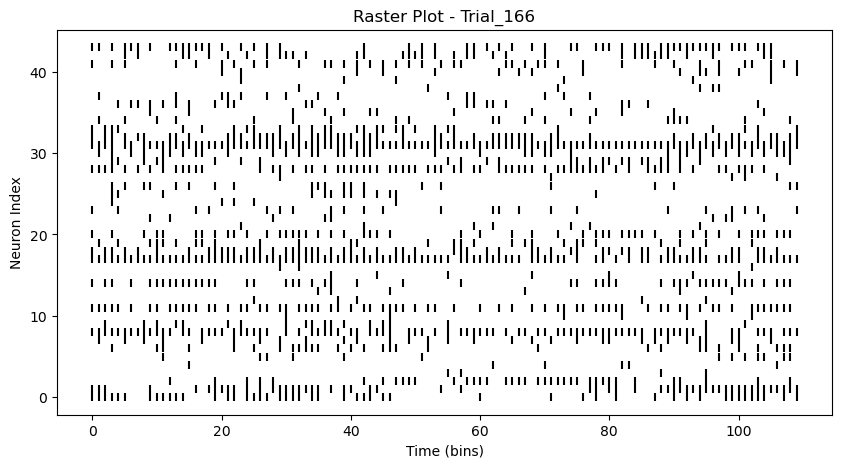

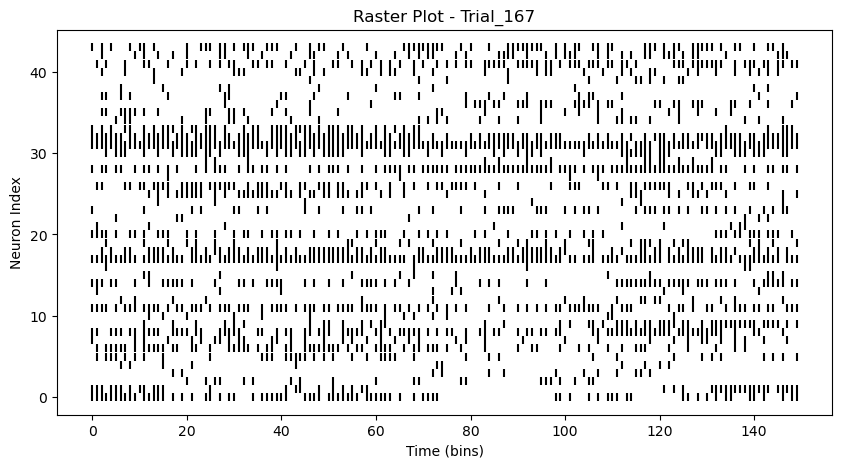

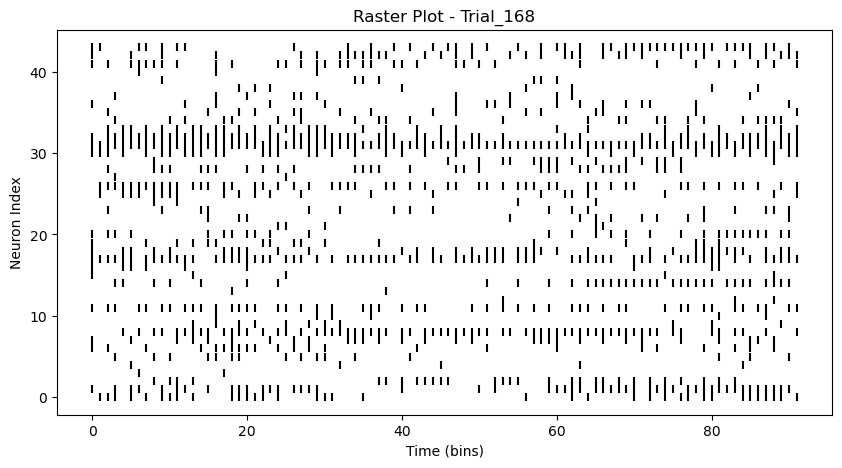

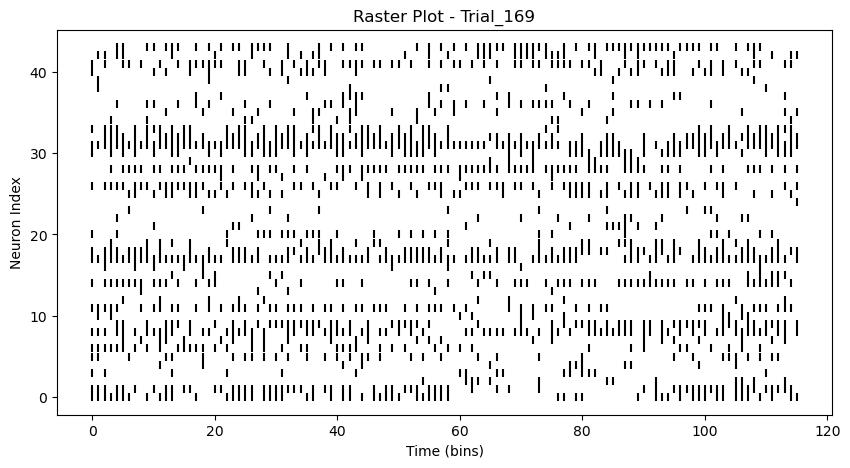

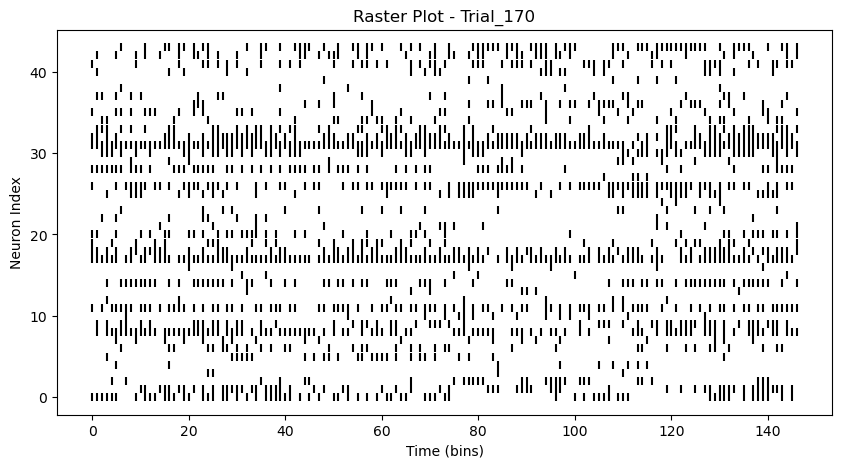

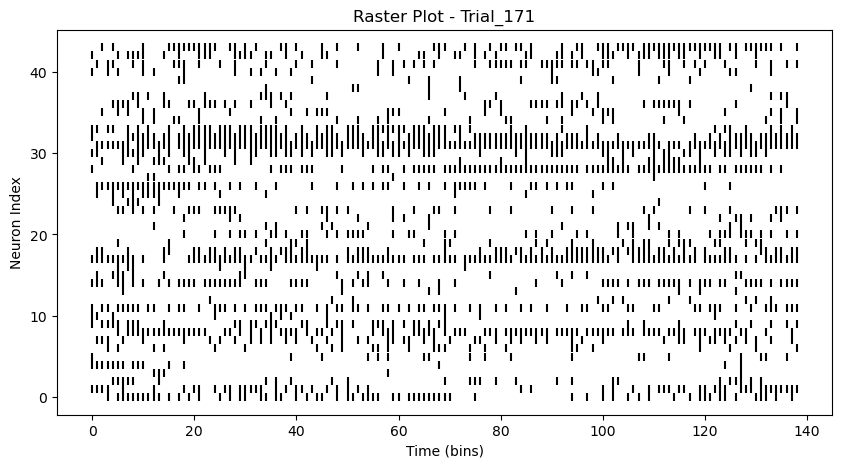

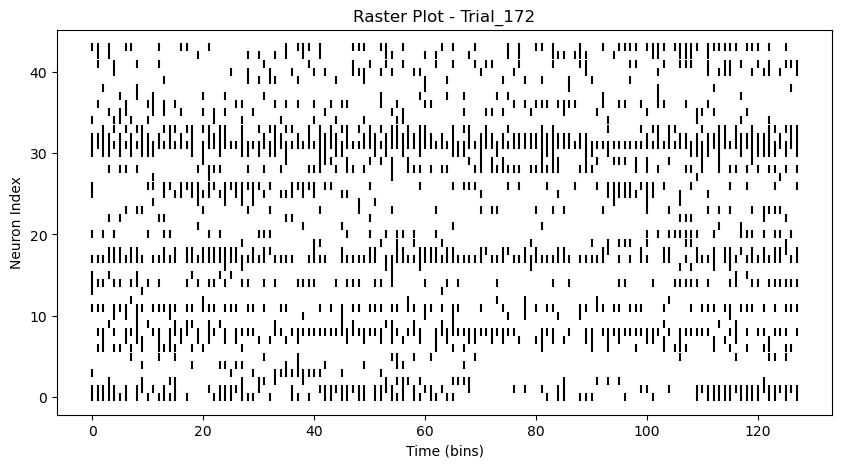

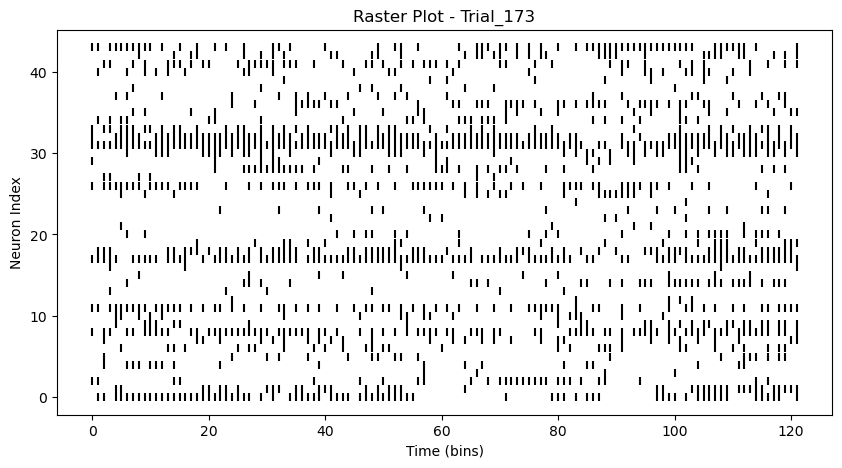

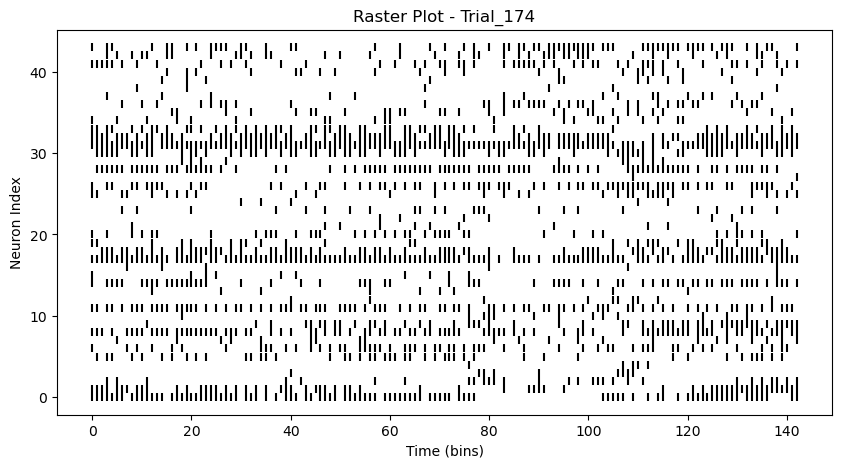

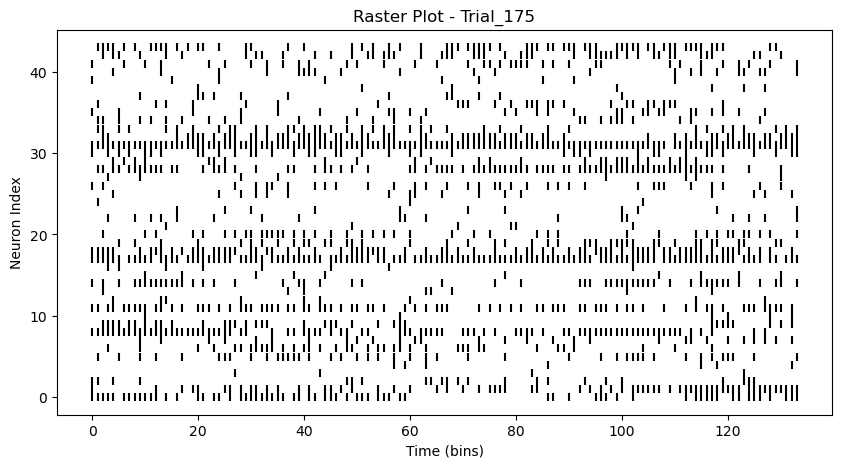

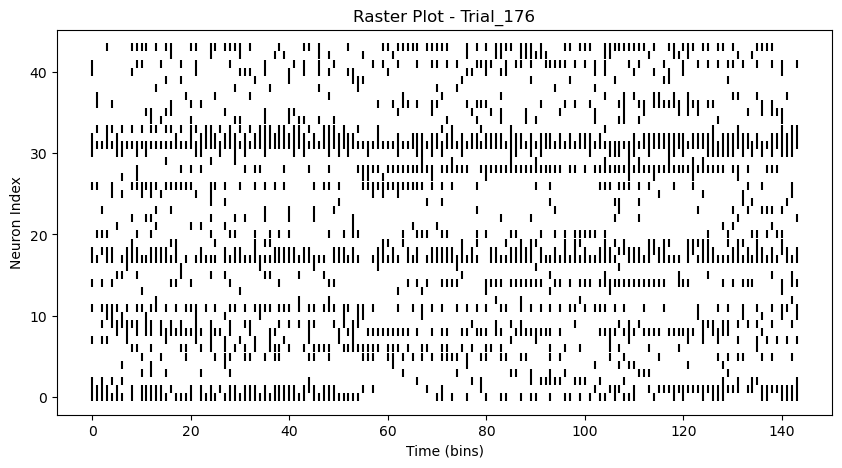

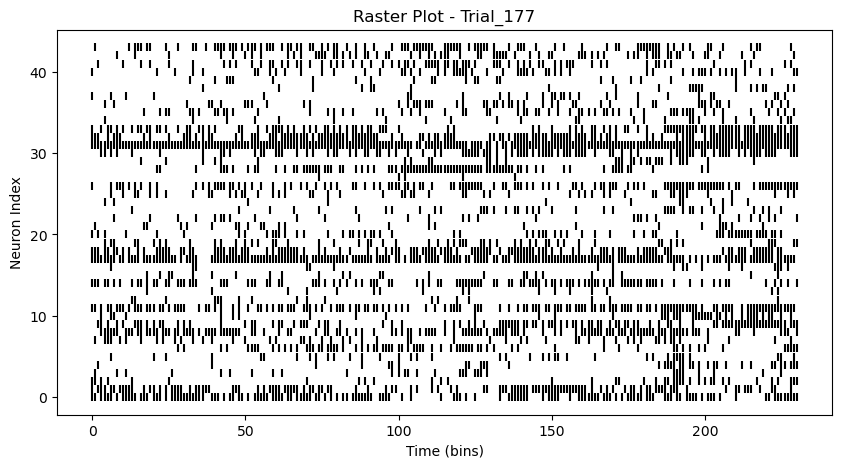

In [80]:
import matplotlib.pyplot as plt

def plot_raster_individual(trial_data, trial_id):
    plt.figure(figsize=(10, 5))
    
    num_neurons, num_time_bins = trial_data.shape
    for neuron_idx in range(num_neurons):  
        spikes = np.where(trial_data[neuron_idx] > 0)[0]  # Find spike times
        plt.scatter(spikes, [neuron_idx] * len(spikes), marker="|", color="black")

    plt.xlabel("Time (bins)")
    plt.ylabel("Neuron Index")
    plt.title(f"Raster Plot - {trial_id}")
    plt.show()

# Plot each trial separately
for trial_id, trial_data in trial_dict.items():
    plot_raster_individual(trial_data, trial_id)


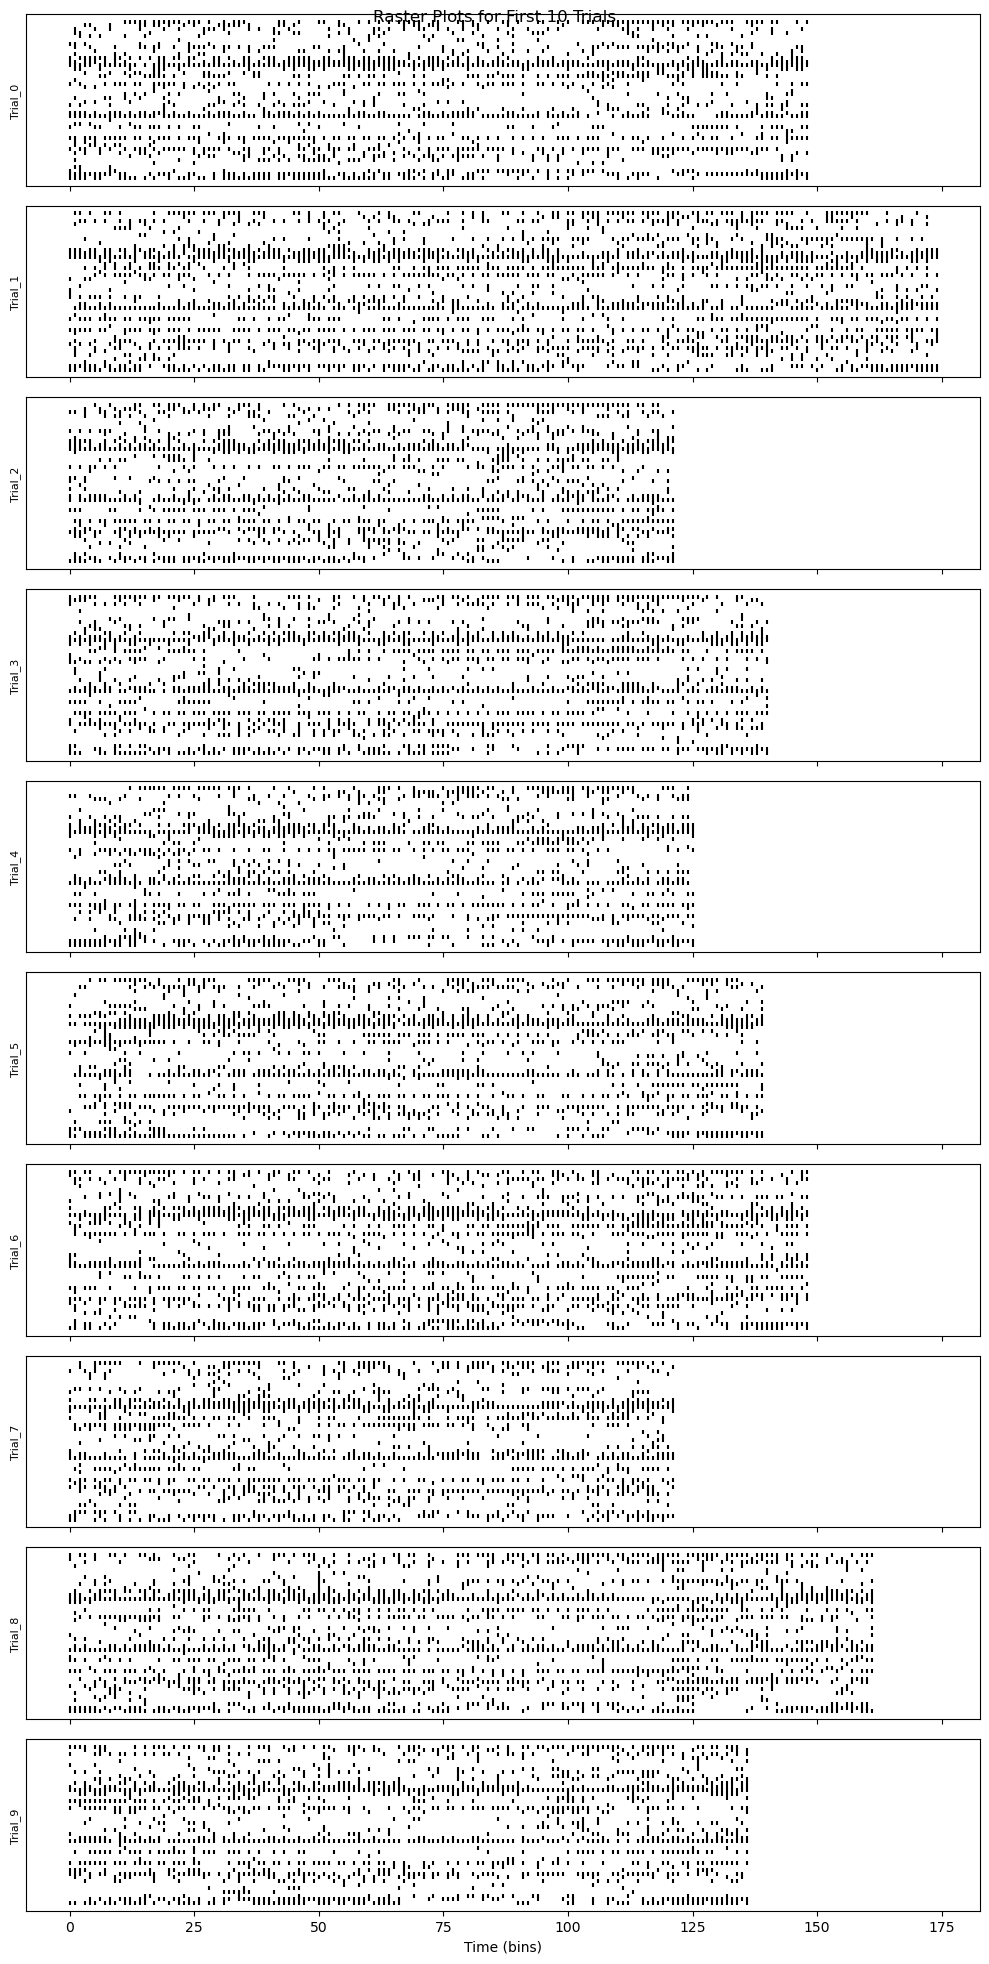

In [81]:
import matplotlib.pyplot as plt

def plot_raster_subplots(trial_dict, num_trials=10):
    fig, axes = plt.subplots(nrows=num_trials, ncols=1, figsize=(10, 2 * num_trials), sharex=True)

    # Iterate over the first `num_trials` trials
    for i, (trial_id, trial_data) in enumerate(list(trial_dict.items())[:num_trials]):
        ax = axes[i]  # Select the corresponding subplot
        num_neurons, num_time_bins = trial_data.shape
        
        for neuron_idx in range(num_neurons):
            spikes = np.where(trial_data[neuron_idx] > 0)[0]  # Find spike times
            ax.scatter(spikes, [neuron_idx] * len(spikes), marker="|", color="black", s=10)

        ax.set_ylabel(f"{trial_id}", fontsize=8)
        ax.set_yticks([])  # Remove y-ticks for a cleaner look

    # Shared x-axis label
    axes[-1].set_xlabel("Time (bins)")
    plt.suptitle("Raster Plots for First 10 Trials", fontsize=12)
    plt.tight_layout()
    plt.show()

# Call the function
plot_raster_subplots(trial_dict)
